In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files


In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/EUR_USD_15min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(74270, 4)


,open,close,low,high
timestamp,,,,
2020-01-01 17:00:00,1.12120,1.12127,1.12106,1.12139
2020-01-01 17:15:00,1.12127,1.12146,1.12127,1.12154
2020-01-01 17:30:00,1.12147,1.12154,1.12138,1.12156
2020-01-01 17:45:00,1.12155,1.12143,1.12143,1.12166
2020-01-01 18:00:00,1.12143,1.12202,1.12142,1.12218


In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(74269, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price
timestamp,,,,,,,,,,,,
2020-01-01 17:00:00,1.12120,1.12127,1.12106,1.12139,1.12146,17,2,1,-0.00007,1.121225,0.00033,1.121230
2020-01-01 17:15:00,1.12127,1.12146,1.12127,1.12154,1.12154,17,2,1,-0.00019,1.121405,0.00027,1.121385
2020-01-01 17:30:00,1.12147,1.12154,1.12138,1.12156,1.12143,17,2,1,-0.00007,1.121470,0.00018,1.121487
2020-01-01 17:45:00,1.12155,1.12143,1.12143,1.12166,1.12202,17,2,1,0.00012,1.121545,0.00023,1.121517
2020-01-01 18:00:00,1.12143,1.12202,1.12142,1.12218,1.12210,18,2,1,-0.00059,1.121800,0.00076,1.121762


In [ ]:
df=thesis.ApplyPCA(df)
df.head()

,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price,pca
timestamp,,,,,,,,,,,,,
2020-01-01 17:00:00,1.12120,1.12127,1.12106,1.12139,1.12146,17,2,1,-0.00007,1.121225,0.00033,1.121230,-25.518003
2020-01-01 17:15:00,1.12127,1.12146,1.12127,1.12154,1.12154,17,2,1,-0.00019,1.121405,0.00027,1.121385,-25.517870
2020-01-01 17:30:00,1.12147,1.12154,1.12138,1.12156,1.12143,17,2,1,-0.00007,1.121470,0.00018,1.121487,-25.517872
2020-01-01 17:45:00,1.12155,1.12143,1.12143,1.12166,1.12202,17,2,1,0.00012,1.121545,0.00023,1.121517,-25.517862
2020-01-01 18:00:00,1.12143,1.12202,1.12142,1.12218,1.12210,18,2,1,-0.00059,1.121800,0.00076,1.121762,-25.518229


In [ ]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  1.12120  1.12106  1.12139         1.12146    17    2   
2020-01-01 17:15:00  1.12127  1.12127  1.12154         1.12154    17    2   
2020-01-01 17:30:00  1.12147  1.12138  1.12156         1.12143    17    2   
2020-01-01 17:45:00  1.12155  1.12143  1.12166         1.12202    17    2   
2020-01-01 18:00:00  1.12143  1.12142  1.12218         1.12210    18    2   

                     week  momentum  avg_price    range  ohlc_price        pca  
timestamp                                                                       
2020-01-01 17:00:00     1  -0.00007   1.121225  0.00033    1.121230 -25.518003  
2020-01-01 17:15:00     1  -0.00019   1.121405  0.00027    1.121385 -25.517870  
2020-01-01 17:30:00     1  -0.00007   1.121470  0.00018    1.121487 -25.517872  
2020-01-01 17:45:00     1   0.00012   1.121545  0.00023

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_15Min(X,y)

59415
59415
7500
7500
7354
7354


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(59415, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(59390, 24, 12)
(7475, 24, 12)
(7329, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(59390, 1)
(7475, 1)
(7329, 1)


array([[0.43059635],
       [0.42954063],
       [0.4282837 ],
       ...,
       [0.11723852],
       [0.1179924 ],
       [0.1158309 ]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.43059635, 0.42954063, 0.4282837 , ..., 0.11723852, 0.1179924 ,
       0.1158309 ], dtype=float32)

In [ ]:
model= thesis.BiLSTM_Model(x_train)


In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/EUR_USD15_BiLSTM", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
464/464 [==============================] - ETA: 0s - loss: 327.3832 - mae: 3.6059 - mse: 327.3832 - root_mean_squared_error: 18.0937 - mape: 23329.2461
Epoch 1: val_mse improved from inf to 0.15690, saving model to /content/drive/MyDrive/modelweights/EUR_USD15_BiLSTM


464/464 [==============================] - 208s 418ms/step - loss: 327.3832 - mae: 3.6059 - mse: 327.3832 - root_mean_squared_error: 18.0937 - mape: 23329.2461 - val_loss: 0.1569 - val_mae: 0.3367 - val_mse: 0.1569 - val_root_mean_squared_error: 0.3961 - val_mape: 100734.0156
Epoch 2/75
464/464 [==============================] - ETA: 0s - loss: 0.0654 - mae: 0.2112 - mse: 0.0654 - root_mean_squared_error: 0.2558 - mape: 11334.6895
Epoch 2: val_mse improved from 0.15690 to 0.09541, saving model to /content/drive/MyDrive/modelweights/EUR_USD15_BiLSTM


464/464 [==============================] - 194s 418ms/step - loss: 0.0654 - mae: 0.2112 - mse: 0.0654 - root_mean_squared_error: 0.2558 - mape: 11334.6895 - val_loss: 0.0954 - val_mae: 0.2753 - val_mse: 0.0954 - val_root_mean_squared_error: 0.3089 - val_mape: 79069.3281
Epoch 3/75
464/464 [==============================] - ETA: 0s - loss: 0.0577 - mae: 0.2079 - mse: 0.0577 - root_mean_squared_error: 0.2402 - mape: 9538.4014
Epoch 3: val_mse improved from 0.09541 to 0.09191, saving model to /content/drive/MyDrive/modelweights/EUR_USD15_BiLSTM


464/464 [==============================] - 195s 421ms/step - loss: 0.0577 - mae: 0.2079 - mse: 0.0577 - root_mean_squared_error: 0.2402 - mape: 9538.4014 - val_loss: 0.0919 - val_mae: 0.2716 - val_mse: 0.0919 - val_root_mean_squared_error: 0.3032 - val_mape: 76849.9688
Epoch 4/75
464/464 [==============================] - ETA: 0s - loss: 0.0576 - mae: 0.2083 - mse: 0.0576 - root_mean_squared_error: 0.2400 - mape: 8672.1465
Epoch 4: val_mse improved from 0.09191 to 0.09132, saving model to /content/drive/MyDrive/modelweights/EUR_USD15_BiLSTM


464/464 [==============================] - 190s 409ms/step - loss: 0.0576 - mae: 0.2083 - mse: 0.0576 - root_mean_squared_error: 0.2400 - mape: 8672.1465 - val_loss: 0.0913 - val_mae: 0.2708 - val_mse: 0.0913 - val_root_mean_squared_error: 0.3022 - val_mape: 76516.9688
Epoch 5/75
464/464 [==============================] - ETA: 0s - loss: 0.0567 - mae: 0.2064 - mse: 0.0567 - root_mean_squared_error: 0.2381 - mape: 9010.5273
Epoch 5: val_mse improved from 0.09132 to 0.09050, saving model to /content/drive/MyDrive/modelweights/EUR_USD15_BiLSTM


464/464 [==============================] - 193s 417ms/step - loss: 0.0567 - mae: 0.2064 - mse: 0.0567 - root_mean_squared_error: 0.2381 - mape: 9010.5273 - val_loss: 0.0905 - val_mae: 0.2696 - val_mse: 0.0905 - val_root_mean_squared_error: 0.3008 - val_mape: 76297.0078
Epoch 6/75
464/464 [==============================] - ETA: 0s - loss: 0.0556 - mae: 0.2044 - mse: 0.0556 - root_mean_squared_error: 0.2359 - mape: 9084.5596
Epoch 6: val_mse improved from 0.09050 to 0.08968, saving model to /content/drive/MyDrive/modelweights/EUR_USD15_BiLSTM


464/464 [==============================] - 194s 419ms/step - loss: 0.0556 - mae: 0.2044 - mse: 0.0556 - root_mean_squared_error: 0.2359 - mape: 9084.5596 - val_loss: 0.0897 - val_mae: 0.2683 - val_mse: 0.0897 - val_root_mean_squared_error: 0.2995 - val_mape: 76007.1719
Epoch 7/75
464/464 [==============================] - ETA: 0s - loss: 0.0532 - mae: 0.1994 - mse: 0.0532 - root_mean_squared_error: 0.2307 - mape: 8970.0459
Epoch 7: val_mse improved from 0.08968 to 0.08523, saving model to /content/drive/MyDrive/modelweights/EUR_USD15_BiLSTM


464/464 [==============================] - 193s 416ms/step - loss: 0.0532 - mae: 0.1994 - mse: 0.0532 - root_mean_squared_error: 0.2307 - mape: 8970.0459 - val_loss: 0.0852 - val_mae: 0.2614 - val_mse: 0.0852 - val_root_mean_squared_error: 0.2919 - val_mape: 74216.5000
Epoch 8/75
464/464 [==============================] - ETA: 0s - loss: 0.0502 - mae: 0.1931 - mse: 0.0502 - root_mean_squared_error: 0.2240 - mape: 9056.8086
Epoch 8: val_mse improved from 0.08523 to 0.08088, saving model to /content/drive/MyDrive/modelweights/EUR_USD15_BiLSTM


464/464 [==============================] - 191s 413ms/step - loss: 0.0502 - mae: 0.1931 - mse: 0.0502 - root_mean_squared_error: 0.2240 - mape: 9056.8086 - val_loss: 0.0809 - val_mae: 0.2543 - val_mse: 0.0809 - val_root_mean_squared_error: 0.2844 - val_mape: 72562.7500
Epoch 9/75
464/464 [==============================] - ETA: 0s - loss: 0.0454 - mae: 0.1822 - mse: 0.0454 - root_mean_squared_error: 0.2130 - mape: 10037.4004
Epoch 9: val_mse improved from 0.08088 to 0.07190, saving model to /content/drive/MyDrive/modelweights/EUR_USD15_BiLSTM


464/464 [==============================] - 194s 419ms/step - loss: 0.0454 - mae: 0.1822 - mse: 0.0454 - root_mean_squared_error: 0.2130 - mape: 10037.4004 - val_loss: 0.0719 - val_mae: 0.2385 - val_mse: 0.0719 - val_root_mean_squared_error: 0.2681 - val_mape: 69570.0312
Epoch 10/75
464/464 [==============================] - ETA: 0s - loss: 0.0364 - mae: 0.1595 - mse: 0.0364 - root_mean_squared_error: 0.1908 - mape: 8366.1494
Epoch 10: val_mse improved from 0.07190 to 0.05428, saving model to /content/drive/MyDrive/modelweights/EUR_USD15_BiLSTM


464/464 [==============================] - 192s 414ms/step - loss: 0.0364 - mae: 0.1595 - mse: 0.0364 - root_mean_squared_error: 0.1908 - mape: 8366.1494 - val_loss: 0.0543 - val_mae: 0.2033 - val_mse: 0.0543 - val_root_mean_squared_error: 0.2330 - val_mape: 63936.5742
Epoch 11/75
464/464 [==============================] - ETA: 0s - loss: 0.0238 - mae: 0.1221 - mse: 0.0238 - root_mean_squared_error: 0.1543 - mape: 7725.0449
Epoch 11: val_mse improved from 0.05428 to 0.03053, saving model to /content/drive/MyDrive/modelweights/EUR_USD15_BiLSTM


464/464 [==============================] - 192s 414ms/step - loss: 0.0238 - mae: 0.1221 - mse: 0.0238 - root_mean_squared_error: 0.1543 - mape: 7725.0449 - val_loss: 0.0305 - val_mae: 0.1417 - val_mse: 0.0305 - val_root_mean_squared_error: 0.1747 - val_mape: 55471.9844
Epoch 12/75
464/464 [==============================] - ETA: 0s - loss: 0.0138 - mae: 0.0893 - mse: 0.0138 - root_mean_squared_error: 0.1174 - mape: 6374.7876
Epoch 12: val_mse improved from 0.03053 to 0.01600, saving model to /content/drive/MyDrive/modelweights/EUR_USD15_BiLSTM


464/464 [==============================] - 194s 419ms/step - loss: 0.0138 - mae: 0.0893 - mse: 0.0138 - root_mean_squared_error: 0.1174 - mape: 6374.7876 - val_loss: 0.0160 - val_mae: 0.0966 - val_mse: 0.0160 - val_root_mean_squared_error: 0.1265 - val_mape: 45921.6094
Epoch 13/75
464/464 [==============================] - ETA: 0s - loss: 0.0105 - mae: 0.0780 - mse: 0.0105 - root_mean_squared_error: 0.1023 - mape: 5231.4595
Epoch 13: val_mse improved from 0.01600 to 0.01186, saving model to /content/drive/MyDrive/modelweights/EUR_USD15_BiLSTM


464/464 [==============================] - 193s 417ms/step - loss: 0.0105 - mae: 0.0780 - mse: 0.0105 - root_mean_squared_error: 0.1023 - mape: 5231.4595 - val_loss: 0.0119 - val_mae: 0.0781 - val_mse: 0.0119 - val_root_mean_squared_error: 0.1089 - val_mape: 42153.4062
Epoch 14/75
464/464 [==============================] - ETA: 0s - loss: 0.0093 - mae: 0.0728 - mse: 0.0093 - root_mean_squared_error: 0.0963 - mape: 4647.5361
Epoch 14: val_mse improved from 0.01186 to 0.01009, saving model to /content/drive/MyDrive/modelweights/EUR_USD15_BiLSTM


464/464 [==============================] - 194s 418ms/step - loss: 0.0093 - mae: 0.0728 - mse: 0.0093 - root_mean_squared_error: 0.0963 - mape: 4647.5361 - val_loss: 0.0101 - val_mae: 0.0727 - val_mse: 0.0101 - val_root_mean_squared_error: 0.1005 - val_mape: 39855.4688
Epoch 15/75
464/464 [==============================] - ETA: 0s - loss: 0.0079 - mae: 0.0673 - mse: 0.0079 - root_mean_squared_error: 0.0890 - mape: 4833.2412
Epoch 15: val_mse improved from 0.01009 to 0.00893, saving model to /content/drive/MyDrive/modelweights/EUR_USD15_BiLSTM


464/464 [==============================] - 190s 410ms/step - loss: 0.0079 - mae: 0.0673 - mse: 0.0079 - root_mean_squared_error: 0.0890 - mape: 4833.2412 - val_loss: 0.0089 - val_mae: 0.0702 - val_mse: 0.0089 - val_root_mean_squared_error: 0.0945 - val_mape: 37742.5508
Epoch 16/75
464/464 [==============================] - ETA: 0s - loss: 0.0069 - mae: 0.0625 - mse: 0.0069 - root_mean_squared_error: 0.0830 - mape: 4819.6855
Epoch 16: val_mse improved from 0.00893 to 0.00657, saving model to /content/drive/MyDrive/modelweights/EUR_USD15_BiLSTM


464/464 [==============================] - 194s 418ms/step - loss: 0.0069 - mae: 0.0625 - mse: 0.0069 - root_mean_squared_error: 0.0830 - mape: 4819.6855 - val_loss: 0.0066 - val_mae: 0.0553 - val_mse: 0.0066 - val_root_mean_squared_error: 0.0811 - val_mape: 35017.5703
Epoch 17/75
464/464 [==============================] - ETA: 0s - loss: 0.0060 - mae: 0.0582 - mse: 0.0060 - root_mean_squared_error: 0.0772 - mape: 4767.2388
Epoch 17: val_mse improved from 0.00657 to 0.00570, saving model to /content/drive/MyDrive/modelweights/EUR_USD15_BiLSTM


464/464 [==============================] - 193s 416ms/step - loss: 0.0060 - mae: 0.0582 - mse: 0.0060 - root_mean_squared_error: 0.0772 - mape: 4767.2388 - val_loss: 0.0057 - val_mae: 0.0559 - val_mse: 0.0057 - val_root_mean_squared_error: 0.0755 - val_mape: 32197.3047
Epoch 18/75
464/464 [==============================] - ETA: 0s - loss: 0.0051 - mae: 0.0537 - mse: 0.0051 - root_mean_squared_error: 0.0711 - mape: 4688.4077
Epoch 18: val_mse improved from 0.00570 to 0.00441, saving model to /content/drive/MyDrive/modelweights/EUR_USD15_BiLSTM


464/464 [==============================] - 191s 412ms/step - loss: 0.0051 - mae: 0.0537 - mse: 0.0051 - root_mean_squared_error: 0.0711 - mape: 4688.4077 - val_loss: 0.0044 - val_mae: 0.0459 - val_mse: 0.0044 - val_root_mean_squared_error: 0.0664 - val_mape: 30102.8184
Epoch 19/75
464/464 [==============================] - ETA: 0s - loss: 0.0042 - mae: 0.0491 - mse: 0.0042 - root_mean_squared_error: 0.0646 - mape: 3725.5603
Epoch 19: val_mse improved from 0.00441 to 0.00404, saving model to /content/drive/MyDrive/modelweights/EUR_USD15_BiLSTM


464/464 [==============================] - 194s 419ms/step - loss: 0.0042 - mae: 0.0491 - mse: 0.0042 - root_mean_squared_error: 0.0646 - mape: 3725.5603 - val_loss: 0.0040 - val_mae: 0.0456 - val_mse: 0.0040 - val_root_mean_squared_error: 0.0635 - val_mape: 27787.1309
Epoch 20/75
464/464 [==============================] - ETA: 0s - loss: 0.0035 - mae: 0.0452 - mse: 0.0035 - root_mean_squared_error: 0.0594 - mape: 2774.6956
Epoch 20: val_mse improved from 0.00404 to 0.00287, saving model to /content/drive/MyDrive/modelweights/EUR_USD15_BiLSTM


464/464 [==============================] - 199s 430ms/step - loss: 0.0035 - mae: 0.0452 - mse: 0.0035 - root_mean_squared_error: 0.0594 - mape: 2774.6956 - val_loss: 0.0029 - val_mae: 0.0374 - val_mse: 0.0029 - val_root_mean_squared_error: 0.0536 - val_mape: 25184.6426
Epoch 21/75
464/464 [==============================] - ETA: 0s - loss: 0.0030 - mae: 0.0418 - mse: 0.0030 - root_mean_squared_error: 0.0546 - mape: 3185.1016
Epoch 21: val_mse did not improve from 0.00287
464/464 [==============================] - 153s 329ms/step - loss: 0.0030 - mae: 0.0418 - mse: 0.0030 - root_mean_squared_error: 0.0546 - mape: 3185.1016 - val_loss: 0.0032 - val_mae: 0.0424 - val_mse: 0.0032 - val_root_mean_squared_error: 0.0566 - val_mape: 24068.9844
Epoch 22/75
464/464 [==============================] - ETA: 0s - loss: 0.0024 - mae: 0.0382 - mse: 0.0024 - root_mean_squared_error: 0.0495 - mape: 3052.8269
Epoch 22: val_mse improved from 0.00287 to 0.00205, saving model to /content/drive/MyDrive/modelw

464/464 [==============================] - 200s 431ms/step - loss: 0.0024 - mae: 0.0382 - mse: 0.0024 - root_mean_squared_error: 0.0495 - mape: 3052.8269 - val_loss: 0.0021 - val_mae: 0.0332 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0453 - val_mape: 21657.7168
Epoch 23/75
464/464 [==============================] - ETA: 0s - loss: 0.0020 - mae: 0.0344 - mse: 0.0020 - root_mean_squared_error: 0.0447 - mape: 2512.2117
Epoch 23: val_mse improved from 0.00205 to 0.00172, saving model to /content/drive/MyDrive/modelweights/EUR_USD15_BiLSTM


464/464 [==============================] - 197s 426ms/step - loss: 0.0020 - mae: 0.0344 - mse: 0.0020 - root_mean_squared_error: 0.0447 - mape: 2512.2117 - val_loss: 0.0017 - val_mae: 0.0310 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0414 - val_mape: 19515.3340
Epoch 24/75
464/464 [==============================] - ETA: 0s - loss: 0.0015 - mae: 0.0305 - mse: 0.0015 - root_mean_squared_error: 0.0394 - mape: 2269.0835
Epoch 24: val_mse improved from 0.00172 to 0.00151, saving model to /content/drive/MyDrive/modelweights/EUR_USD15_BiLSTM


464/464 [==============================] - 201s 433ms/step - loss: 0.0015 - mae: 0.0305 - mse: 0.0015 - root_mean_squared_error: 0.0394 - mape: 2269.0835 - val_loss: 0.0015 - val_mae: 0.0296 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0389 - val_mape: 18102.2539
Epoch 25/75
464/464 [==============================] - ETA: 0s - loss: 0.0013 - mae: 0.0276 - mse: 0.0013 - root_mean_squared_error: 0.0355 - mape: 2723.6013
Epoch 25: val_mse did not improve from 0.00151
464/464 [==============================] - 145s 313ms/step - loss: 0.0013 - mae: 0.0276 - mse: 0.0013 - root_mean_squared_error: 0.0355 - mape: 2723.6013 - val_loss: 0.0016 - val_mae: 0.0302 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0404 - val_mape: 17293.2070
Epoch 26/75
464/464 [==============================] - ETA: 0s - loss: 0.0011 - mae: 0.0252 - mse: 0.0011 - root_mean_squared_error: 0.0324 - mape: 1944.5796
Epoch 26: val_mse improved from 0.00151 to 0.00132, saving model to /content/drive/MyDrive/modelw

464/464 [==============================] - 194s 417ms/step - loss: 0.0011 - mae: 0.0252 - mse: 0.0011 - root_mean_squared_error: 0.0324 - mape: 1944.5796 - val_loss: 0.0013 - val_mae: 0.0270 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0363 - val_mape: 15812.1055
Epoch 27/75
464/464 [==============================] - ETA: 0s - loss: 8.4236e-04 - mae: 0.0226 - mse: 8.4236e-04 - root_mean_squared_error: 0.0290 - mape: 1815.0956
Epoch 27: val_mse did not improve from 0.00132
464/464 [==============================] - 155s 334ms/step - loss: 8.4236e-04 - mae: 0.0226 - mse: 8.4236e-04 - root_mean_squared_error: 0.0290 - mape: 1815.0956 - val_loss: 0.0014 - val_mae: 0.0299 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0380 - val_mape: 14616.5361
Epoch 28/75
464/464 [==============================] - ETA: 0s - loss: 7.1491e-04 - mae: 0.0209 - mse: 7.1491e-04 - root_mean_squared_error: 0.0267 - mape: 1723.3241
Epoch 28: val_mse did not improve from 0.00132
464/464 [=================

464/464 [==============================] - 198s 426ms/step - loss: 6.2177e-04 - mae: 0.0194 - mse: 6.2177e-04 - root_mean_squared_error: 0.0249 - mape: 1419.8348 - val_loss: 0.0011 - val_mae: 0.0259 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0327 - val_mape: 12427.3408
Epoch 30/75
464/464 [==============================] - ETA: 0s - loss: 5.2935e-04 - mae: 0.0179 - mse: 5.2935e-04 - root_mean_squared_error: 0.0230 - mape: 1400.7806
Epoch 30: val_mse did not improve from 0.00107
464/464 [==============================] - 148s 319ms/step - loss: 5.2935e-04 - mae: 0.0179 - mse: 5.2935e-04 - root_mean_squared_error: 0.0230 - mape: 1400.7806 - val_loss: 0.0011 - val_mae: 0.0250 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0330 - val_mape: 12370.2920
Epoch 31/75
464/464 [==============================] - ETA: 0s - loss: 5.0483e-04 - mae: 0.0175 - mse: 5.0483e-04 - root_mean_squared_error: 0.0225 - mape: 1464.3585
Epoch 31: val_mse improved from 0.00107 to 0.00097, saving model 

464/464 [==============================] - 195s 421ms/step - loss: 5.0483e-04 - mae: 0.0175 - mse: 5.0483e-04 - root_mean_squared_error: 0.0225 - mape: 1464.3585 - val_loss: 9.7411e-04 - val_mae: 0.0247 - val_mse: 9.7411e-04 - val_root_mean_squared_error: 0.0312 - val_mape: 11281.2305
Epoch 32/75
464/464 [==============================] - ETA: 0s - loss: 4.2920e-04 - mae: 0.0161 - mse: 4.2920e-04 - root_mean_squared_error: 0.0207 - mape: 1270.2614
Epoch 32: val_mse did not improve from 0.00097
464/464 [==============================] - 152s 327ms/step - loss: 4.2920e-04 - mae: 0.0161 - mse: 4.2920e-04 - root_mean_squared_error: 0.0207 - mape: 1270.2614 - val_loss: 0.0011 - val_mae: 0.0256 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0326 - val_mape: 11131.6982
Epoch 33/75
464/464 [==============================] - ETA: 0s - loss: 3.9323e-04 - mae: 0.0154 - mse: 3.9323e-04 - root_mean_squared_error: 0.0198 - mape: 1414.4180
Epoch 33: val_mse improved from 0.00097 to 0.00083, savin

464/464 [==============================] - 192s 415ms/step - loss: 3.9323e-04 - mae: 0.0154 - mse: 3.9323e-04 - root_mean_squared_error: 0.0198 - mape: 1414.4180 - val_loss: 8.3041e-04 - val_mae: 0.0213 - val_mse: 8.3041e-04 - val_root_mean_squared_error: 0.0288 - val_mape: 10859.2090
Epoch 34/75
464/464 [==============================] - ETA: 0s - loss: 3.7306e-04 - mae: 0.0151 - mse: 3.7306e-04 - root_mean_squared_error: 0.0193 - mape: 1485.1147
Epoch 34: val_mse did not improve from 0.00083
464/464 [==============================] - 154s 331ms/step - loss: 3.7306e-04 - mae: 0.0151 - mse: 3.7306e-04 - root_mean_squared_error: 0.0193 - mape: 1485.1147 - val_loss: 8.5118e-04 - val_mae: 0.0222 - val_mse: 8.5118e-04 - val_root_mean_squared_error: 0.0292 - val_mape: 10531.4248
Epoch 35/75
464/464 [==============================] - ETA: 0s - loss: 3.0933e-04 - mae: 0.0137 - mse: 3.0933e-04 - root_mean_squared_error: 0.0176 - mape: 1234.0721
Epoch 35: val_mse did not improve from 0.00083
46

464/464 [==============================] - 192s 413ms/step - loss: 2.4178e-04 - mae: 0.0122 - mse: 2.4178e-04 - root_mean_squared_error: 0.0155 - mape: 1026.7714 - val_loss: 7.9534e-04 - val_mae: 0.0218 - val_mse: 7.9534e-04 - val_root_mean_squared_error: 0.0282 - val_mape: 10104.6553
Epoch 39/75
464/464 [==============================] - ETA: 0s - loss: 2.3116e-04 - mae: 0.0119 - mse: 2.3116e-04 - root_mean_squared_error: 0.0152 - mape: 1224.3676
Epoch 39: val_mse improved from 0.00080 to 0.00068, saving model to /content/drive/MyDrive/modelweights/EUR_USD15_BiLSTM


464/464 [==============================] - 190s 410ms/step - loss: 2.3116e-04 - mae: 0.0119 - mse: 2.3116e-04 - root_mean_squared_error: 0.0152 - mape: 1224.3676 - val_loss: 6.7687e-04 - val_mae: 0.0197 - val_mse: 6.7687e-04 - val_root_mean_squared_error: 0.0260 - val_mape: 9165.1973
Epoch 40/75
464/464 [==============================] - ETA: 0s - loss: 1.9438e-04 - mae: 0.0109 - mse: 1.9438e-04 - root_mean_squared_error: 0.0139 - mape: 993.5047
Epoch 40: val_mse improved from 0.00068 to 0.00065, saving model to /content/drive/MyDrive/modelweights/EUR_USD15_BiLSTM


464/464 [==============================] - 197s 424ms/step - loss: 1.9438e-04 - mae: 0.0109 - mse: 1.9438e-04 - root_mean_squared_error: 0.0139 - mape: 993.5047 - val_loss: 6.5364e-04 - val_mae: 0.0196 - val_mse: 6.5364e-04 - val_root_mean_squared_error: 0.0256 - val_mape: 8583.7666
Epoch 41/75
464/464 [==============================] - ETA: 0s - loss: 1.9456e-04 - mae: 0.0109 - mse: 1.9456e-04 - root_mean_squared_error: 0.0139 - mape: 842.3094
Epoch 41: val_mse improved from 0.00065 to 0.00052, saving model to /content/drive/MyDrive/modelweights/EUR_USD15_BiLSTM


464/464 [==============================] - 193s 416ms/step - loss: 1.9456e-04 - mae: 0.0109 - mse: 1.9456e-04 - root_mean_squared_error: 0.0139 - mape: 842.3094 - val_loss: 5.1675e-04 - val_mae: 0.0170 - val_mse: 5.1675e-04 - val_root_mean_squared_error: 0.0227 - val_mape: 8966.6104
Epoch 42/75
464/464 [==============================] - ETA: 0s - loss: 1.7741e-04 - mae: 0.0104 - mse: 1.7741e-04 - root_mean_squared_error: 0.0133 - mape: 917.2813
Epoch 42: val_mse improved from 0.00052 to 0.00047, saving model to /content/drive/MyDrive/modelweights/EUR_USD15_BiLSTM


464/464 [==============================] - 192s 415ms/step - loss: 1.7741e-04 - mae: 0.0104 - mse: 1.7741e-04 - root_mean_squared_error: 0.0133 - mape: 917.2813 - val_loss: 4.6795e-04 - val_mae: 0.0160 - val_mse: 4.6795e-04 - val_root_mean_squared_error: 0.0216 - val_mape: 9072.6152
Epoch 43/75
464/464 [==============================] - ETA: 0s - loss: 1.7506e-04 - mae: 0.0103 - mse: 1.7506e-04 - root_mean_squared_error: 0.0132 - mape: 756.0084
Epoch 43: val_mse did not improve from 0.00047
464/464 [==============================] - 150s 324ms/step - loss: 1.7506e-04 - mae: 0.0103 - mse: 1.7506e-04 - root_mean_squared_error: 0.0132 - mape: 756.0084 - val_loss: 6.0723e-04 - val_mae: 0.0194 - val_mse: 6.0723e-04 - val_root_mean_squared_error: 0.0246 - val_mape: 7169.7002
Epoch 44/75
464/464 [==============================] - ETA: 0s - loss: 1.7030e-04 - mae: 0.0102 - mse: 1.7030e-04 - root_mean_squared_error: 0.0130 - mape: 795.1346
Epoch 44: val_mse improved from 0.00047 to 0.00046, sav

464/464 [==============================] - 186s 401ms/step - loss: 1.7030e-04 - mae: 0.0102 - mse: 1.7030e-04 - root_mean_squared_error: 0.0130 - mape: 795.1346 - val_loss: 4.6099e-04 - val_mae: 0.0165 - val_mse: 4.6099e-04 - val_root_mean_squared_error: 0.0215 - val_mape: 8637.7842
Epoch 45/75
464/464 [==============================] - ETA: 0s - loss: 1.5026e-04 - mae: 0.0096 - mse: 1.5026e-04 - root_mean_squared_error: 0.0123 - mape: 728.5674
Epoch 45: val_mse did not improve from 0.00046
464/464 [==============================] - 154s 331ms/step - loss: 1.5026e-04 - mae: 0.0096 - mse: 1.5026e-04 - root_mean_squared_error: 0.0123 - mape: 728.5674 - val_loss: 9.4391e-04 - val_mae: 0.0242 - val_mse: 9.4391e-04 - val_root_mean_squared_error: 0.0307 - val_mape: 9427.0000
Epoch 46/75
464/464 [==============================] - ETA: 0s - loss: 1.3183e-04 - mae: 0.0090 - mse: 1.3183e-04 - root_mean_squared_error: 0.0115 - mape: 977.9255
Epoch 46: val_mse did not improve from 0.00046
464/464 

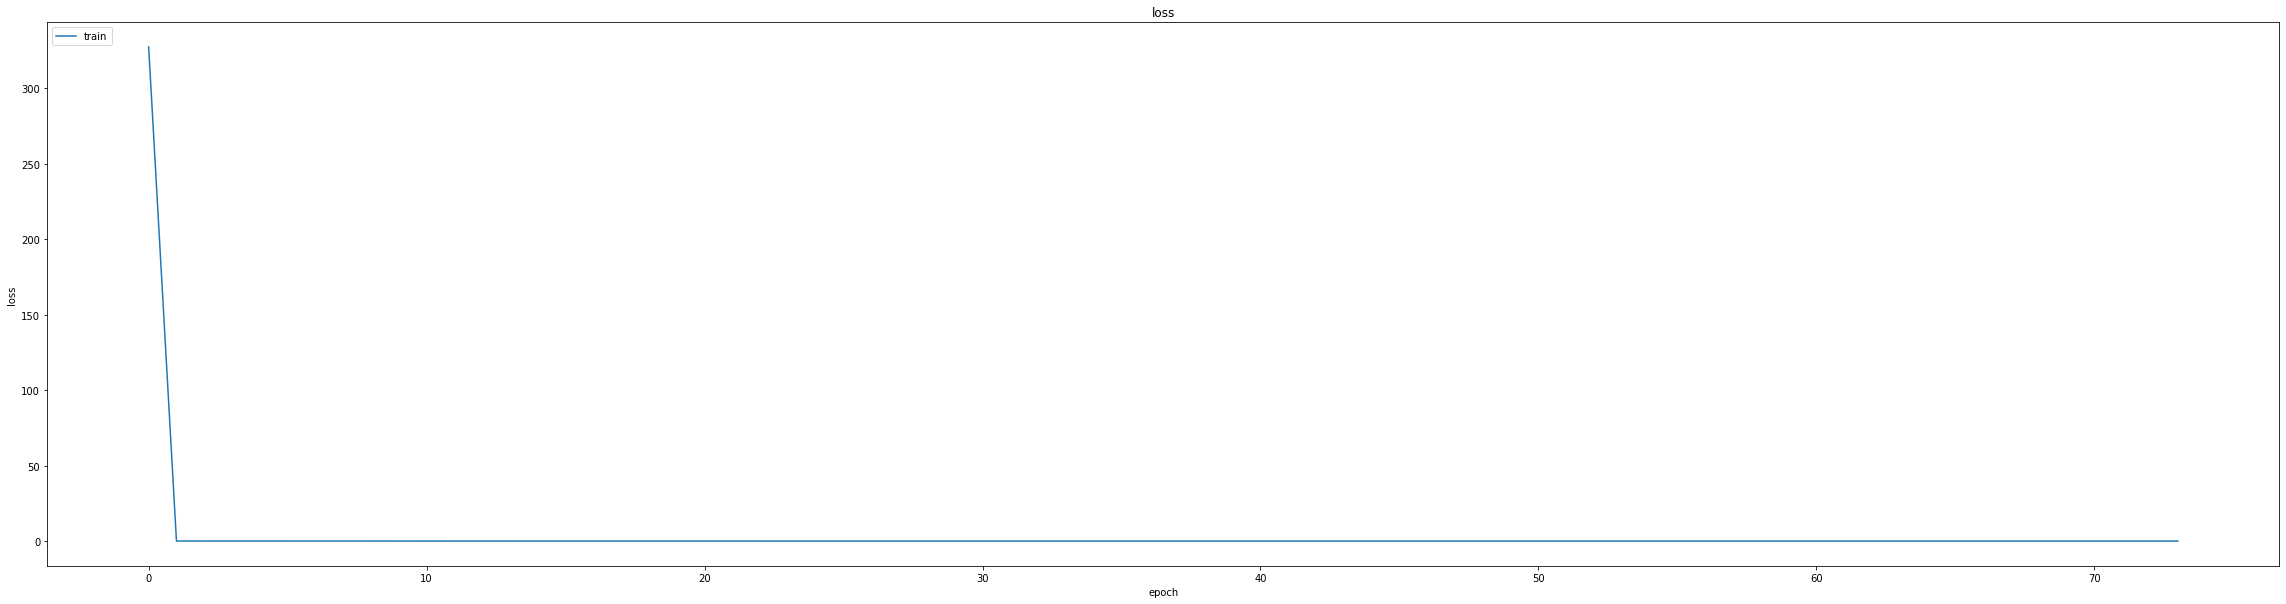

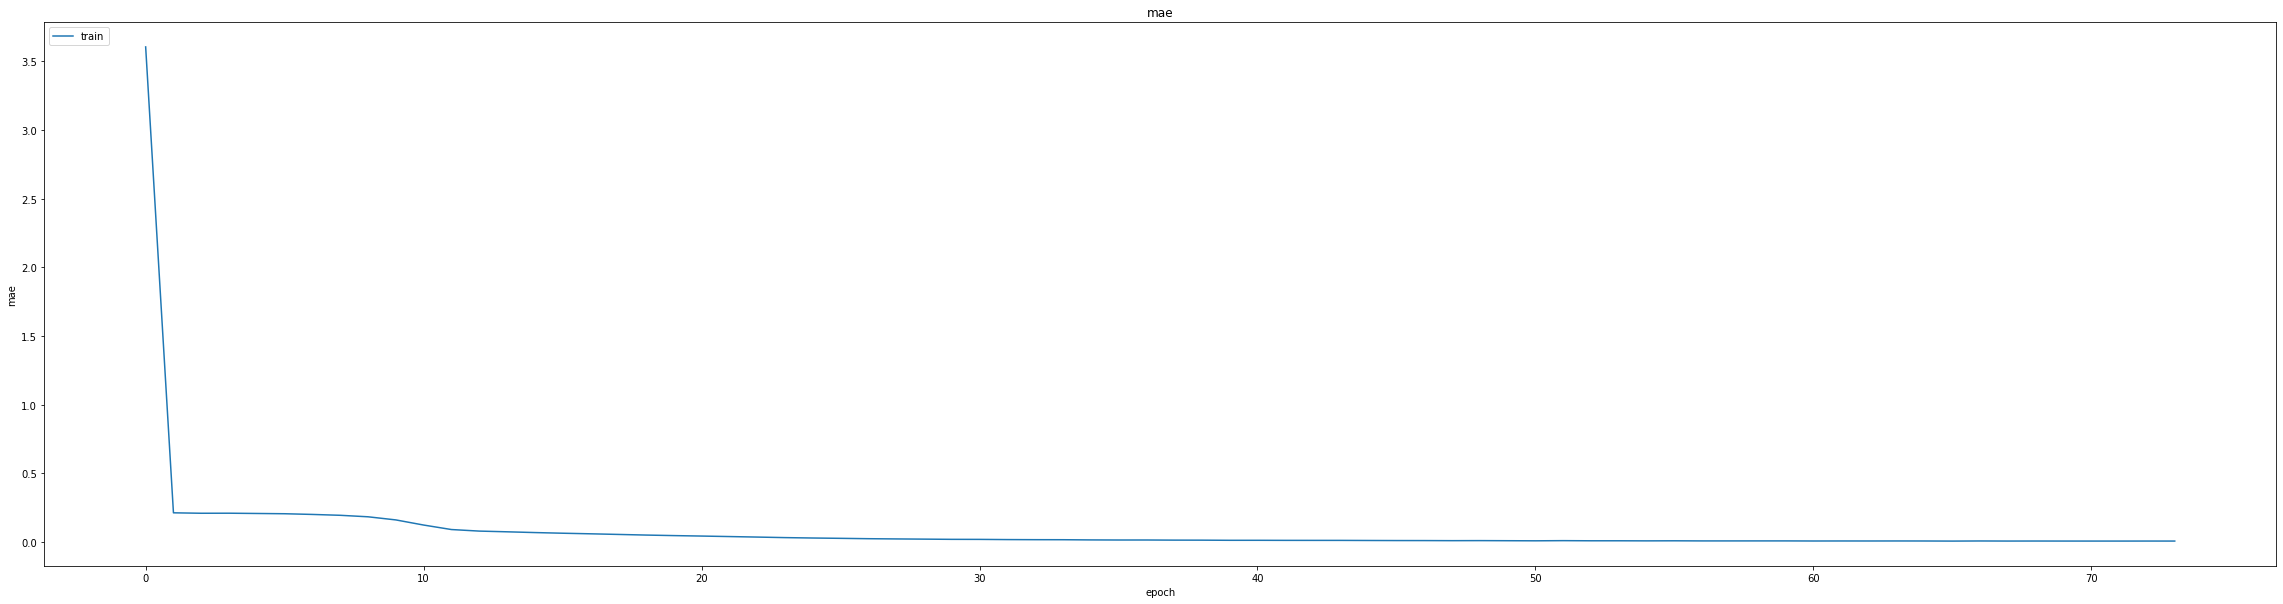

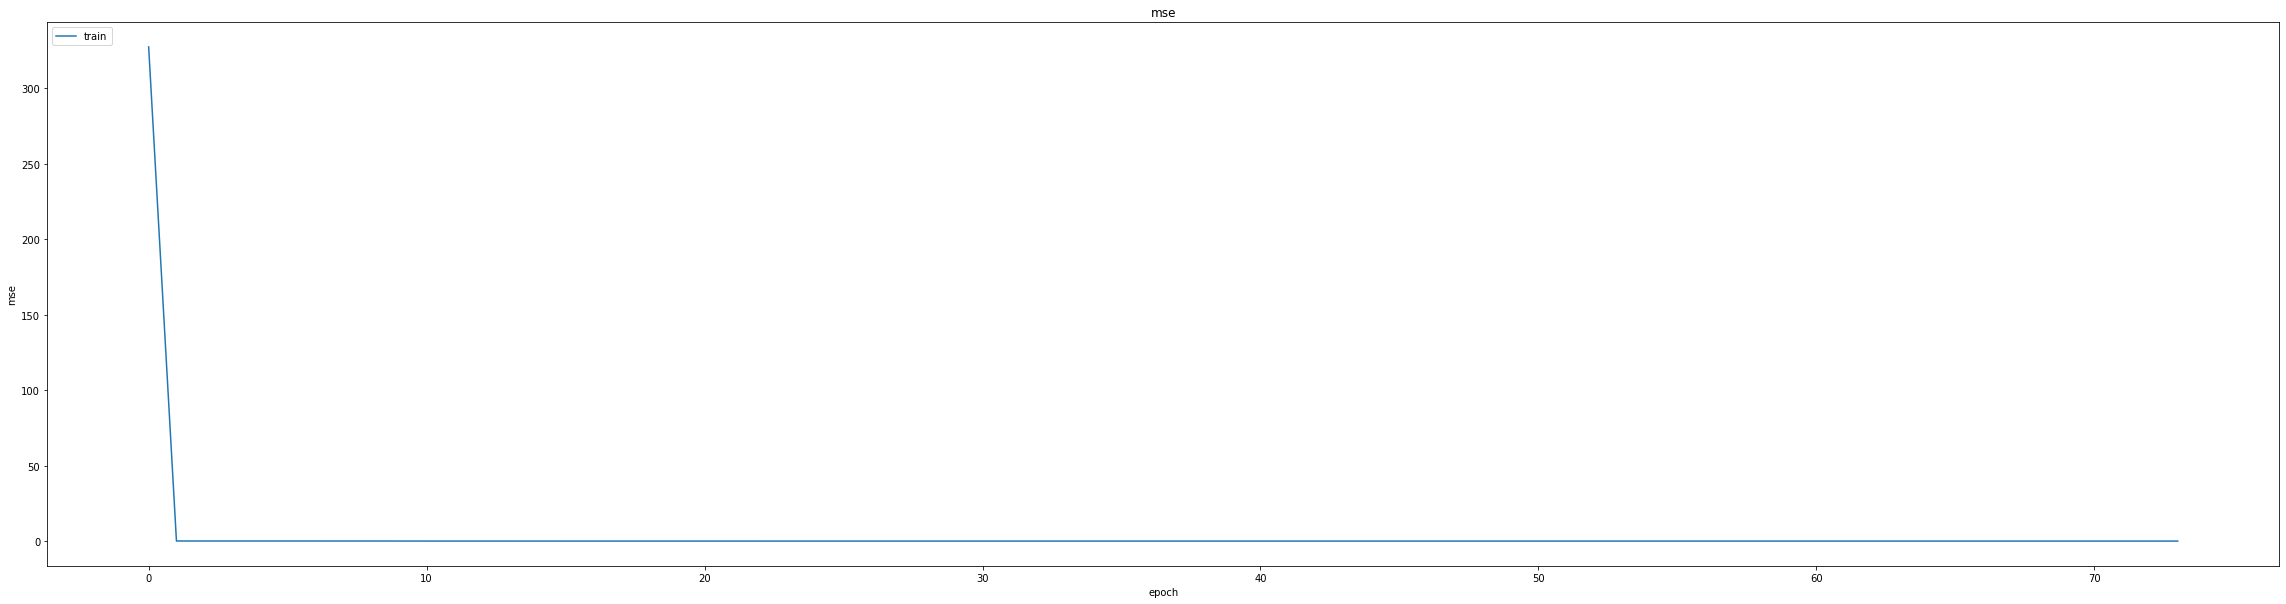

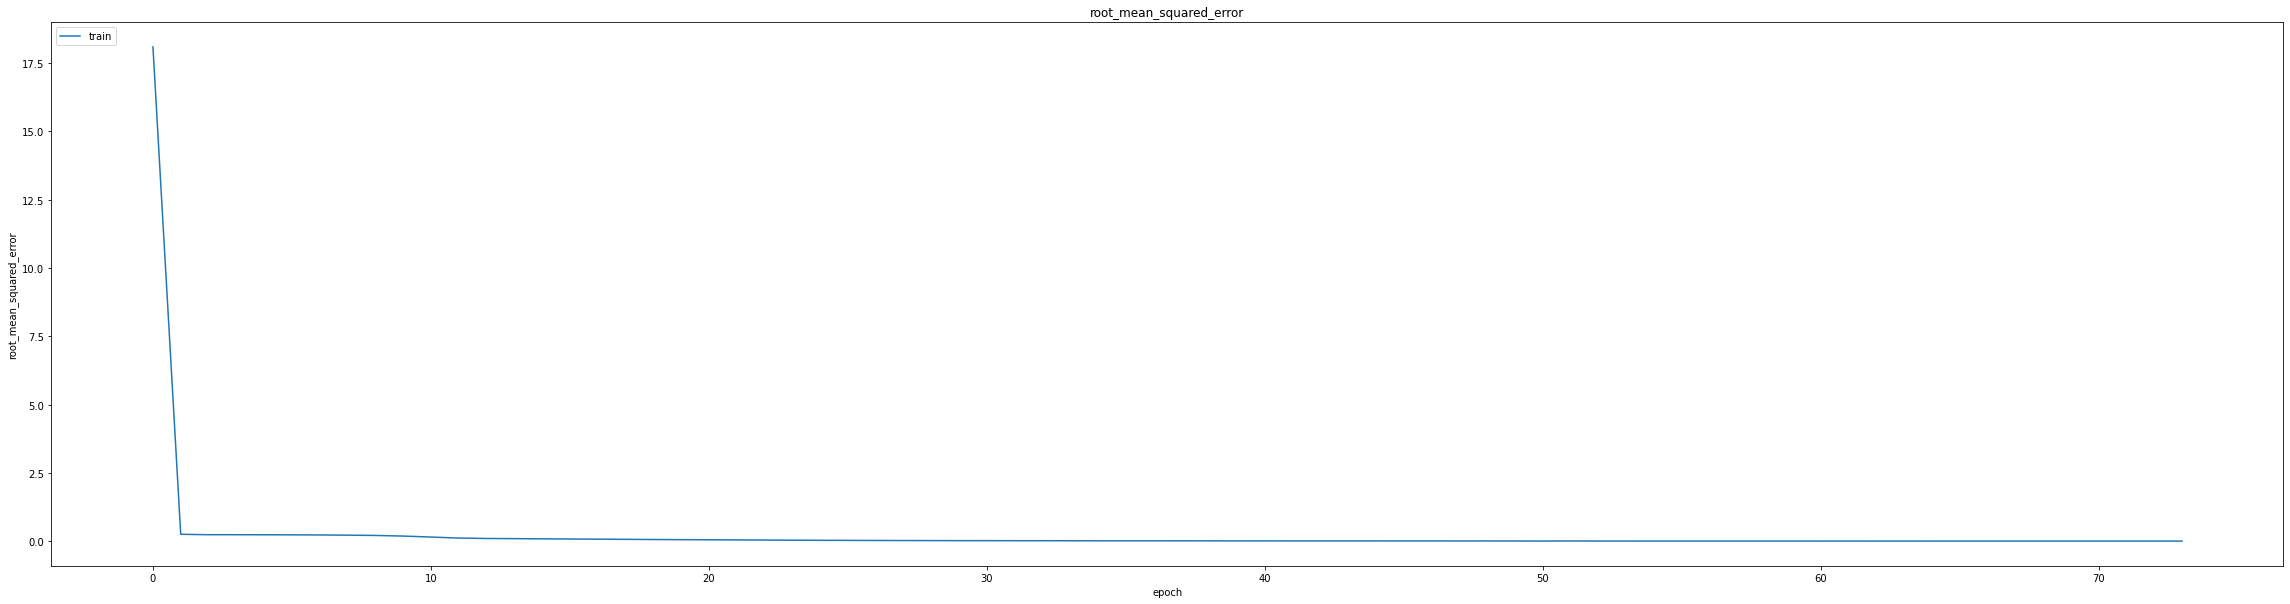

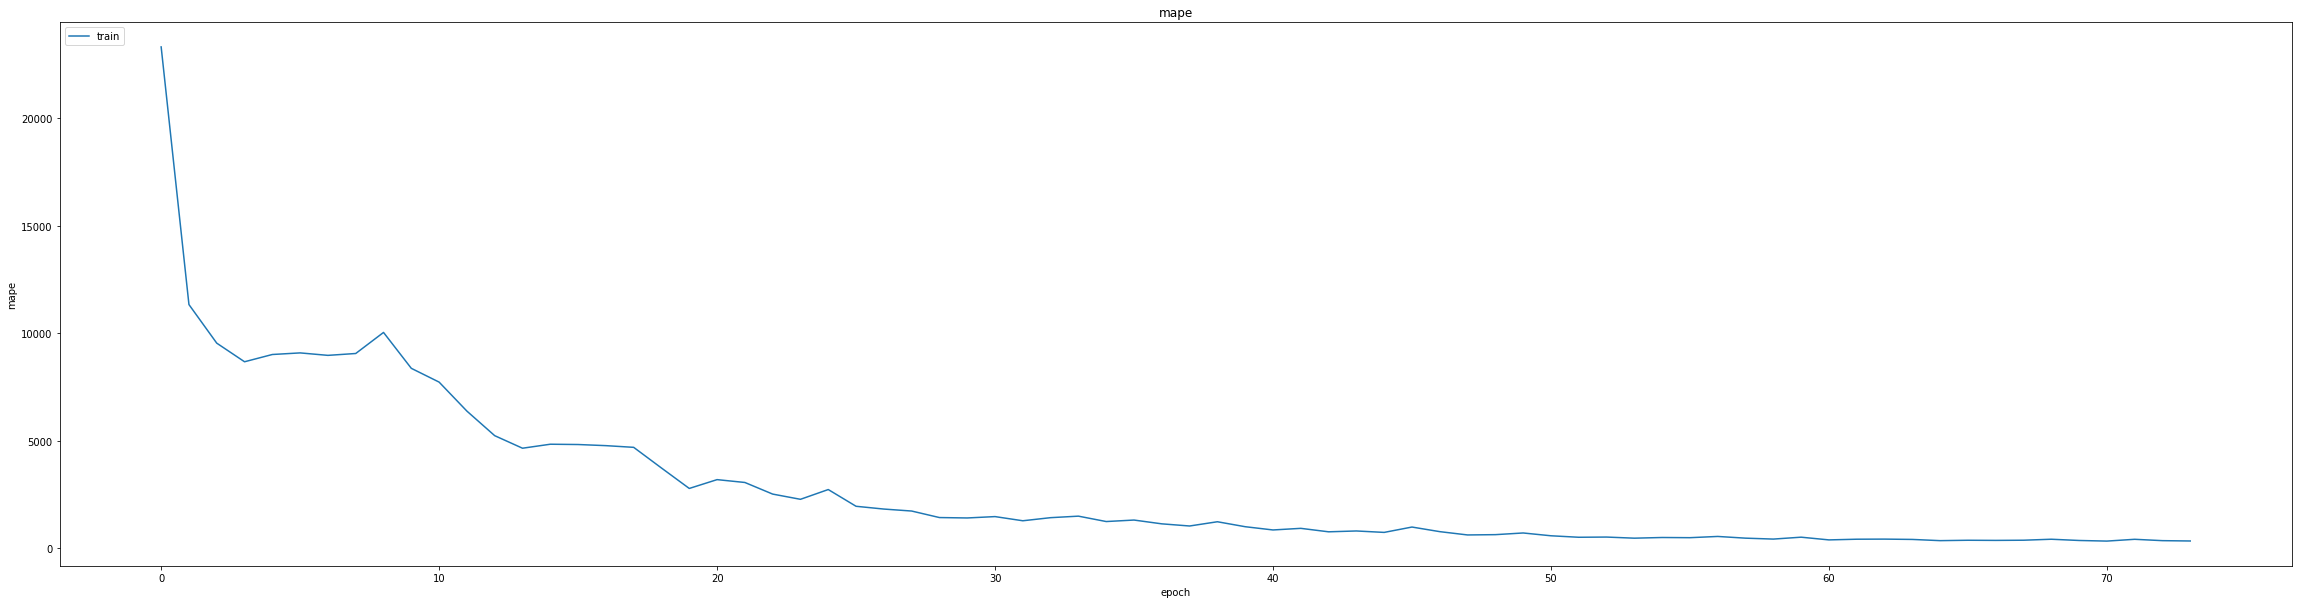

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.01595461368560791
0.02147071249783039
234/234 [==============================] - 22s 81ms/step
0.9901673000728155


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD15_BiLSTM")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
464/464 [==============================] - ETA: 0s - loss: 7.6882e-04 - mae: 0.0126 - mse: 7.6882e-04 - root_mean_squared_error: 0.0277 - mape: 1172.7626
Epoch 1: val_mse did not improve from 0.00046
464/464 [==============================] - 175s 332ms/step - loss: 7.6882e-04 - mae: 0.0126 - mse: 7.6882e-04 - root_mean_squared_error: 0.0277 - mape: 1172.7626 - val_loss: 5.9193e-04 - val_mae: 0.0200 - val_mse: 5.9193e-04 - val_root_mean_squared_error: 0.0243 - val_mape: 7942.1499 - lr: 0.0010
Epoch 2/25
464/464 [==============================] - ETA: 0s - loss: 9.7229e-05 - mae: 0.0077 - mse: 9.7229e-05 - root_mean_squared_error: 0.0099 - mape: 777.6279
Epoch 2: val_mse did not improve from 0.00046
464/464 [==============================] - 146s 315ms/step - loss: 9.7229e-05 - mae: 0.0077 - mse: 9.7229e-05 - root_mean_squared_error: 0.0099 - mape: 777.6279 - val_loss: 0.0010 - val_mae: 0.0282 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0320 - val_mape: 5531.7002 - lr:

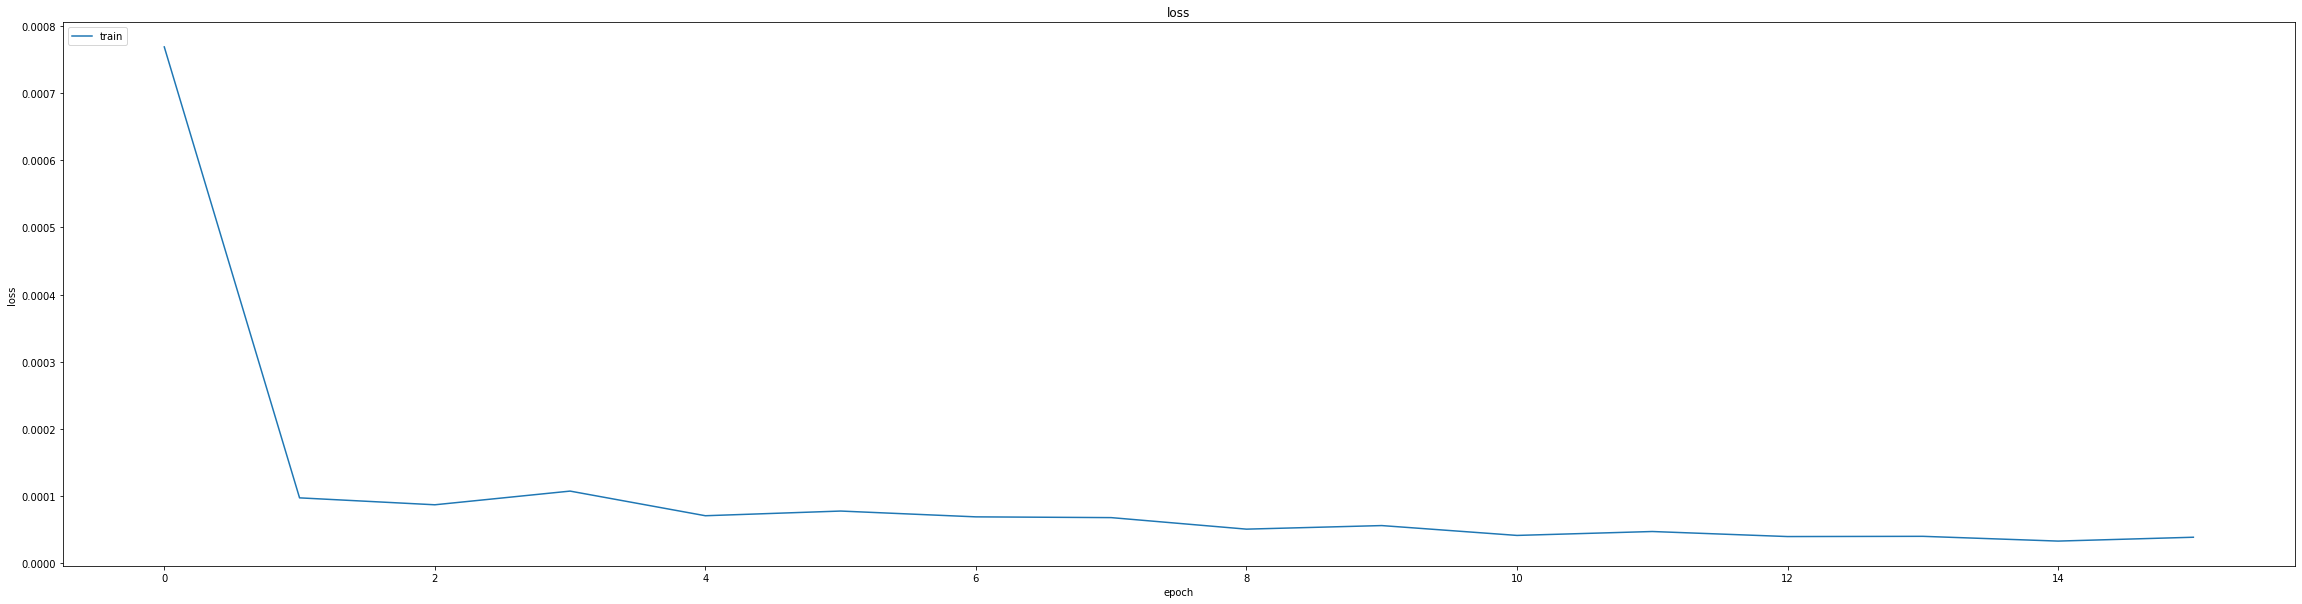

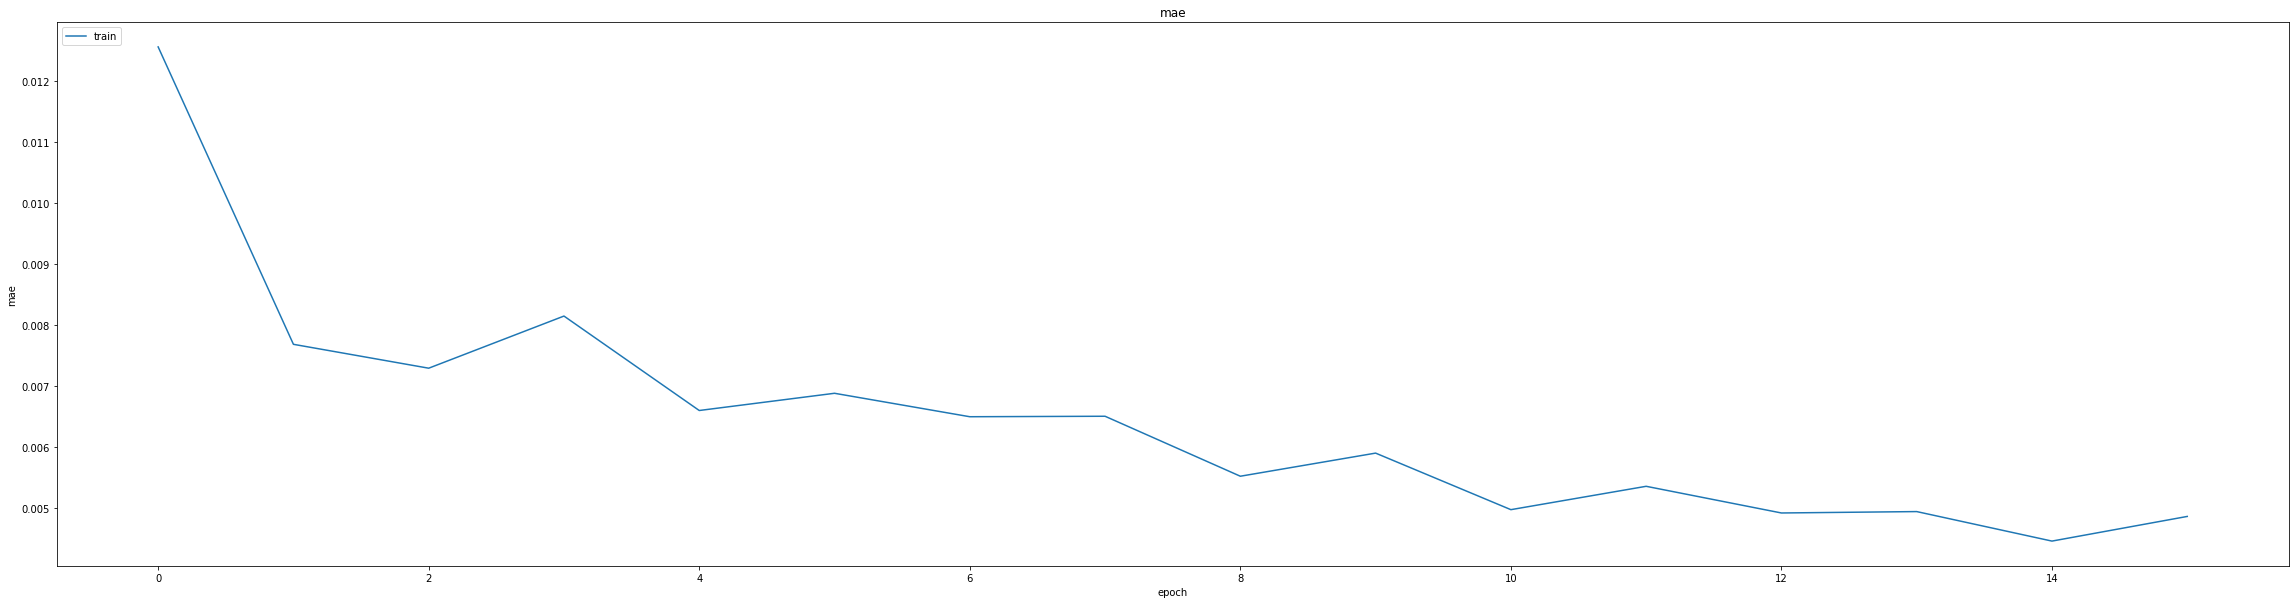

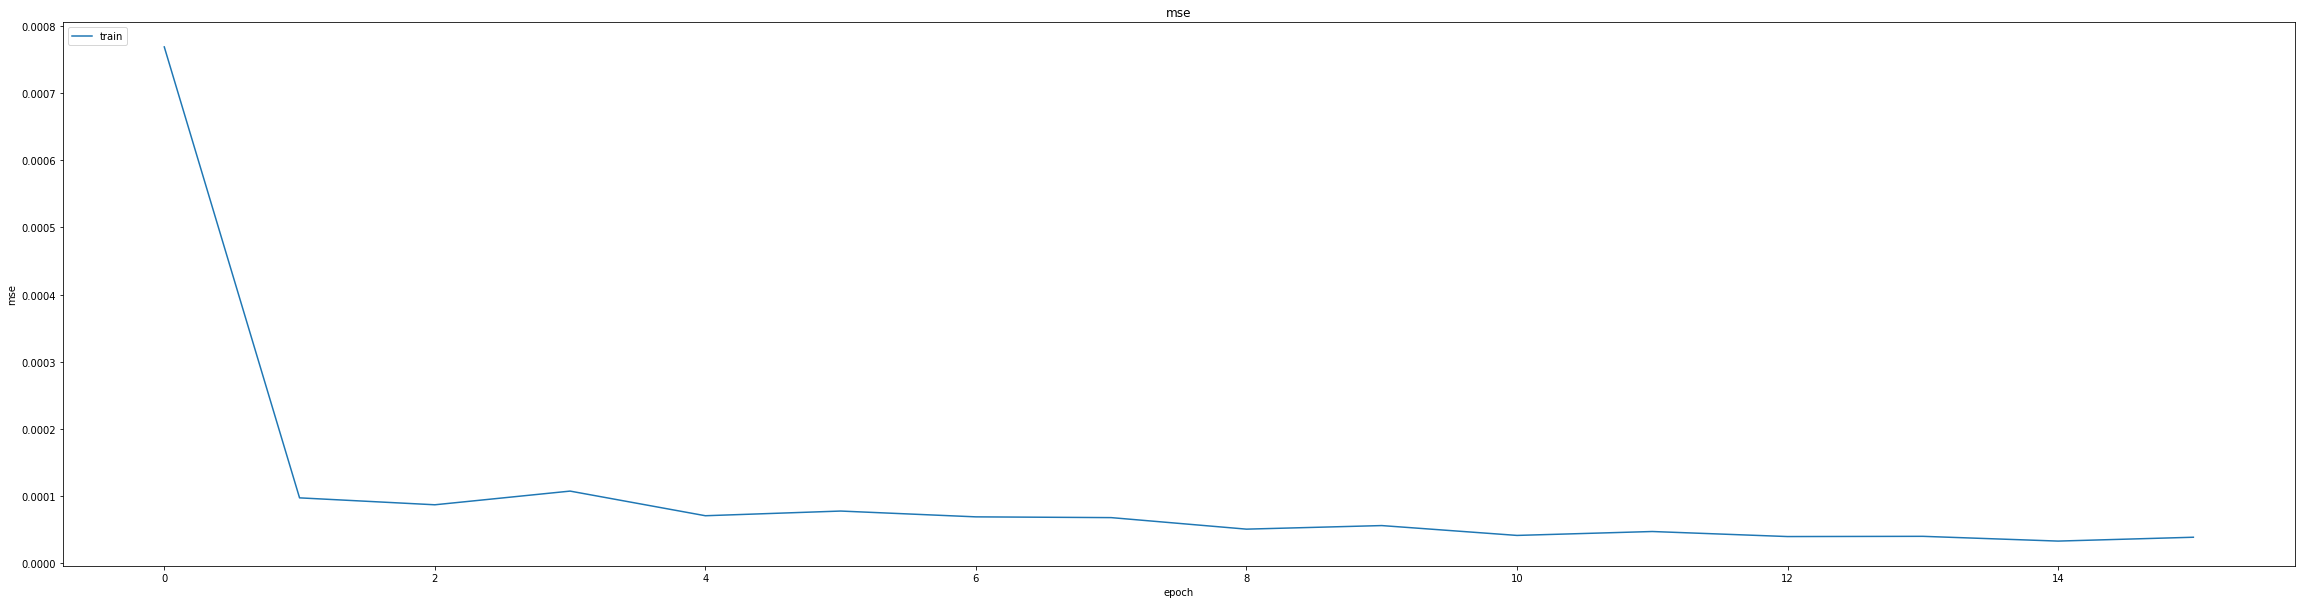

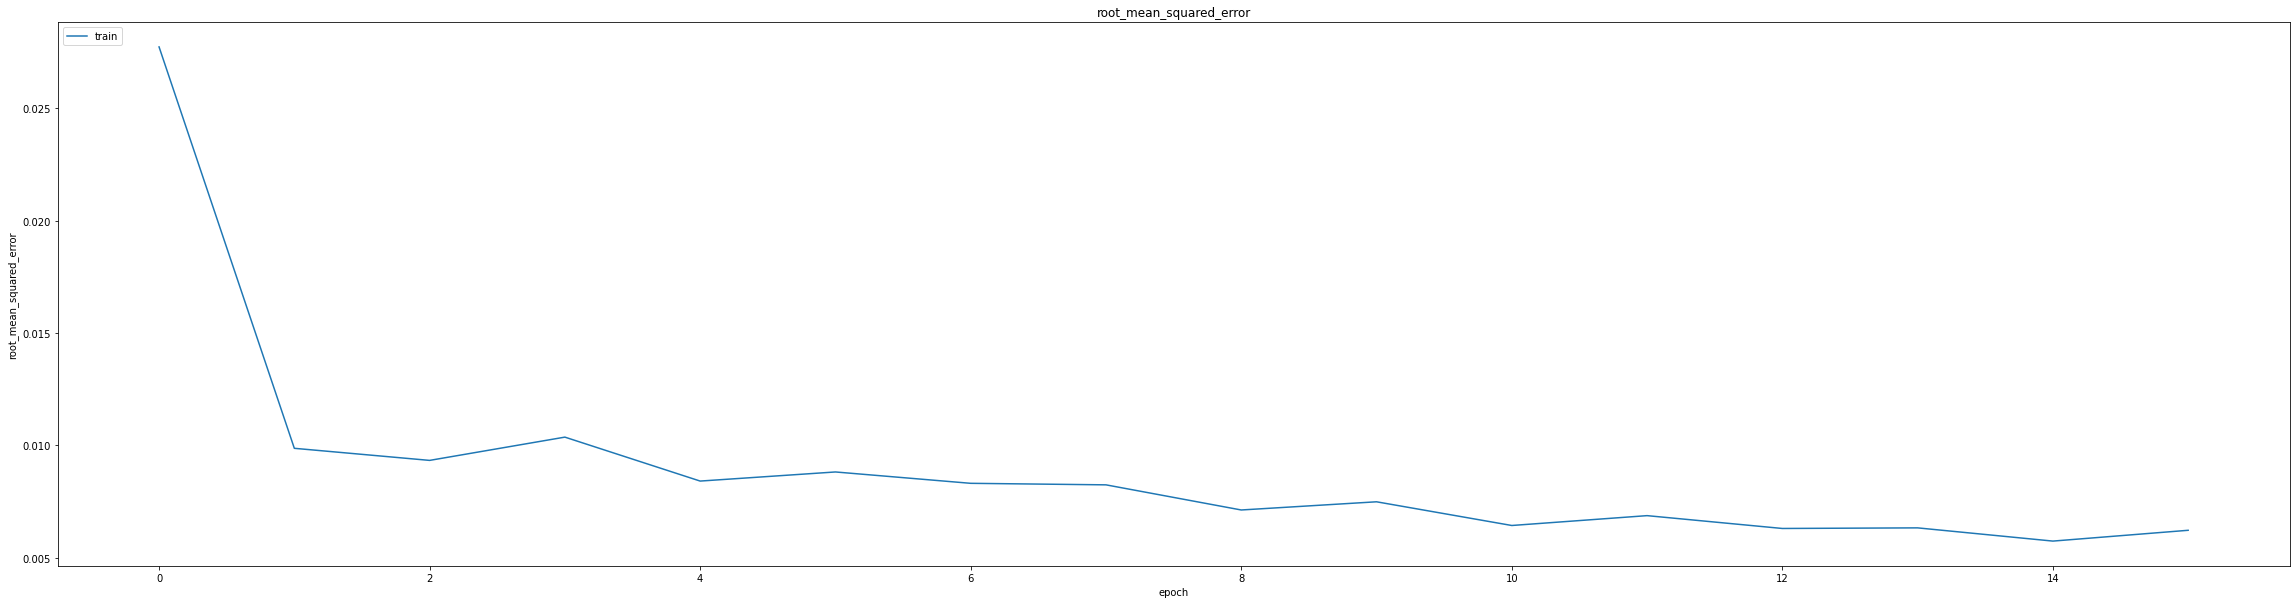

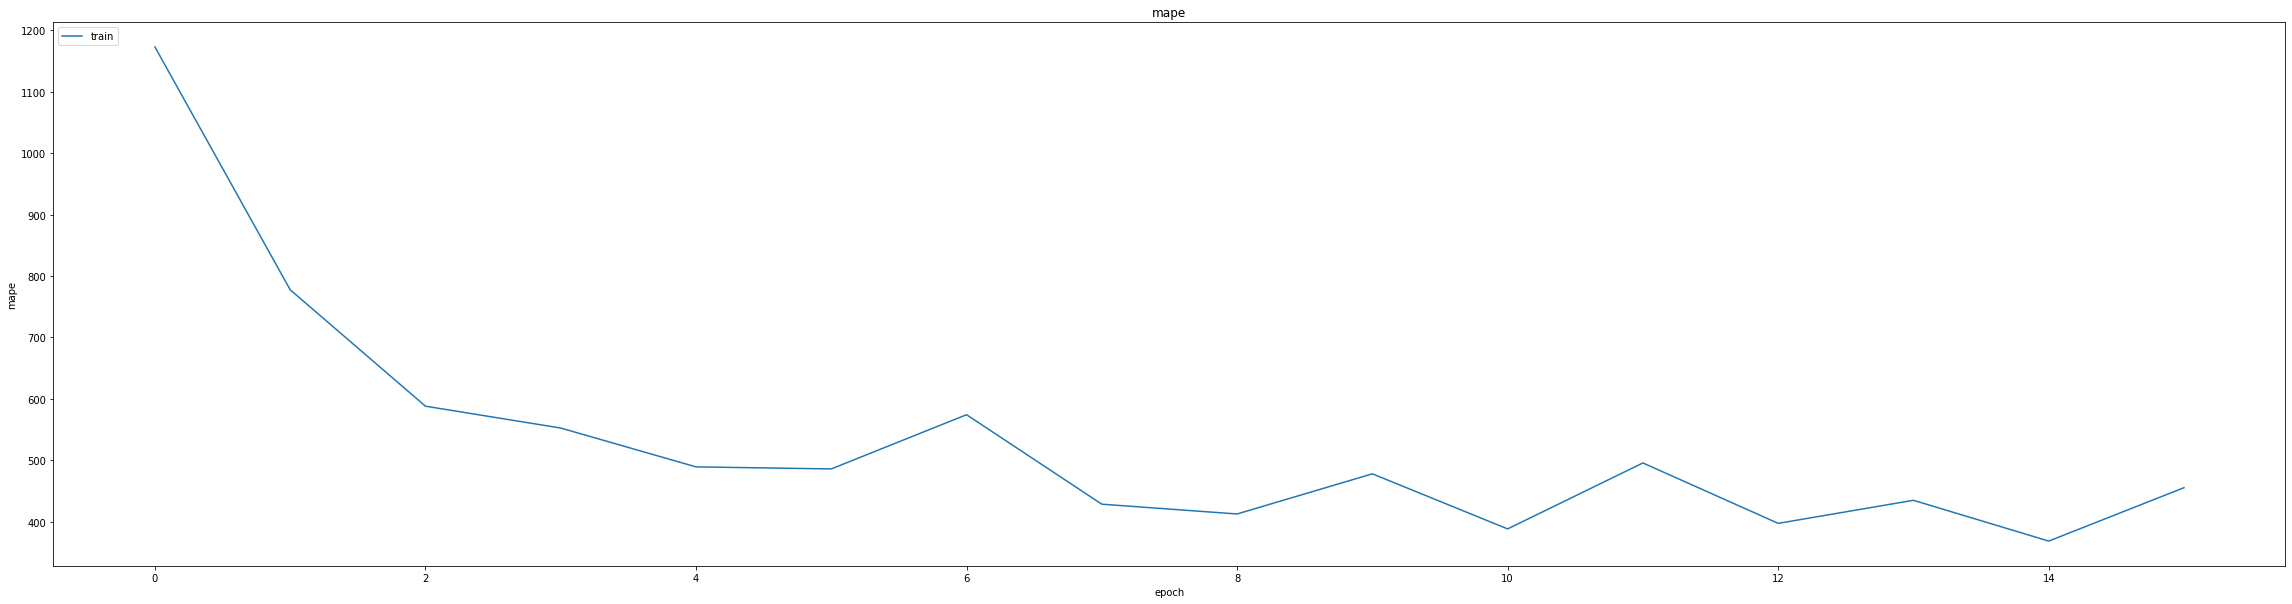

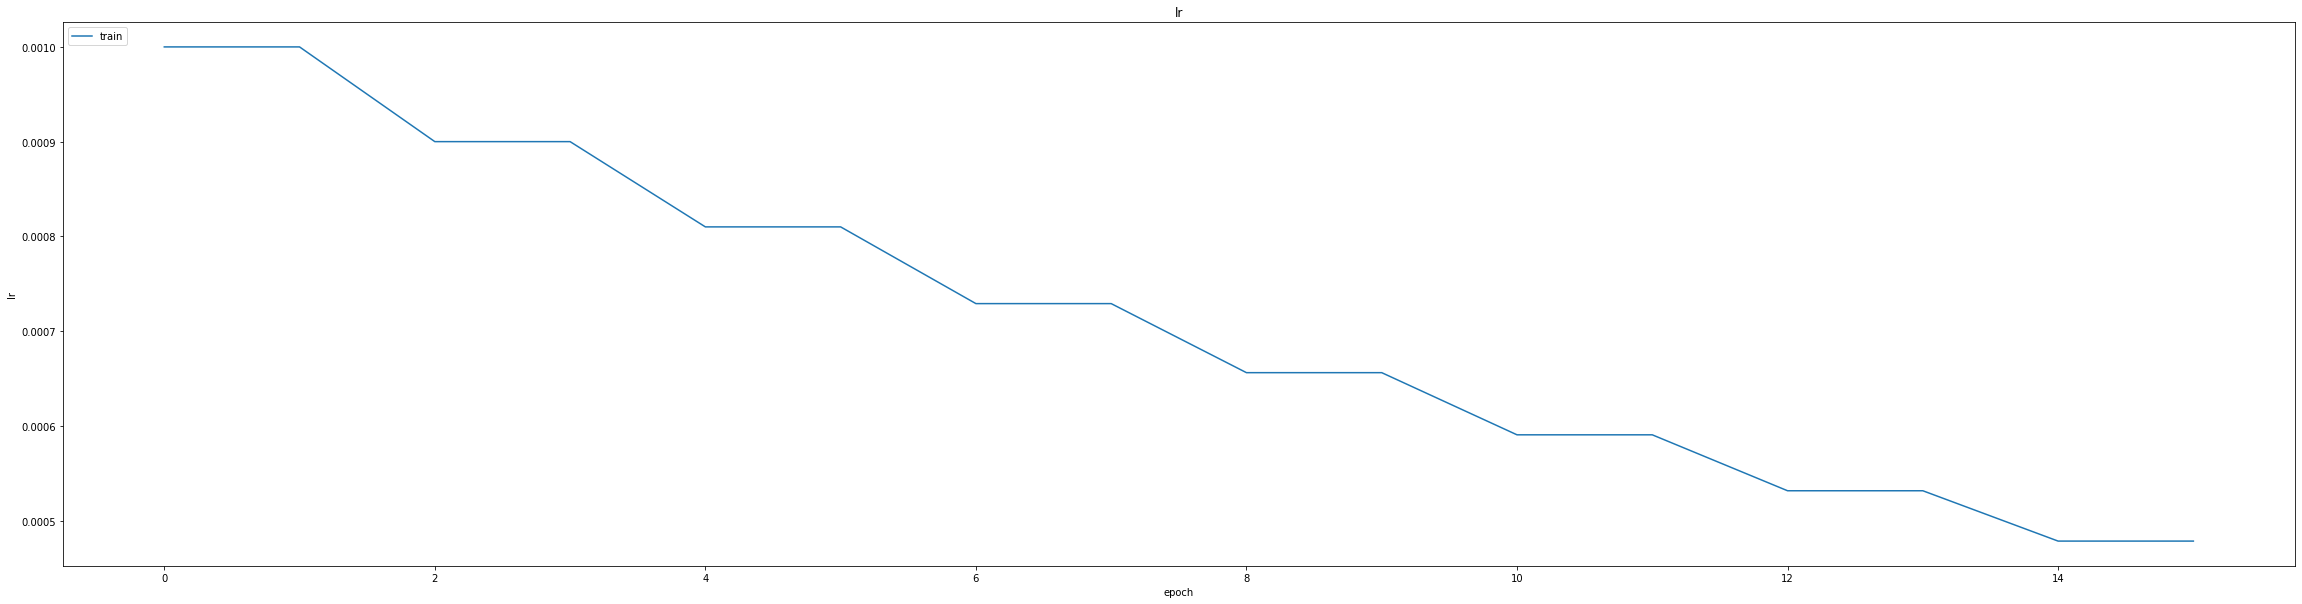

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.019977301359176636
0.024329544976353645
234/234 [==============================] - 22s 74ms/step
0.9901698381058849


234/234 [==============================] - 10s 42ms/step


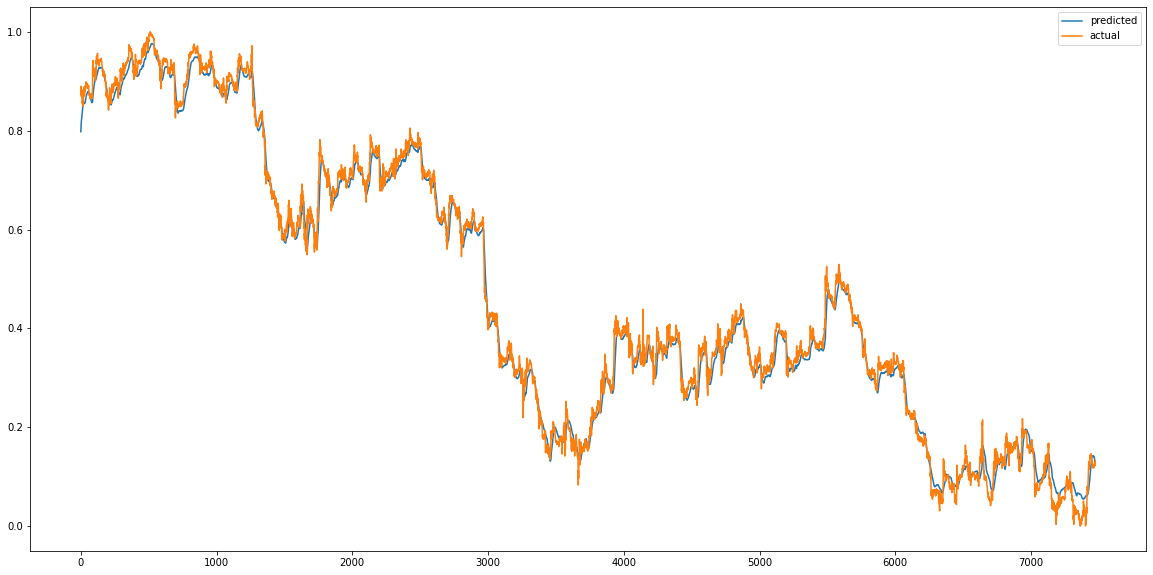

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/EUR_USD15_BiLSTM")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


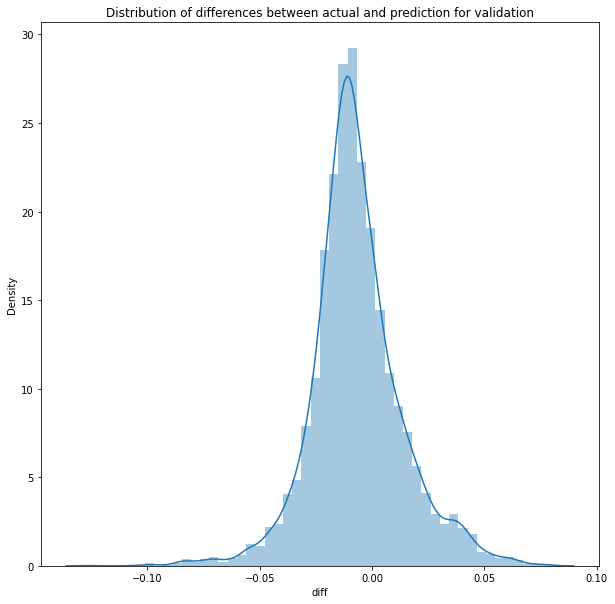

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

230/230 [==============================] - 10s 42ms/step


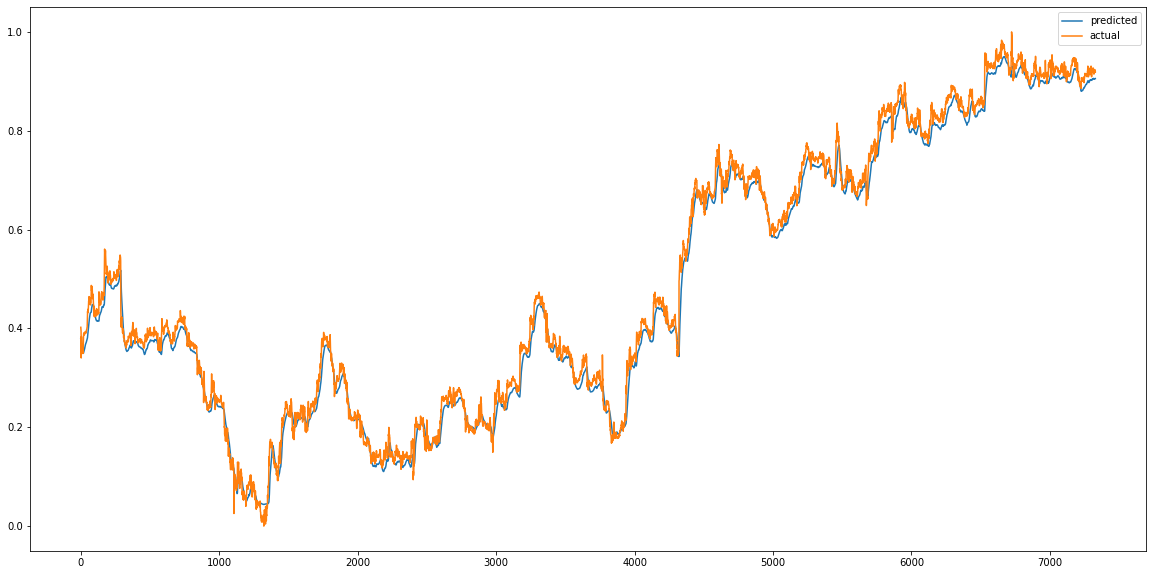

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


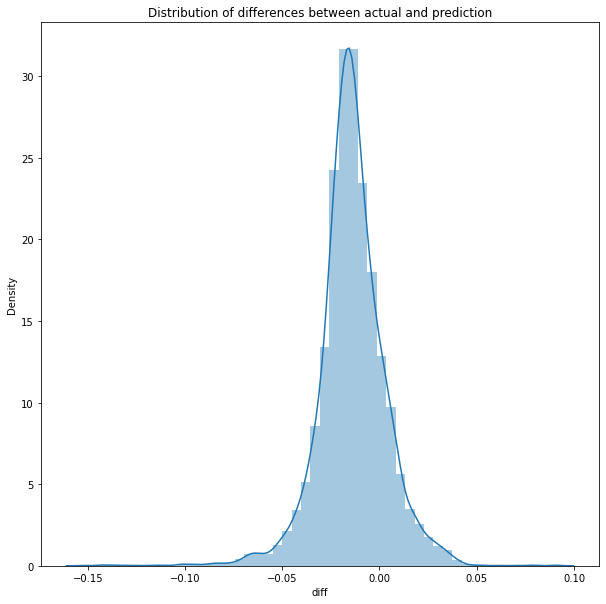

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.0005018311798177444
MAE :  0.017894112296490898
RMSE  : 0.022401588778873348
230/230 [==============================] - 10s 42ms/step
R2_Score  : 0.993328363380205


count    7329.000000
mean       -0.014131
std         0.017384
min        -0.152221
25%        -0.022801
50%        -0.014724
75%        -0.004944
max         0.091003
Name: diff, dtype: float64

In [ ]:
model= thesis.LSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 256)           275456    
                                                                 
 lstm_1 (LSTM)               (None, 24, 64)            82176     
                                                                 
 dropout (Dropout)           (None, 24, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 16)                5184      
                                                                 
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
464/464 [==============================] - ETA: 0s - loss: 444.6530 - mae: 5.9799 - mse: 444.6530 - root_mean_squared_error: 21.0868 - mape: 17692.5098
Epoch 1: val_mse improved from inf to 0.20700, saving model to weights.best.hdf5
464/464 [==============================] - 97s 197ms/step - loss: 444.6530 - mae: 5.9799 - mse: 444.6530 - root_mean_squared_error: 21.0868 - mape: 17692.5098 - val_loss: 0.2070 - val_mae: 0.3864 - val_mse: 0.2070 - val_root_mean_squared_error: 0.4550 - val_mape: 110799.9531
Epoch 2/75
464/464 [==============================] - ETA: 0s - loss: 0.0761 - mae: 0.2201 - mse: 0.0761 - root_mean_squared_error: 0.2759 - mape: 9471.2812
Epoch 2: val_mse improved from 0.20700 to 0.09892, saving model to weights.best.hdf5
464/464 [==============================] - 87s 188ms/step - loss: 0.0761 - mae: 0.2201 - mse: 0.0761 - root_mean_squared_error: 0.2759 - mape: 9471.2812 - val_loss: 0.0989 - val_mae: 0.2780 - val_mse: 0.0989 - val_root_mean_squared_error:

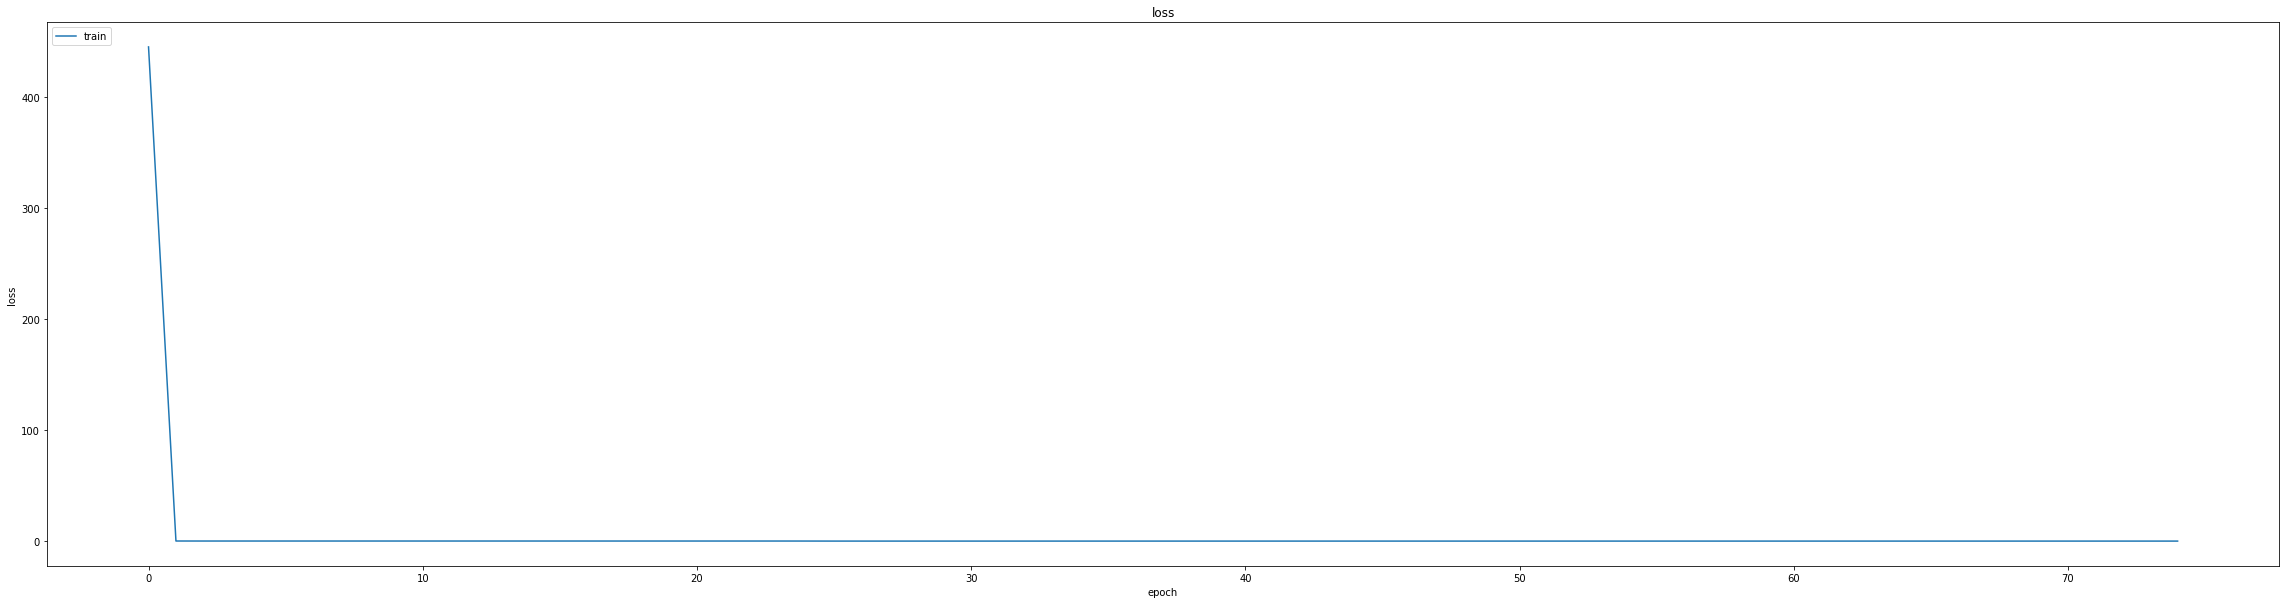

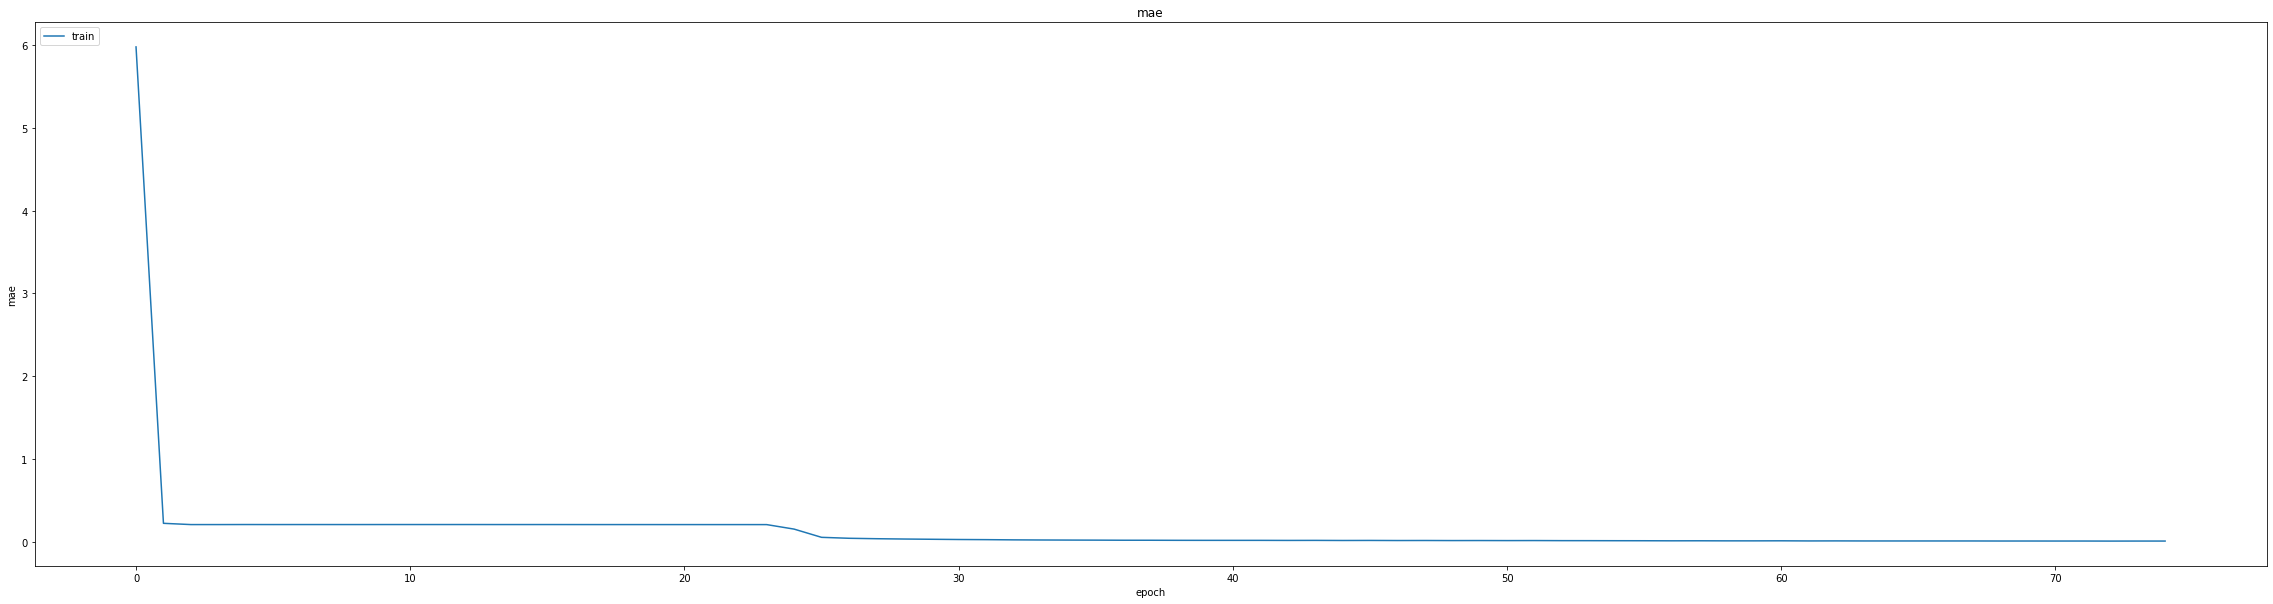

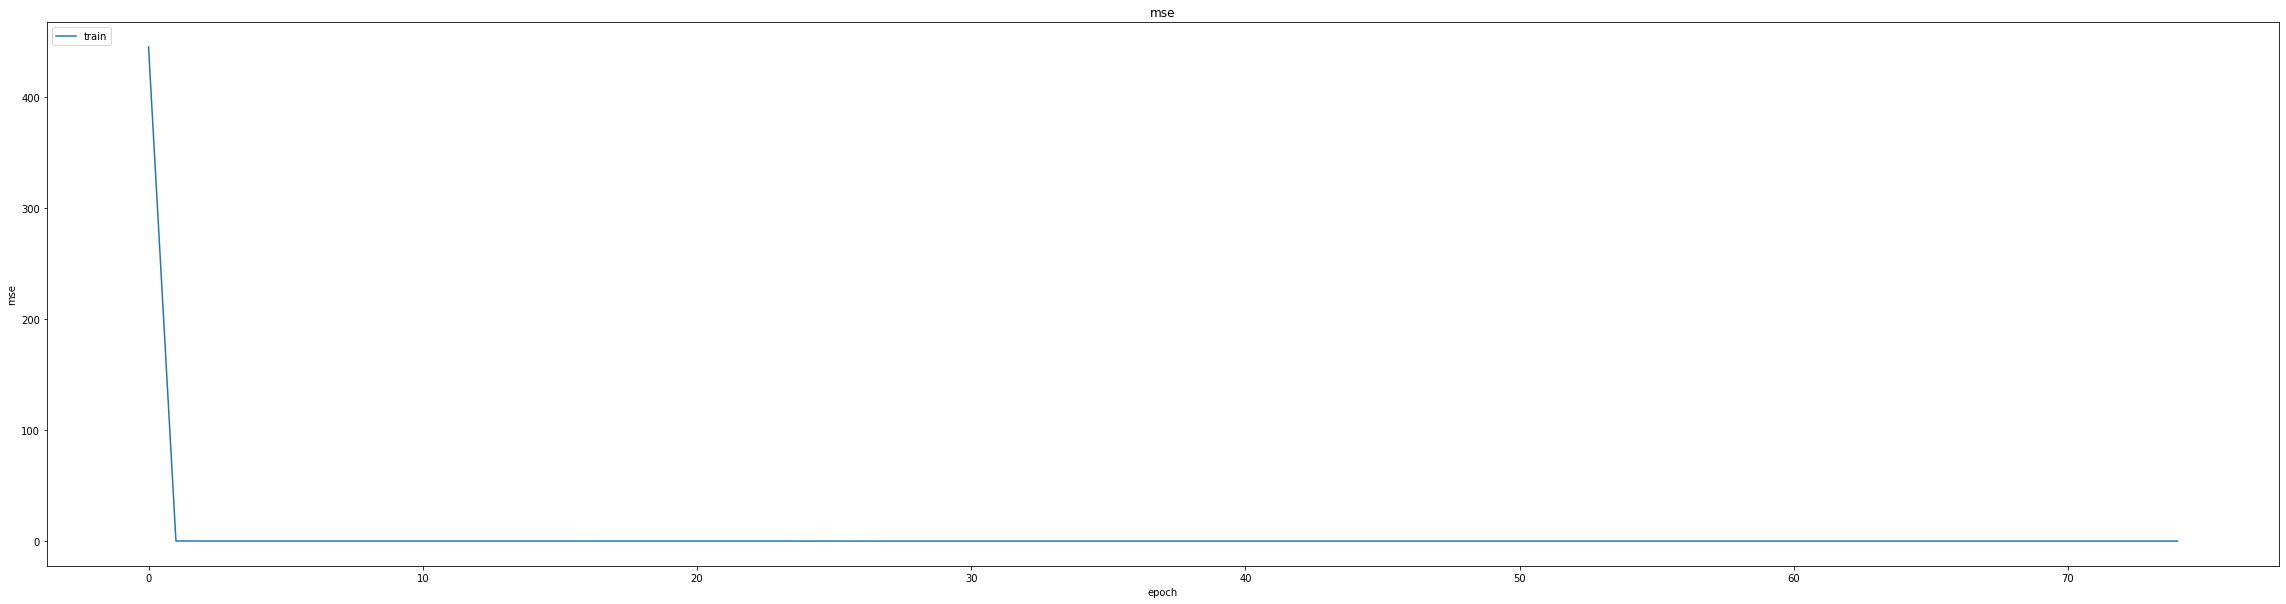

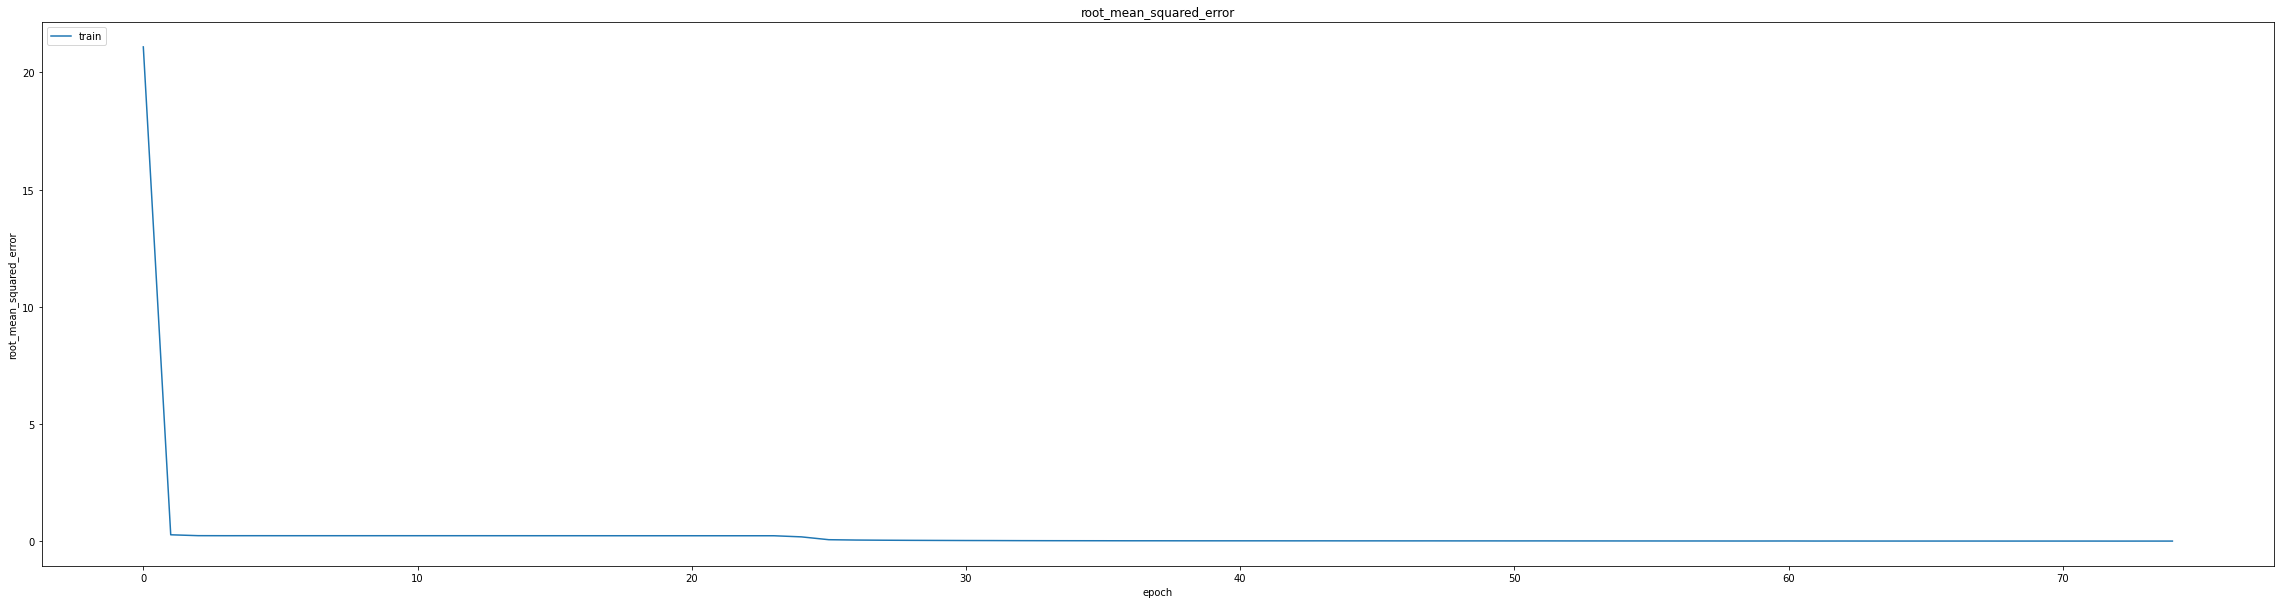

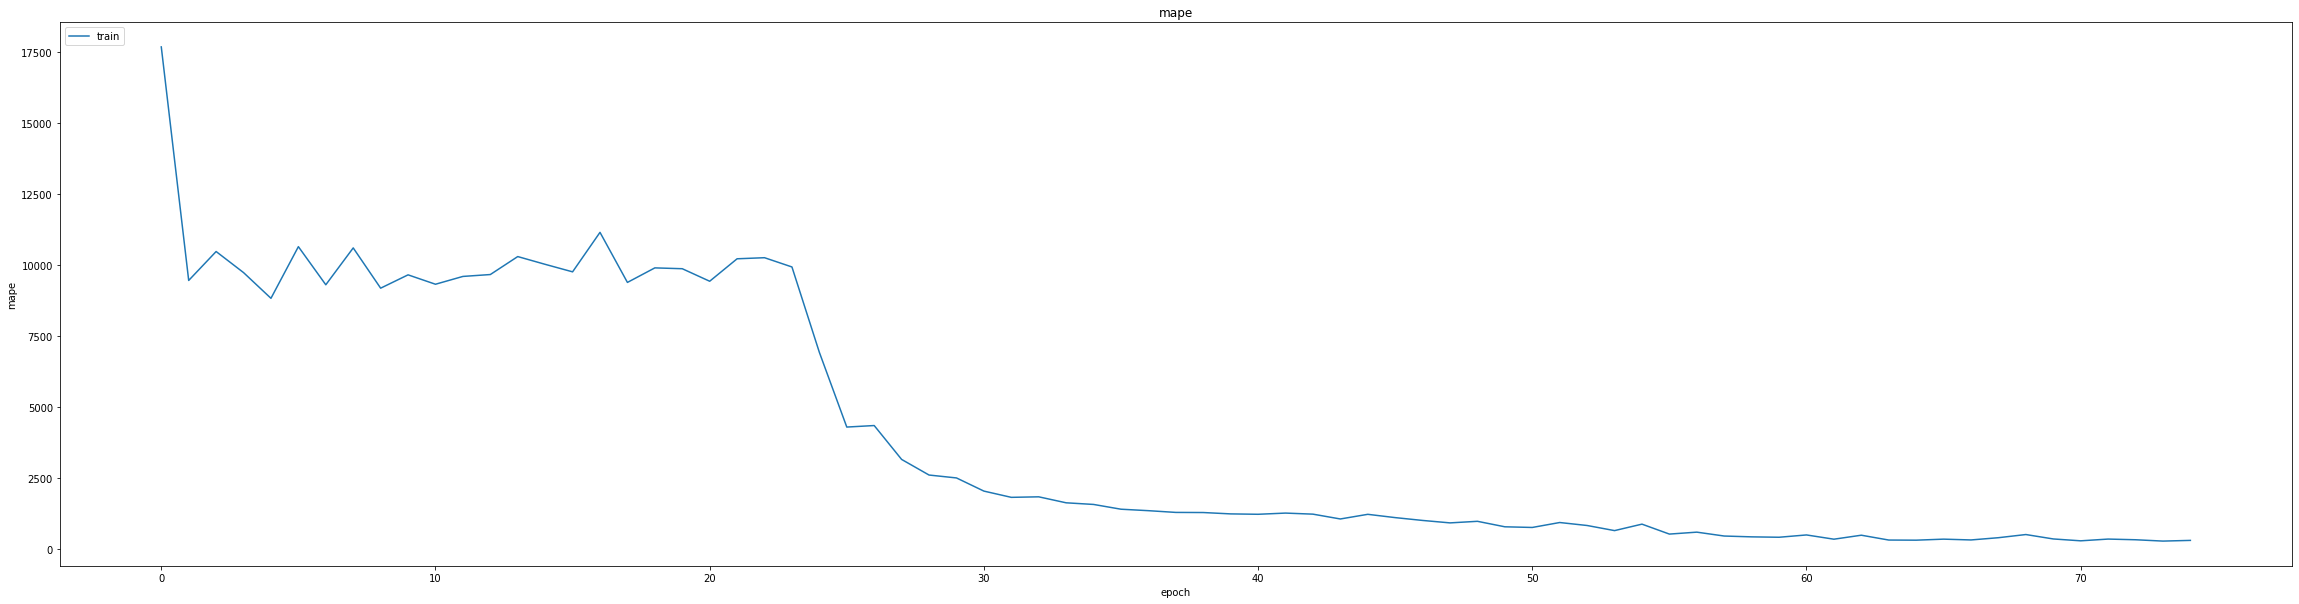

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.01897401735186577
0.023994600400328636
189/234 [=======================>......] - ETA: 1s

In [ ]:
model.load_weights("weights.best.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
464/464 [==============================] - ETA: 0s - loss: 2.0952e-04 - mae: 0.0065 - mse: 2.0952e-04 - root_mean_squared_error: 0.0145 - mape: 390.0207
Epoch 1: val_mse did not improve from 0.00058
464/464 [==============================] - 94s 193ms/step - loss: 2.0952e-04 - mae: 0.0065 - mse: 2.0952e-04 - root_mean_squared_error: 0.0145 - mape: 390.0207 - val_loss: 9.7509e-04 - val_mae: 0.0286 - val_mse: 9.7509e-04 - val_root_mean_squared_error: 0.0312 - val_mape: 2805.8965 - lr: 0.0010
Epoch 2/25
464/464 [==============================] - ETA: 0s - loss: 2.4107e-05 - mae: 0.0037 - mse: 2.4107e-05 - root_mean_squared_error: 0.0049 - mape: 300.3126
Epoch 2: val_mse did not improve from 0.00058
464/464 [==============================] - 87s 188ms/step - loss: 2.4107e-05 - mae: 0.0037 - mse: 2.4107e-05 - root_mean_squared_error: 0.0049 - mape: 300.3126 - val_loss: 7.4135e-04 - val_mae: 0.0243 - val_mse: 7.4135e-04 - val_root_mean_squared_error: 0.0272 - val_mape: 2745.8489 -

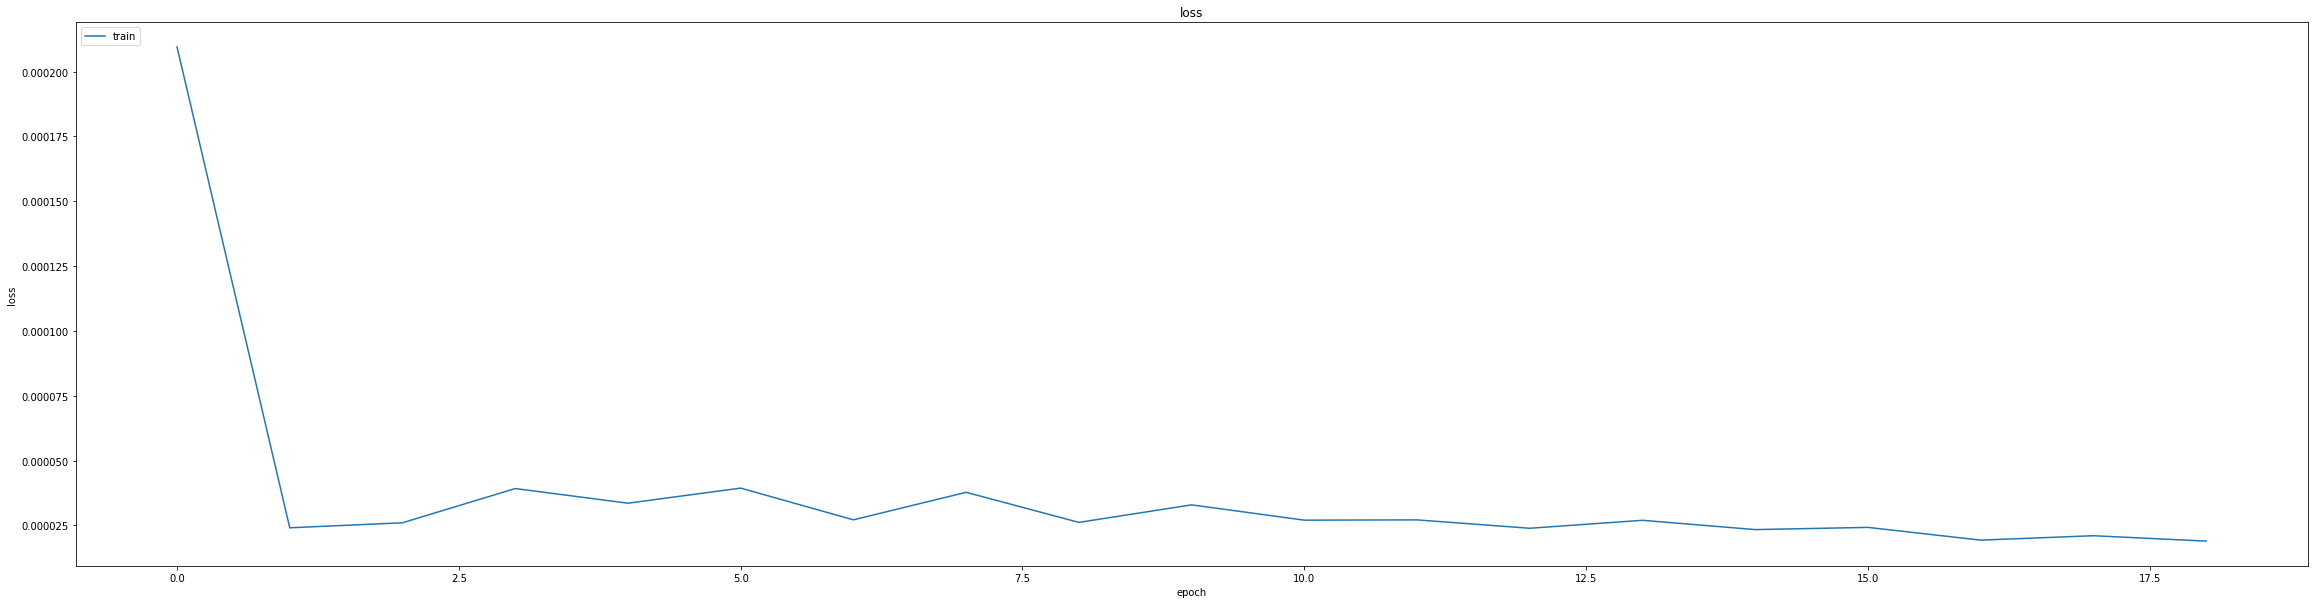

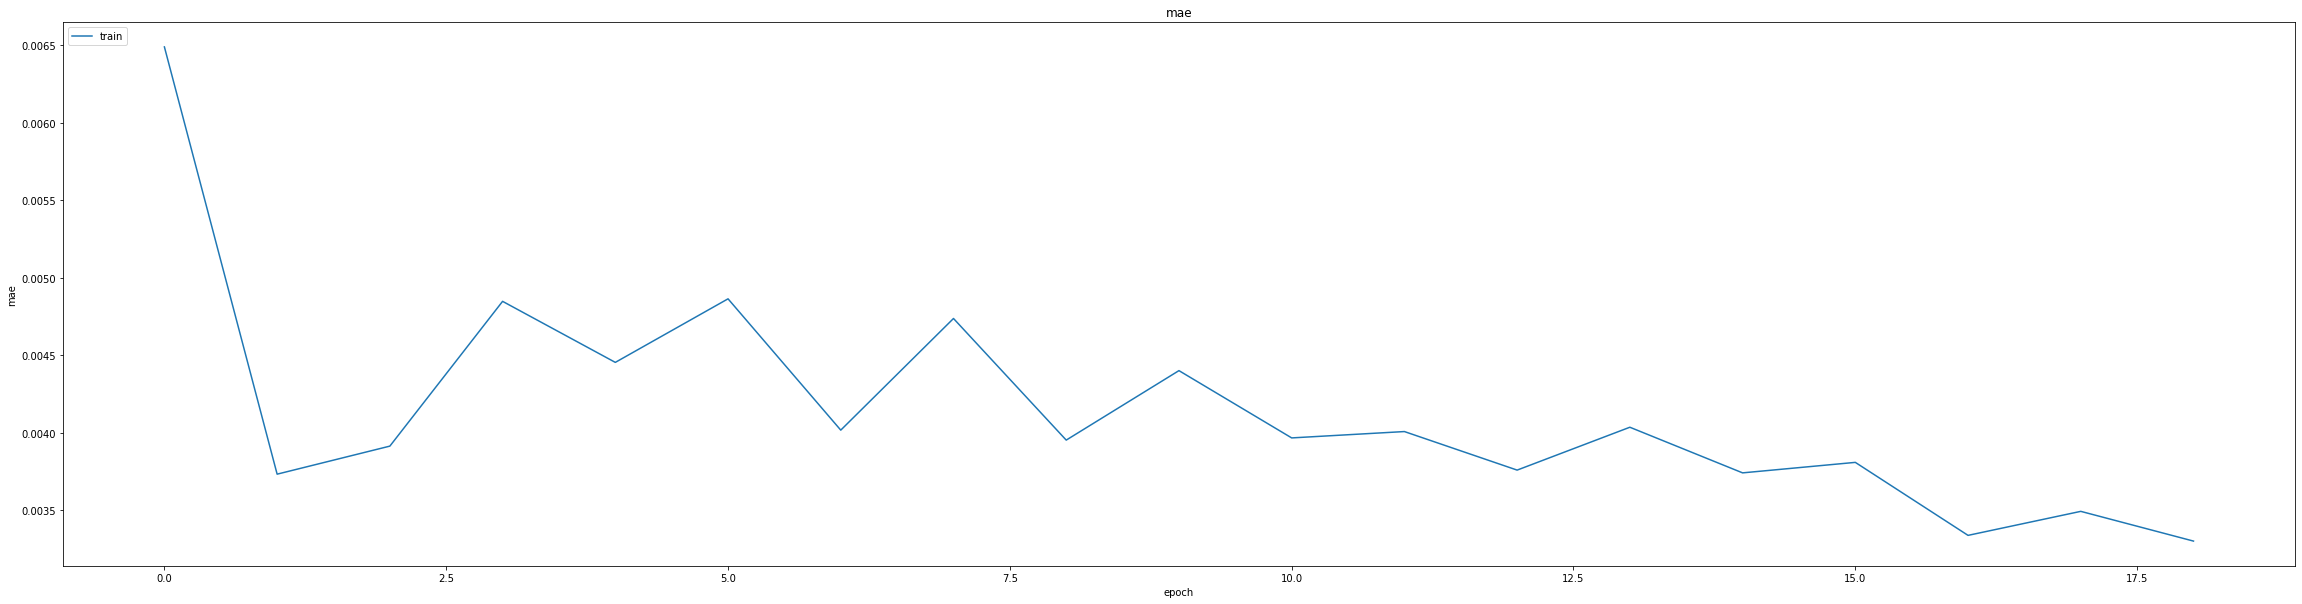

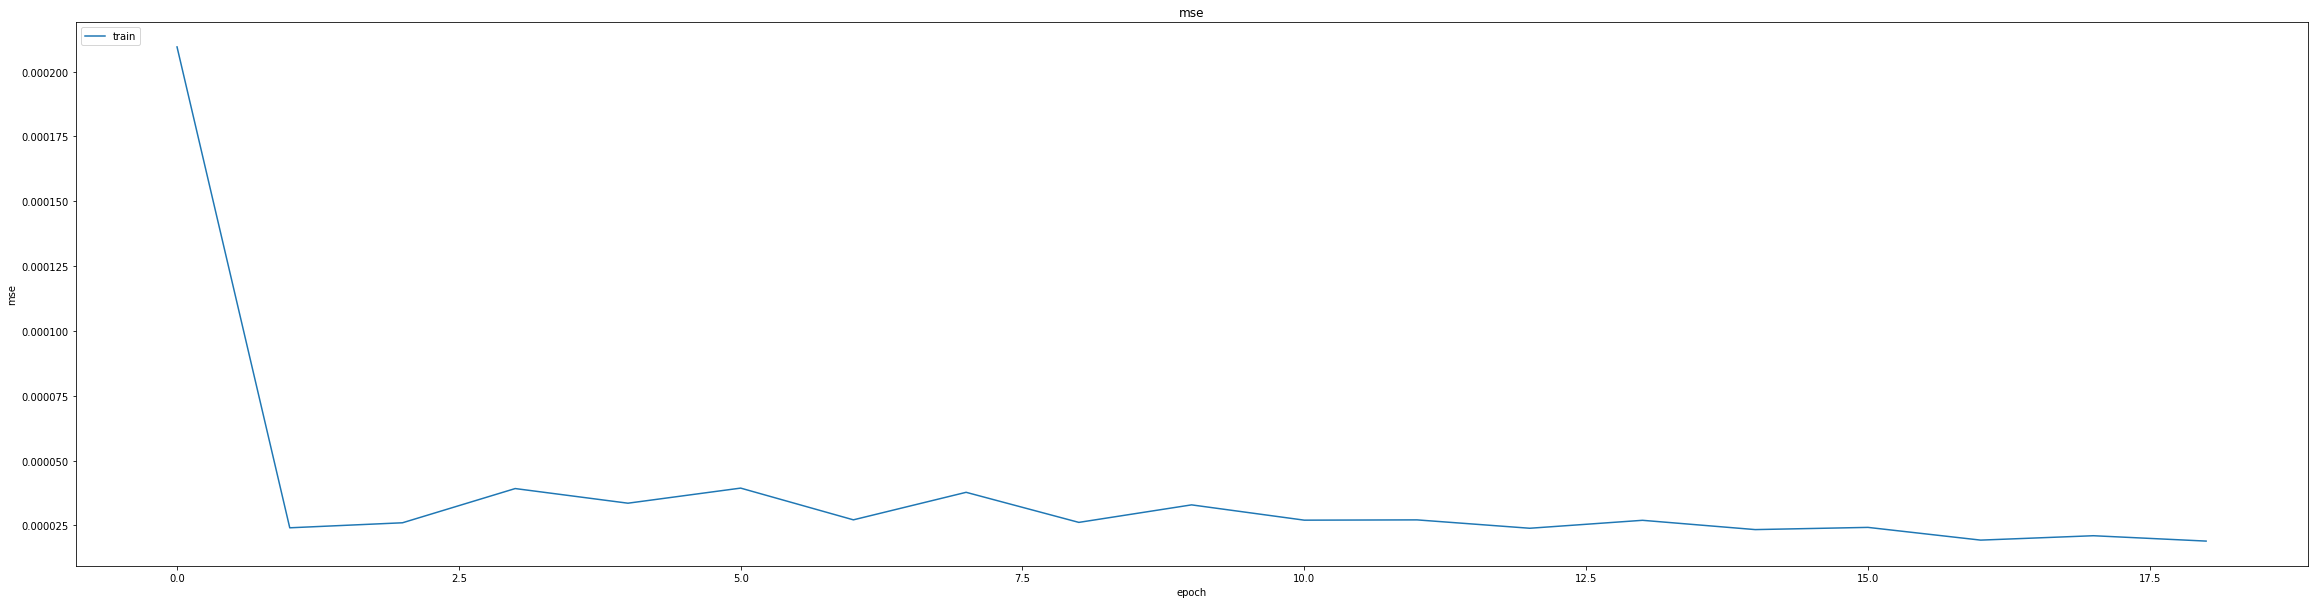

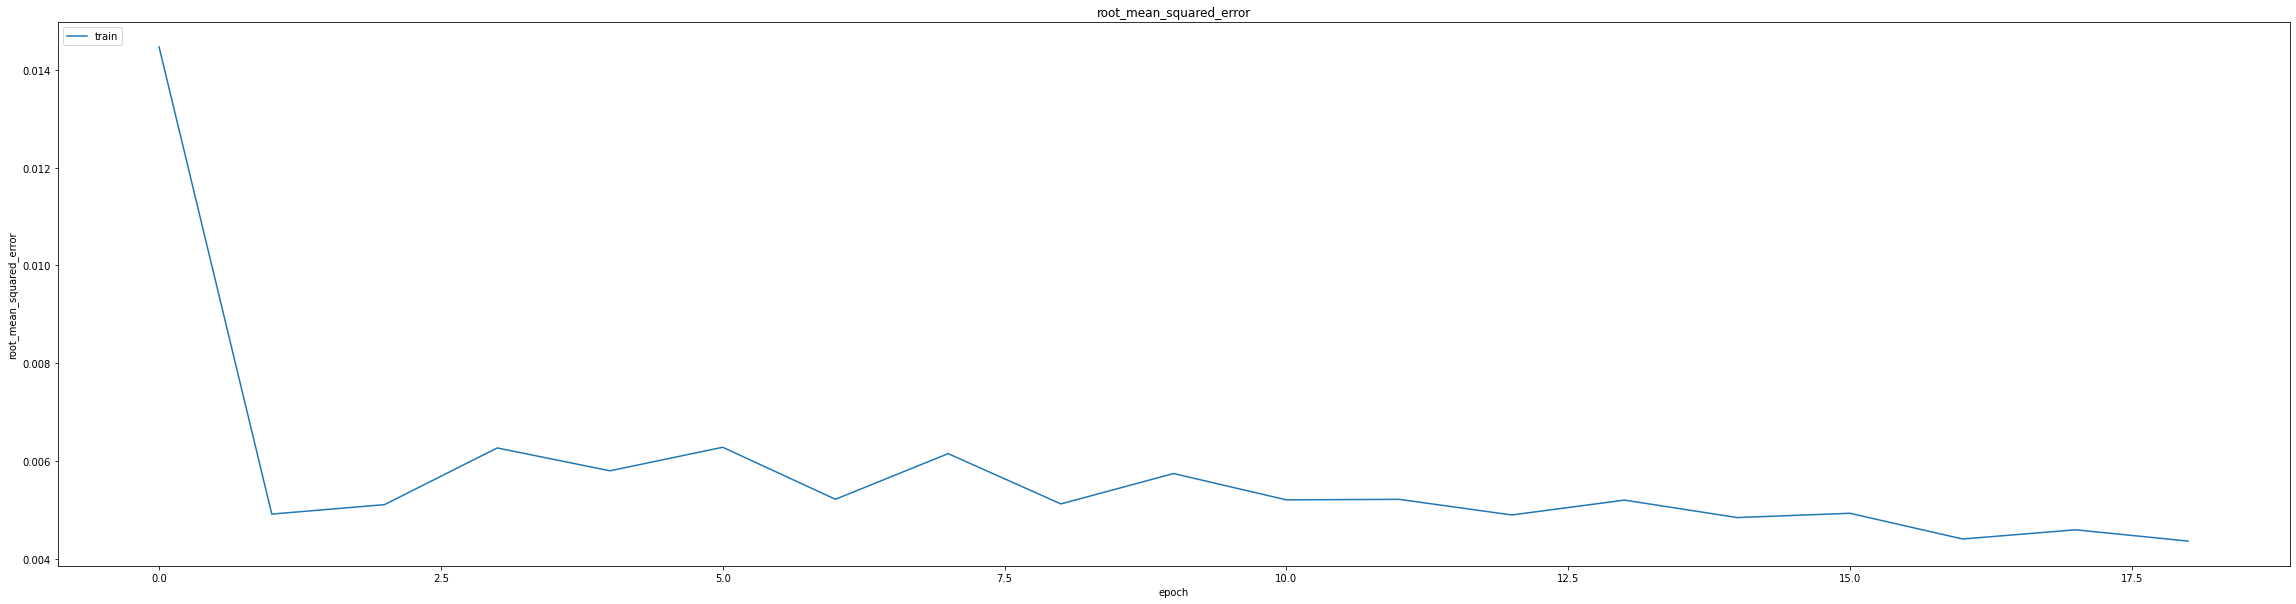

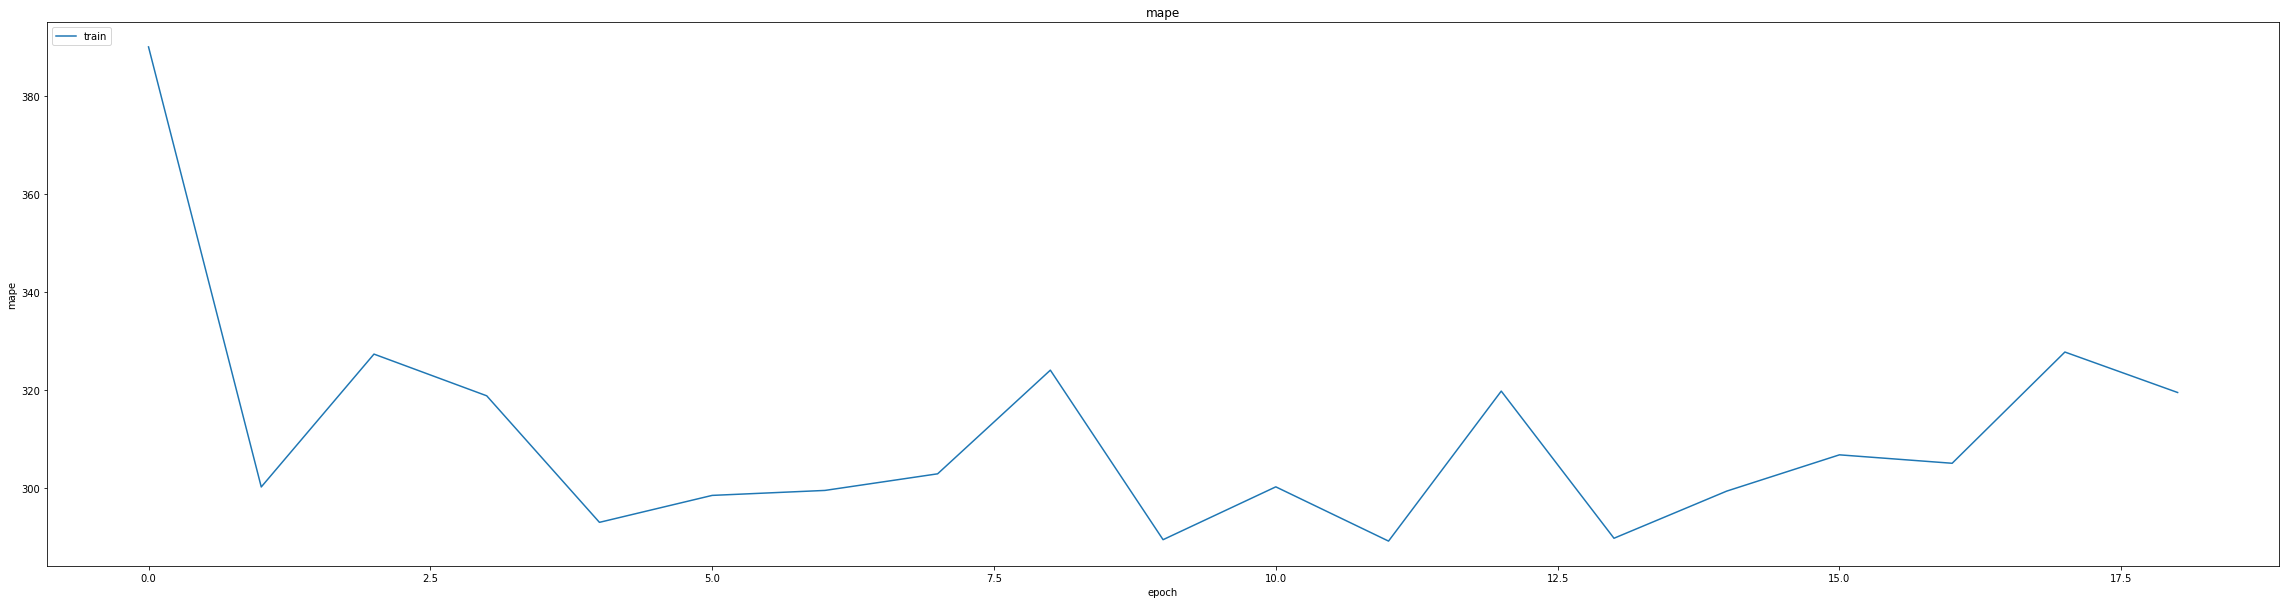

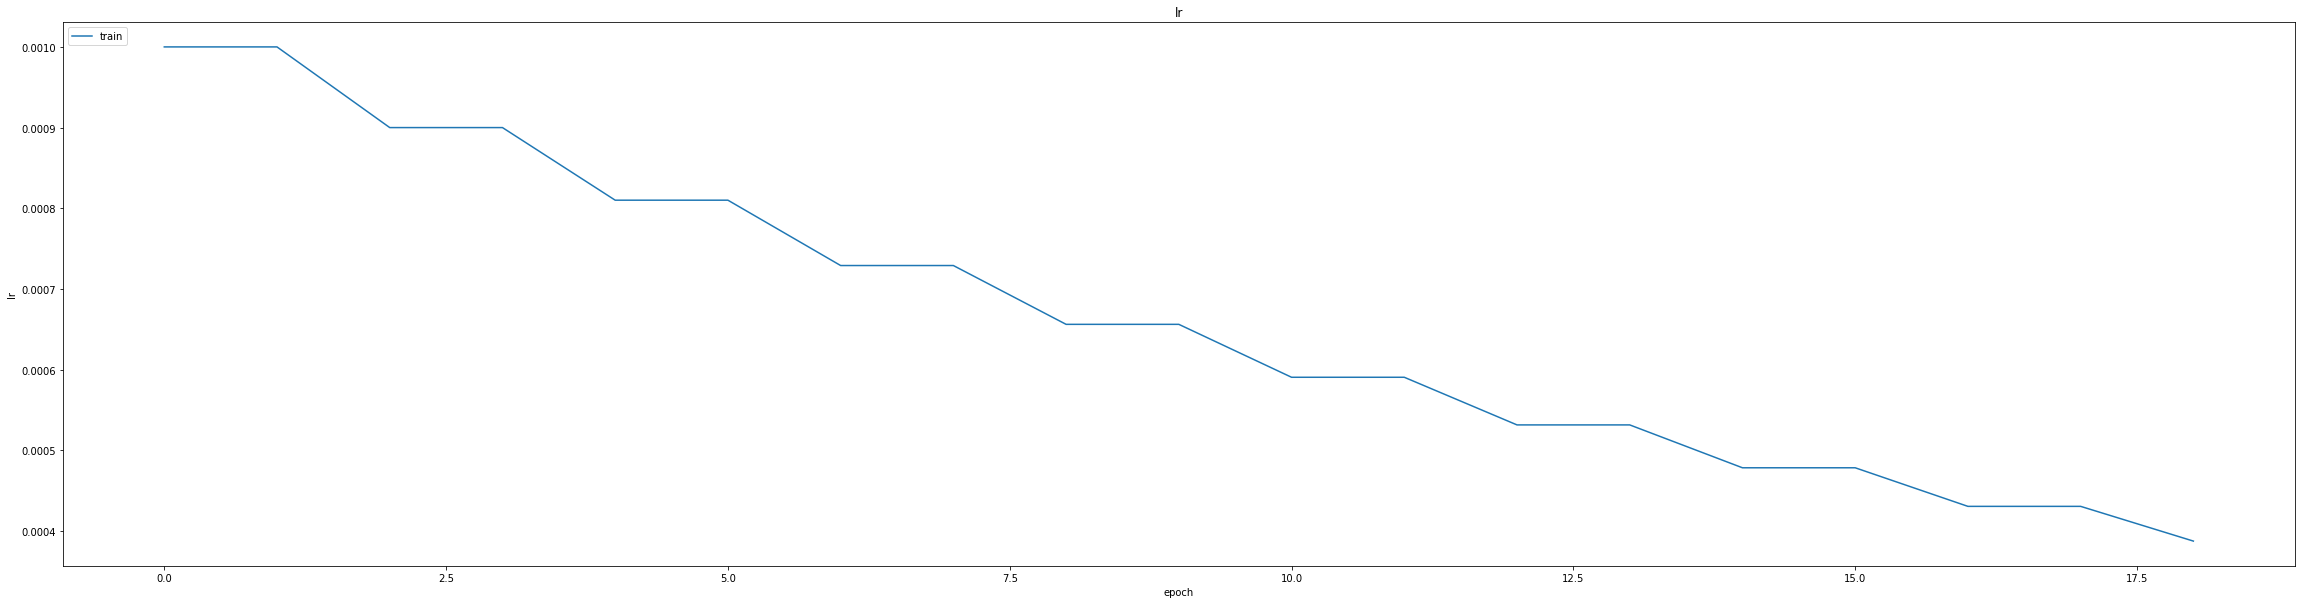

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.018367493525147438
0.02278970554471016
234/234 [==============================] - 6s 27ms/step
0.986324545688581


234/234 [==============================] - 6s 26ms/step


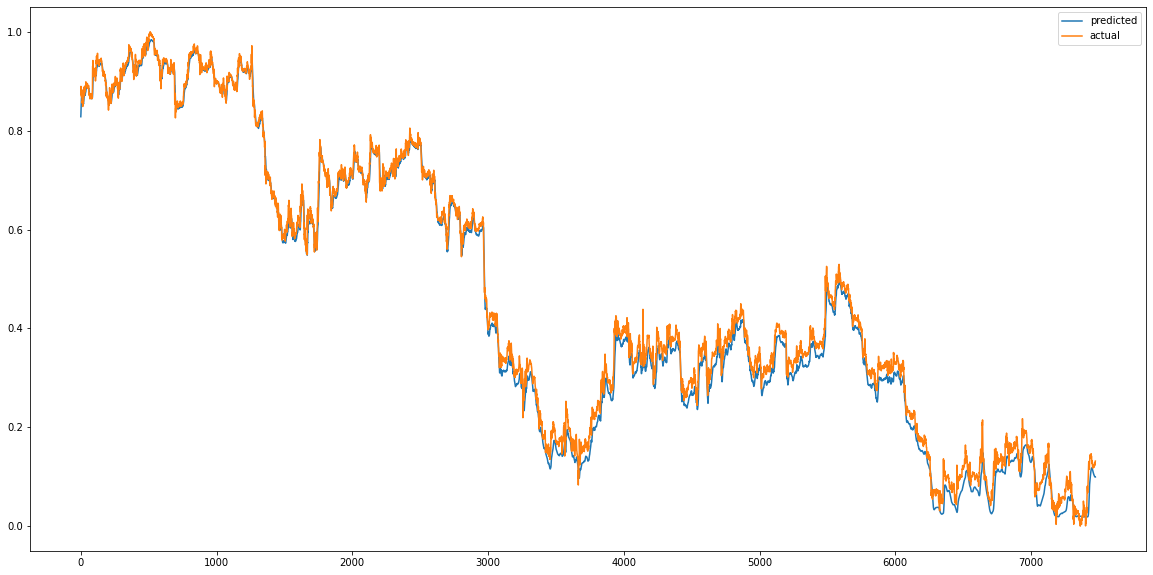

In [ ]:
model.load_weights("weights.best.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


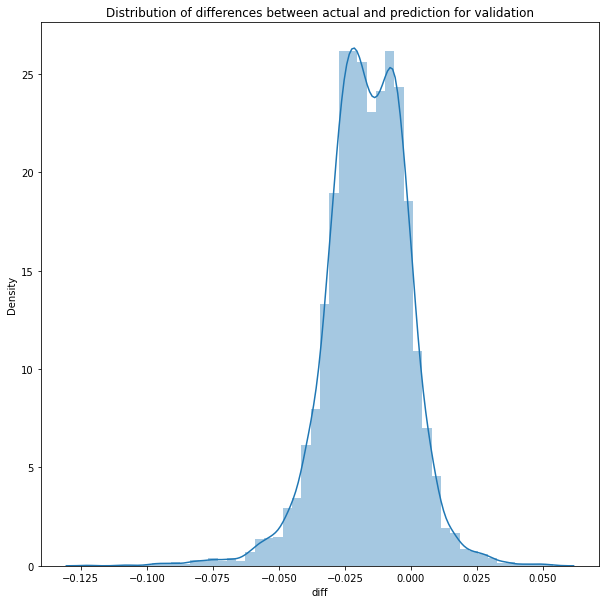

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

230/230 [==============================] - 7s 29ms/step


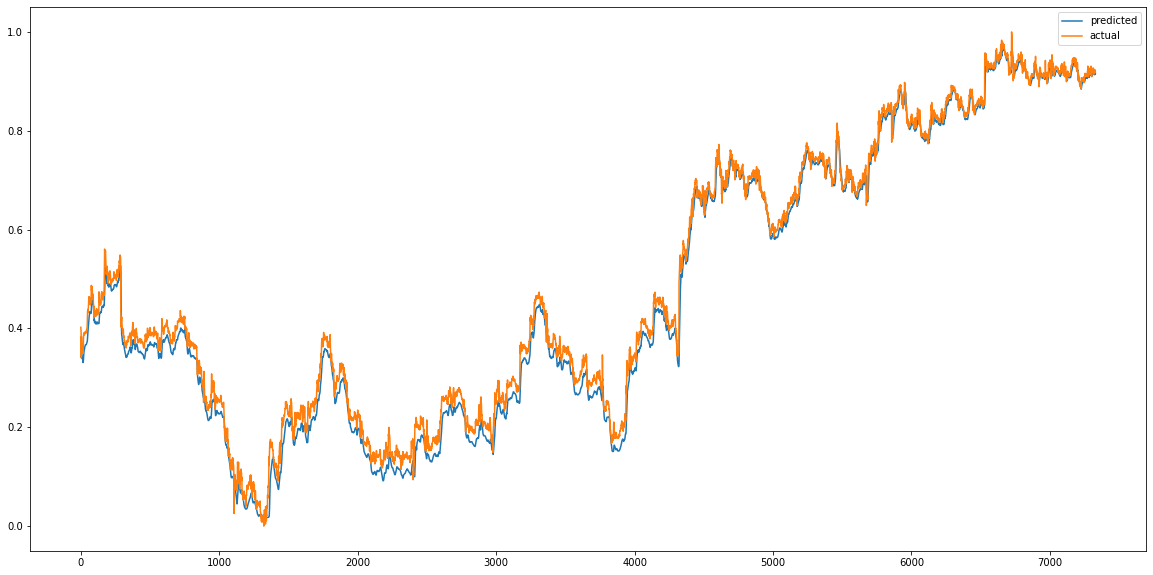

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


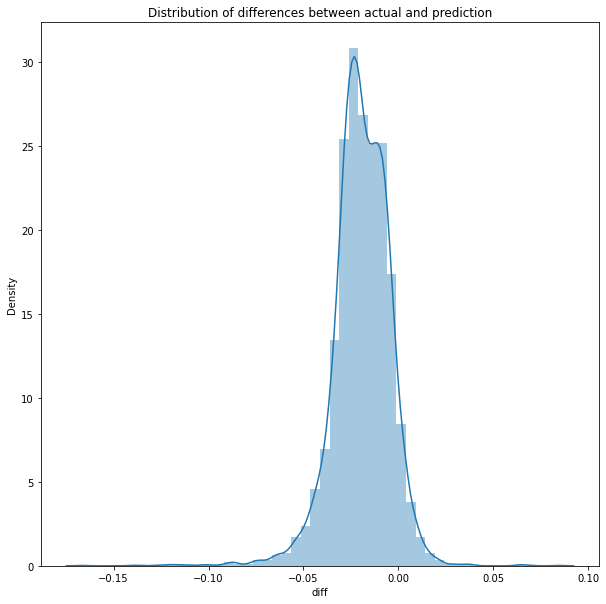

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.000603908697638762
MAE :  0.0203389266696702
RMSE  : 0.024574553864490846
230/230 [==============================] - 6s 25ms/step
R2_Score  : 0.9919712852855914


count    7329.000000
mean       -0.019382
std         0.015109
min        -0.167298
25%        -0.027548
50%        -0.019376
75%        -0.009465
max         0.084648
Name: diff, dtype: float64

In [ ]:
model= thesis.CNN_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 256)          197632    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
464/464 [==============================] - ETA: 0s - loss: 241.8007 - mae: 2.1454 - mse: 241.8007 - root_mean_squared_error: 15.5499 - mape: 4349.3975
Epoch 1: val_mse improved from inf to 0.14486, saving model to weights.best.hdf5
464/464 [==============================] - 153s 302ms/step - loss: 241.8007 - mae: 2.1454 - mse: 241.8007 - root_mean_squared_error: 15.5499 - mape: 4349.3975 - val_loss: 0.1449 - val_mae: 0.2973 - val_mse: 0.1449 - val_root_mean_squared_error: 0.3806 - val_mape: 30356.6348
Epoch 2/75
464/464 [==============================] - ETA: 0s - loss: 0.1002 - mae: 0.2452 - mse: 0.1002 - root_mean_squared_error: 0.3166 - mape: 2377.6619
Epoch 2: val_mse improved from 0.14486 to 0.02020, saving model to weights.best.hdf5
464/464 [==============================] - 140s 301ms/step - loss: 0.1002 - mae: 0.2452 - mse: 0.1002 - root_mean_squared_error: 0.3166 - mape: 2377.6619 - val_loss: 0.0202 - val_mae: 0.1063 - val_mse: 0.0202 - val_root_mean_squared_error: 

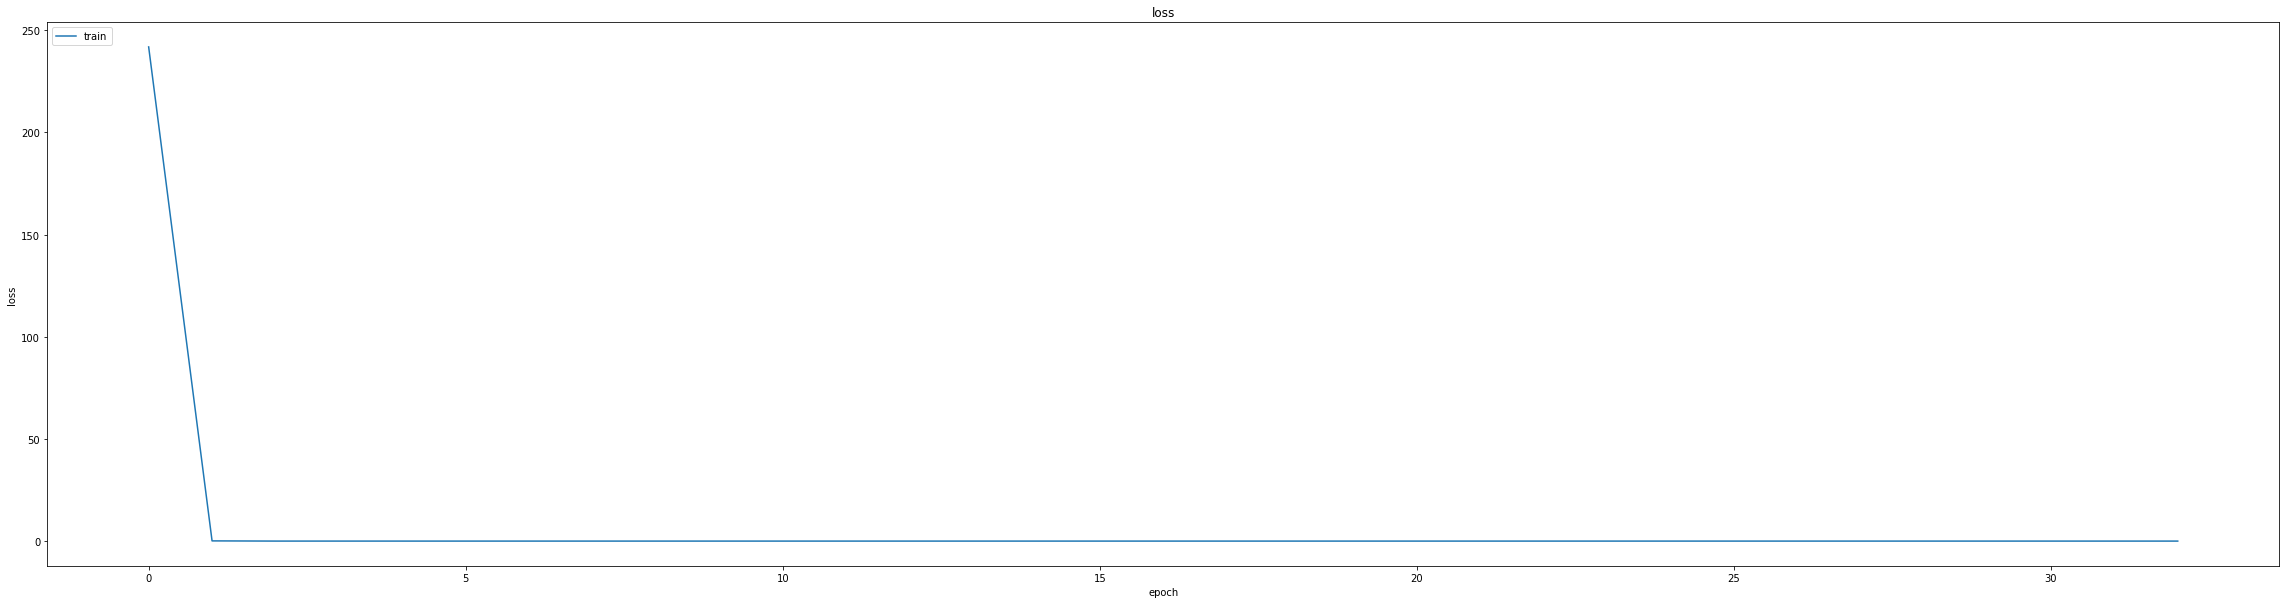

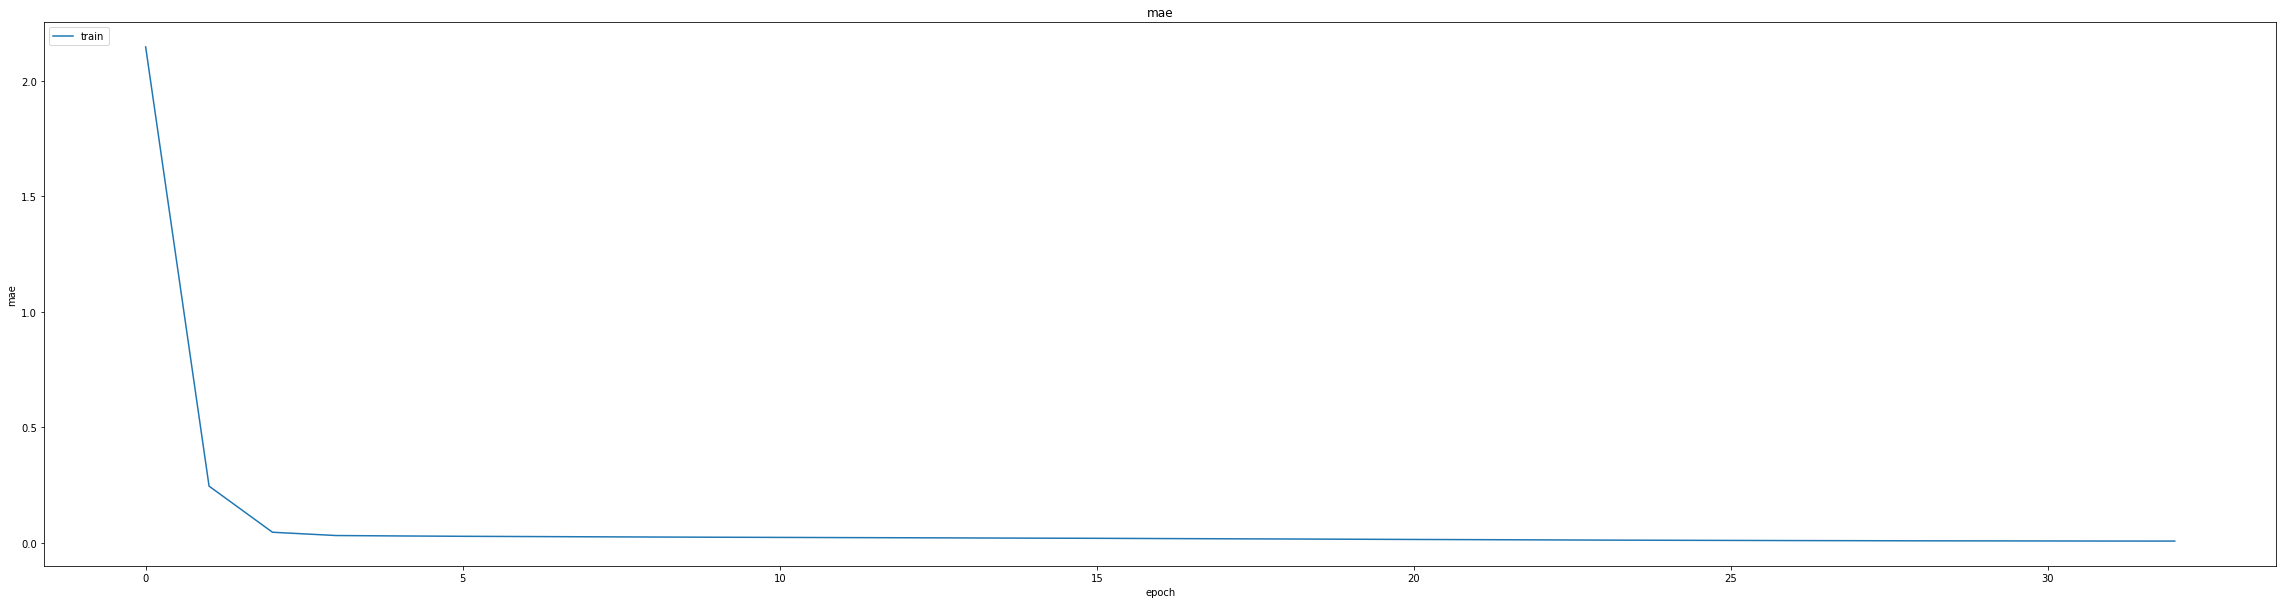

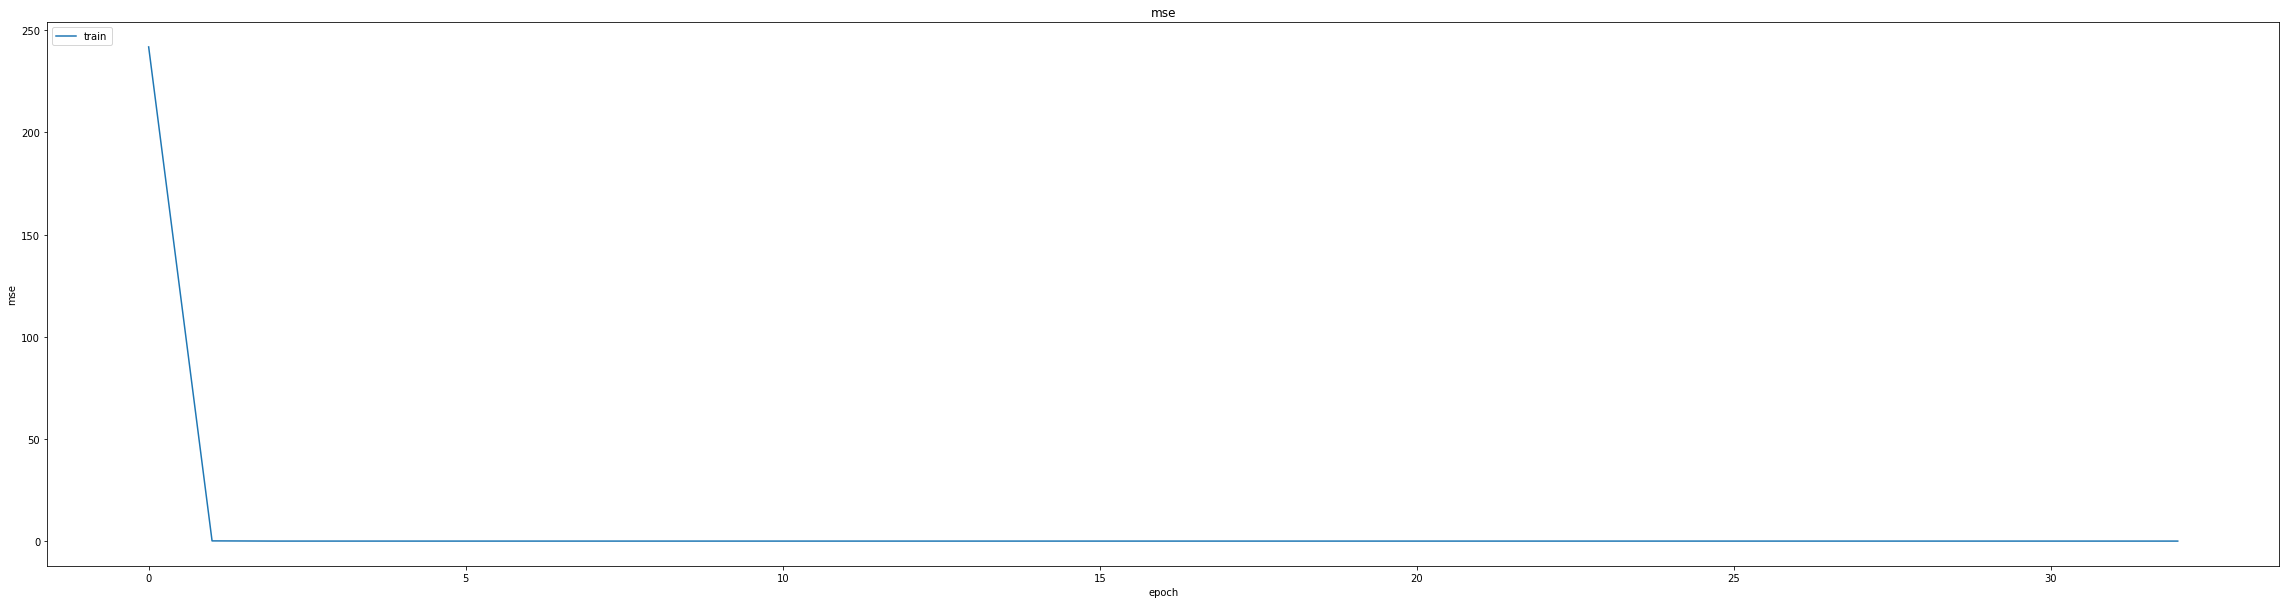

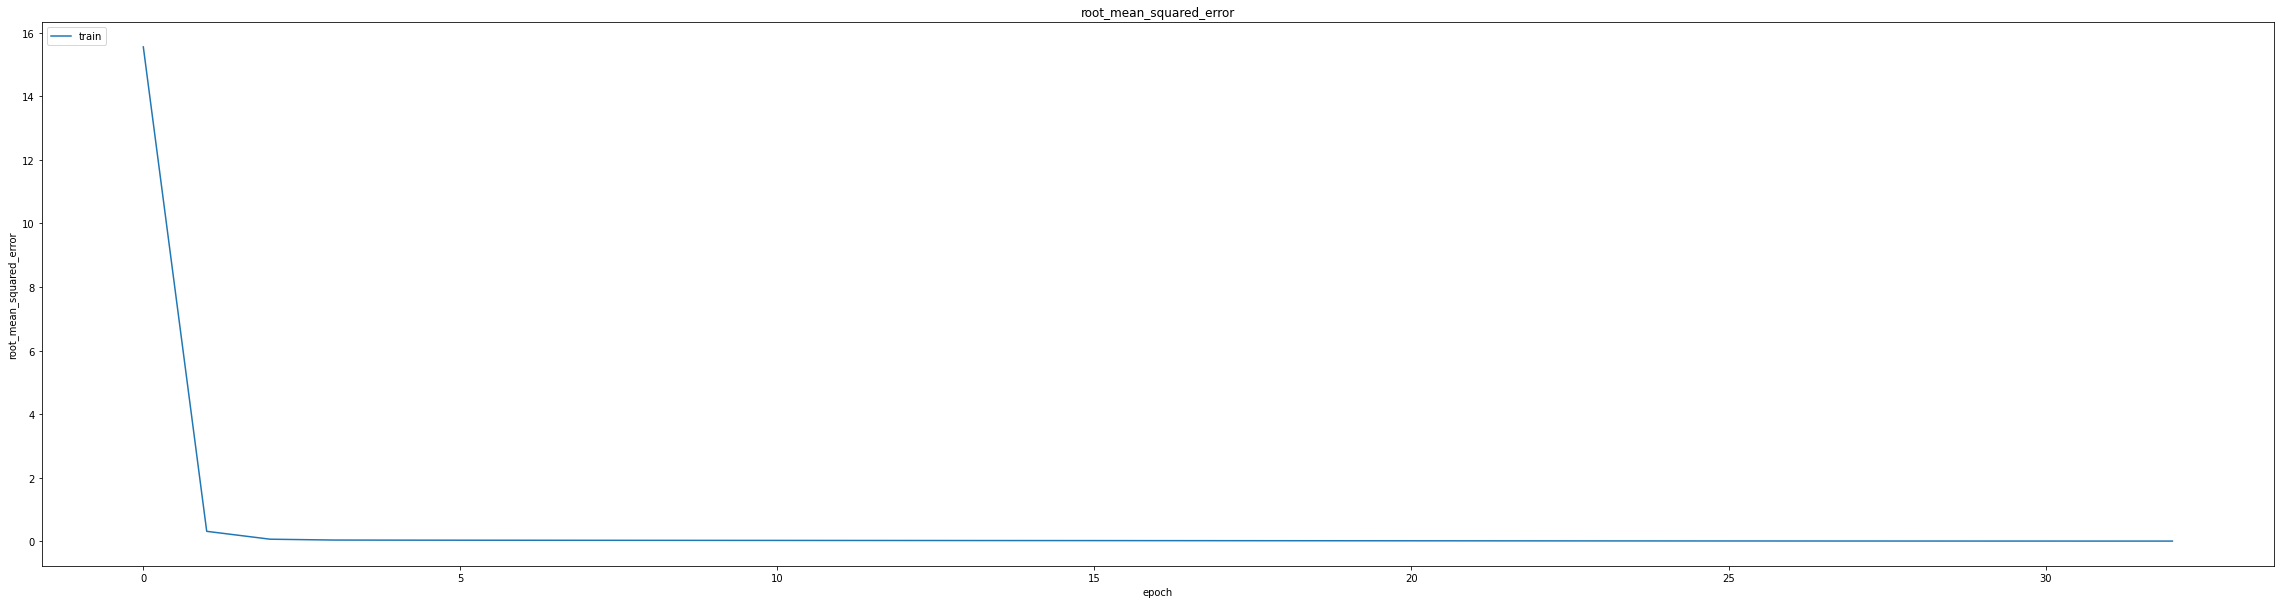

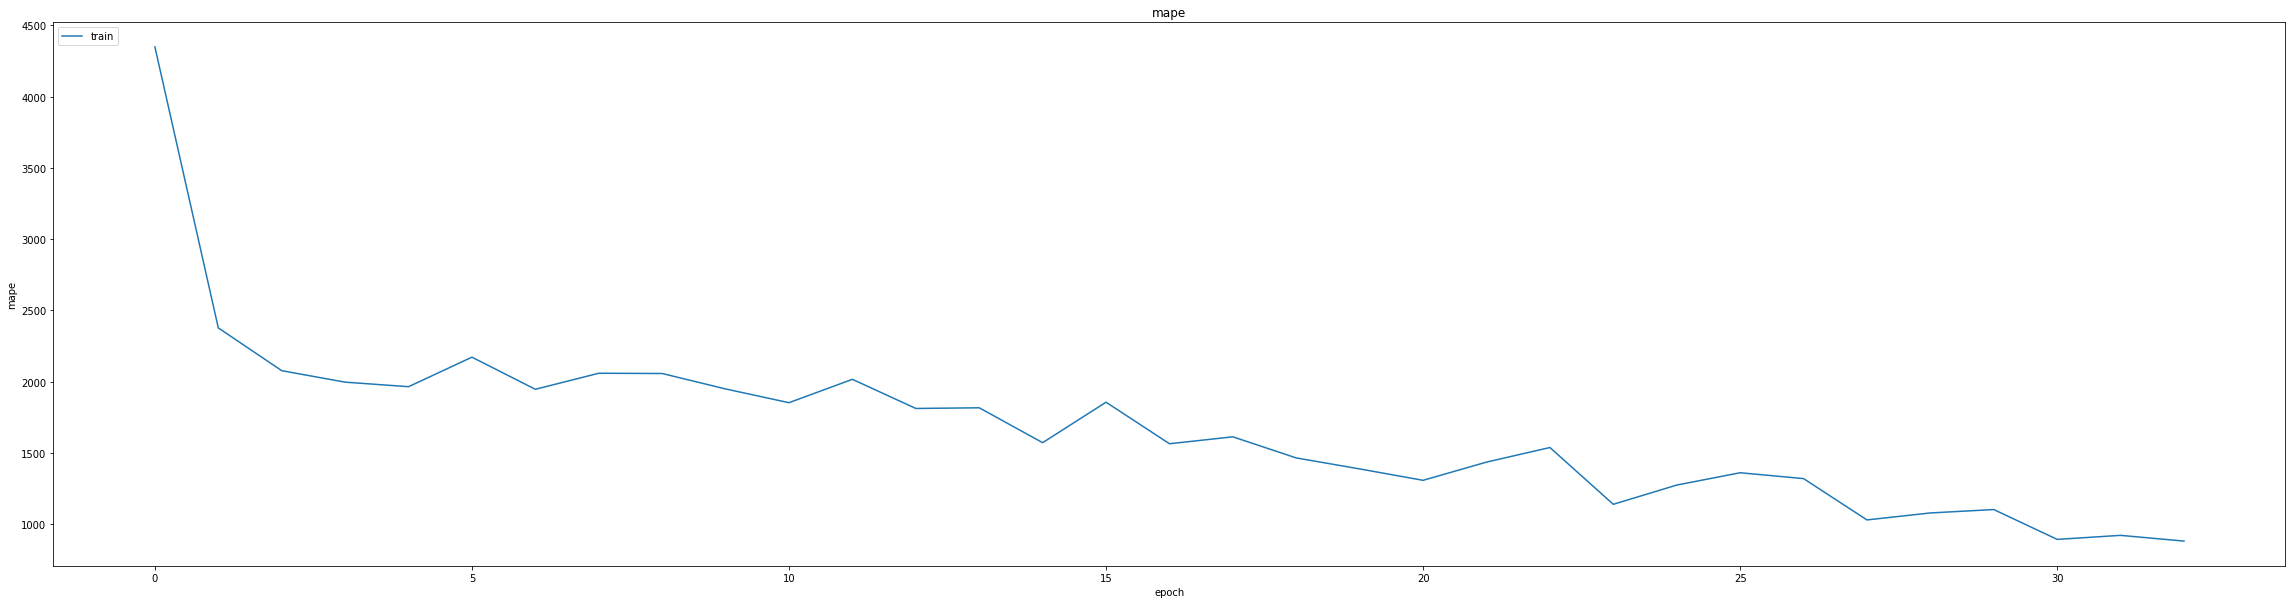

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.07839639484882355
0.08574667572975159
234/234 [==============================] - 11s 38ms/step
0.8916925746448096


In [ ]:
model.load_weights("weights.best.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
464/464 [==============================] - ETA: 0s - loss: 0.0057 - mae: 0.0359 - mse: 0.0057 - root_mean_squared_error: 0.0757 - mape: 1252.1824
Epoch 1: val_mse did not improve from 0.00735
464/464 [==============================] - 147s 299ms/step - loss: 0.0057 - mae: 0.0359 - mse: 0.0057 - root_mean_squared_error: 0.0757 - mape: 1252.1824 - val_loss: 0.0087 - val_mae: 0.0858 - val_mse: 0.0087 - val_root_mean_squared_error: 0.0931 - val_mape: 7653.6831 - lr: 0.0010
Epoch 2/25
464/464 [==============================] - ETA: 0s - loss: 2.1761e-04 - mae: 0.0114 - mse: 2.1761e-04 - root_mean_squared_error: 0.0148 - mape: 679.9725
Epoch 2: val_mse improved from 0.00735 to 0.00650, saving model to weights.best.hdf5
464/464 [==============================] - 141s 304ms/step - loss: 2.1761e-04 - mae: 0.0114 - mse: 2.1761e-04 - root_mean_squared_error: 0.0148 - mape: 679.9725 - val_loss: 0.0065 - val_mae: 0.0760 - val_mse: 0.0065 - val_root_mean_squared_error: 0.0806 - val_mape: 

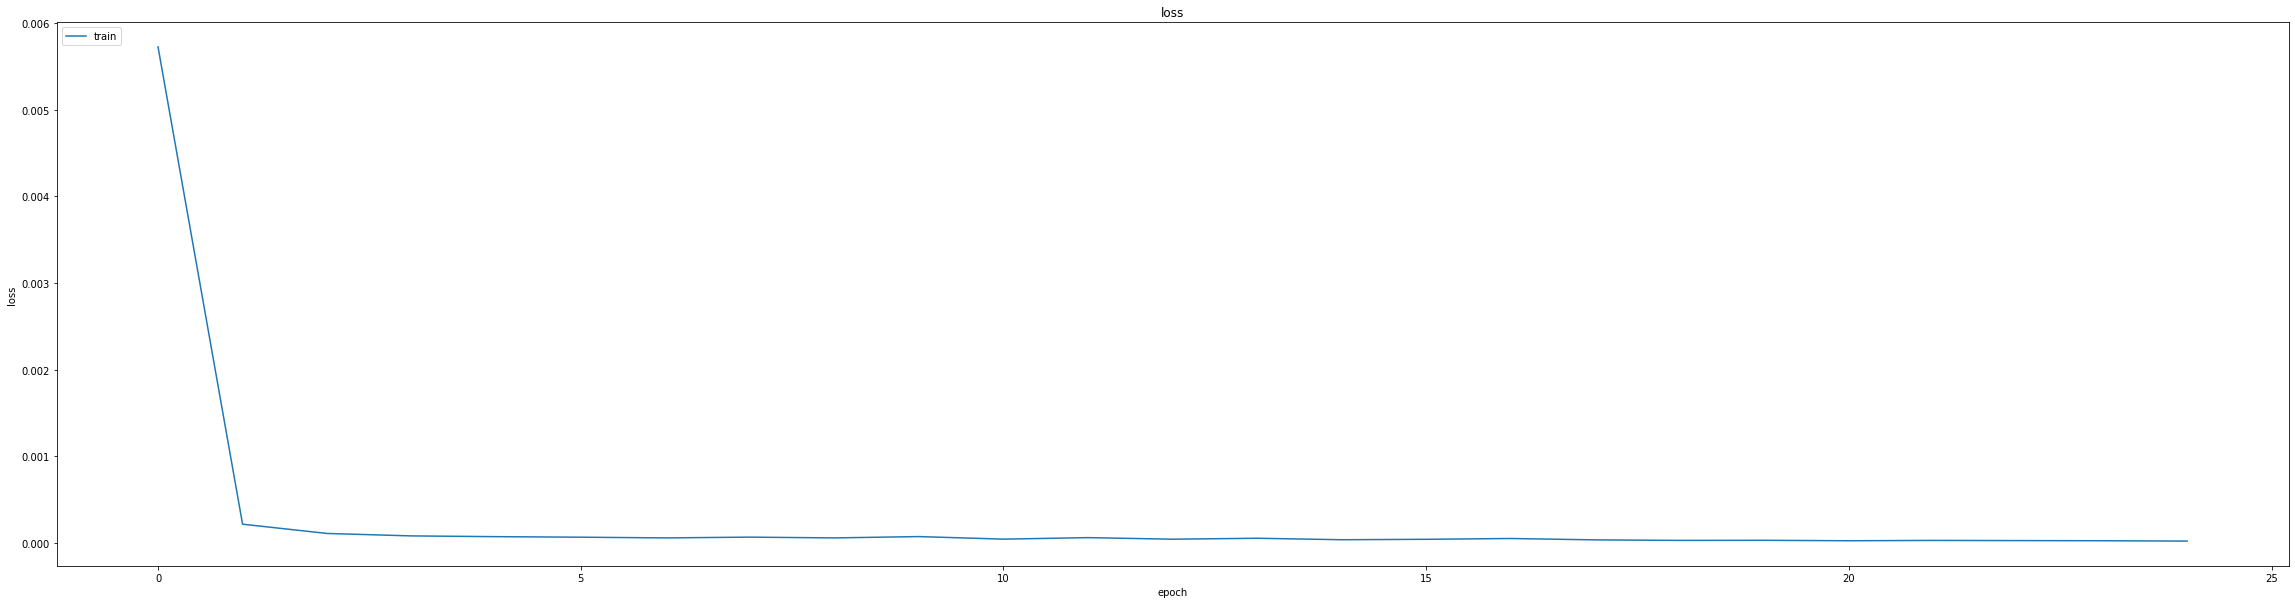

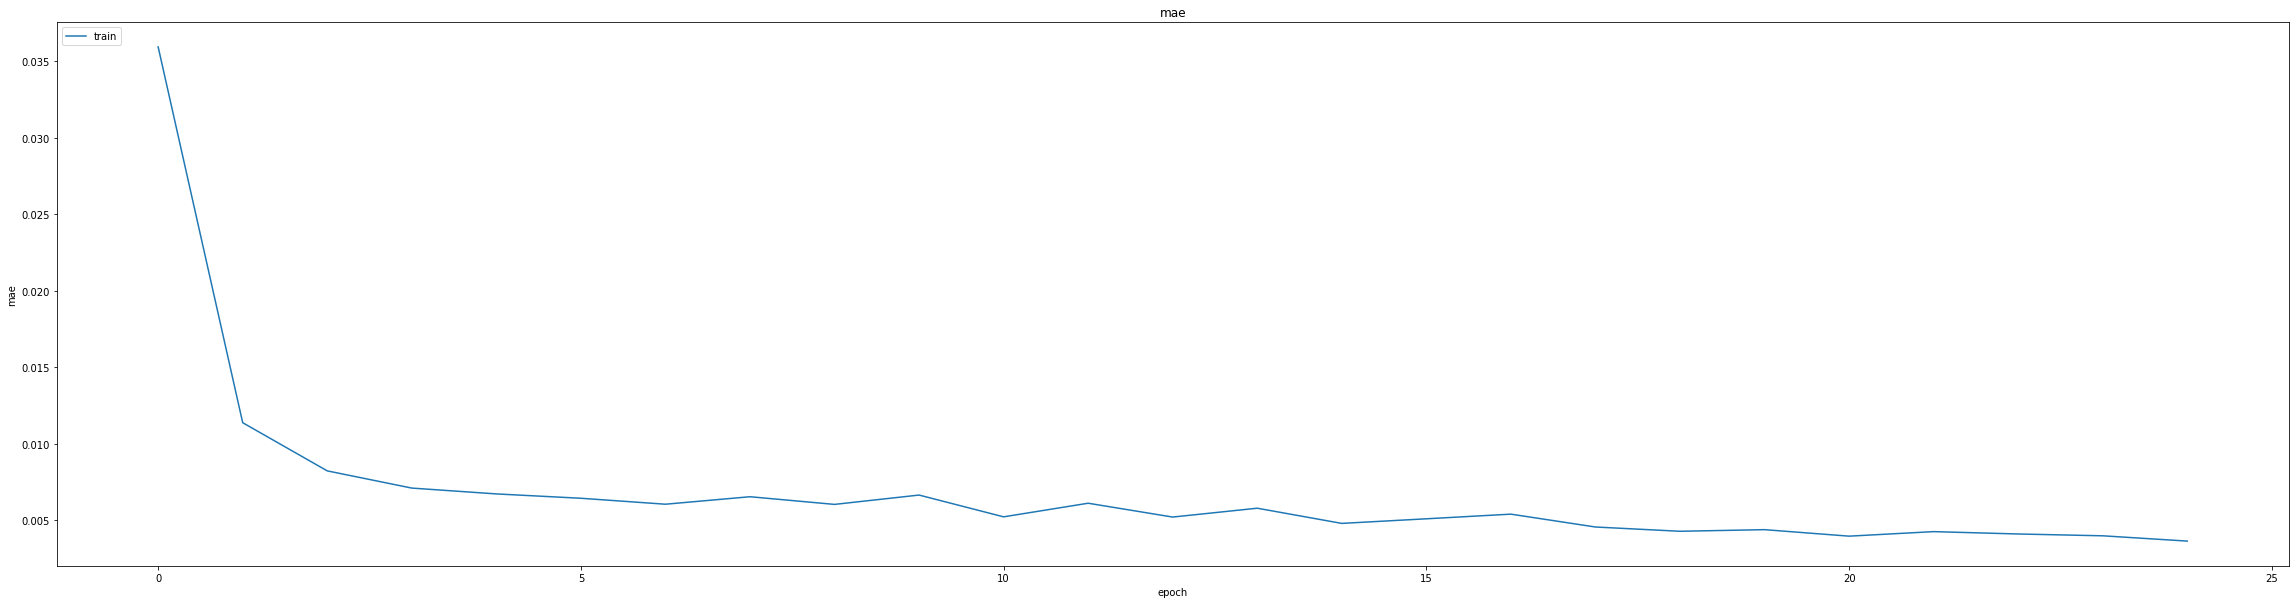

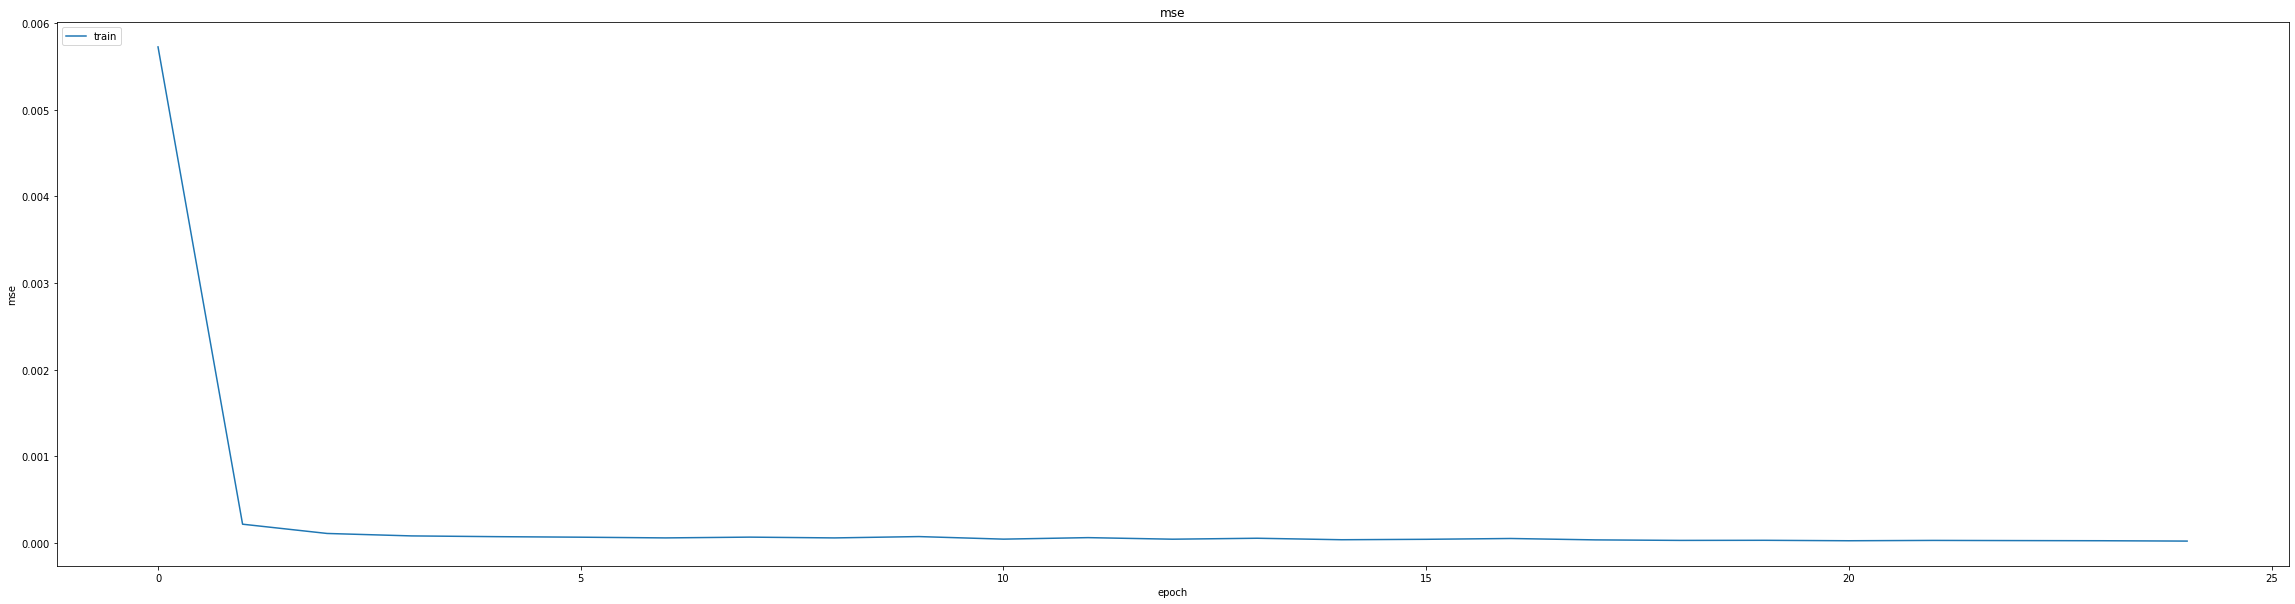

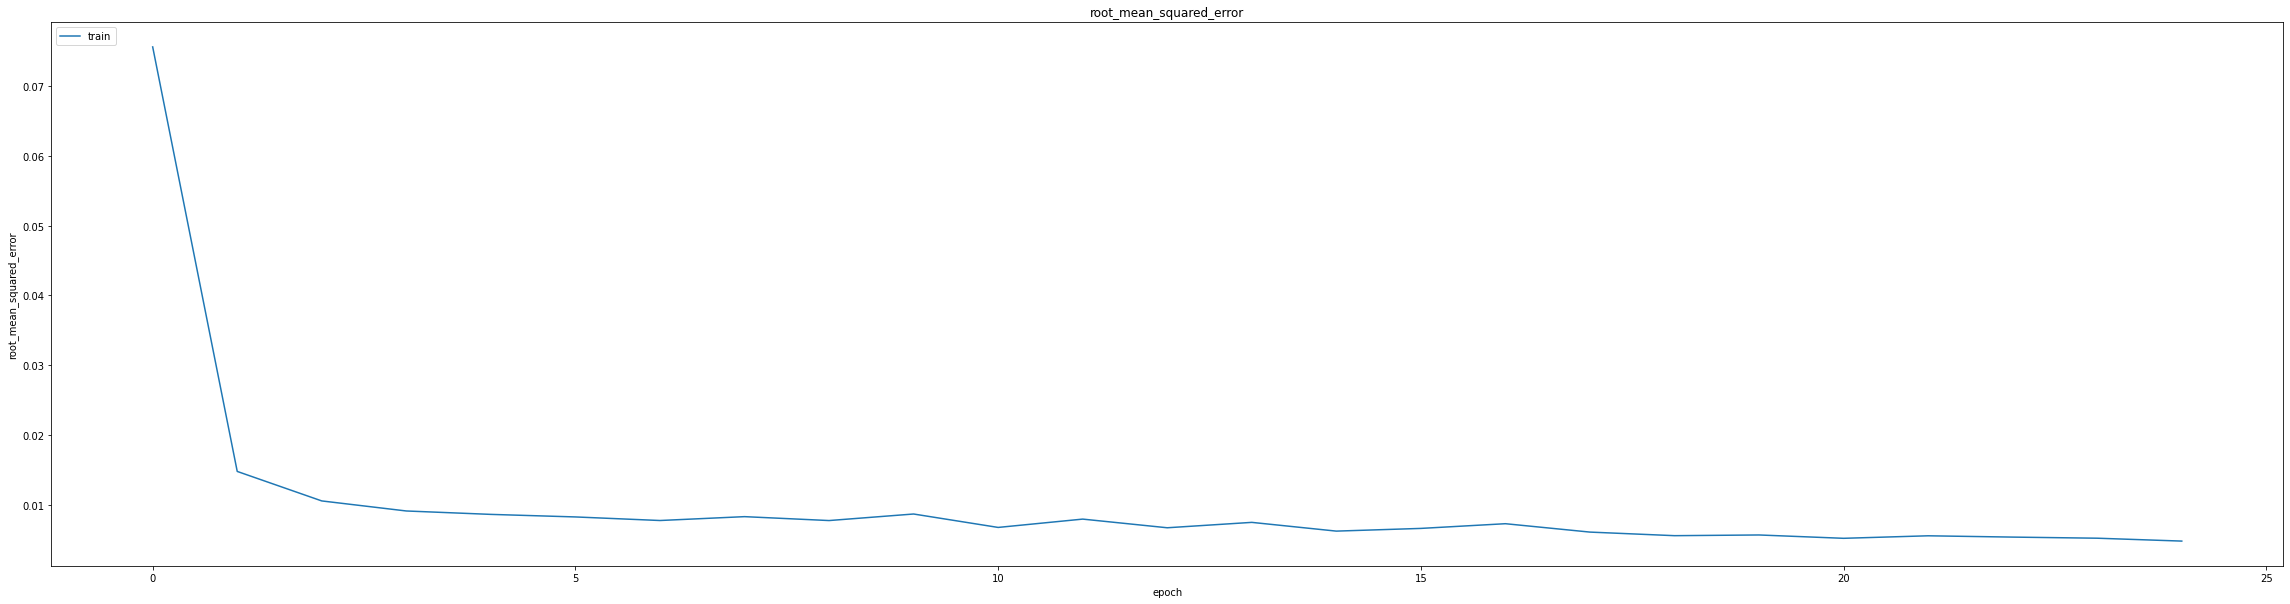

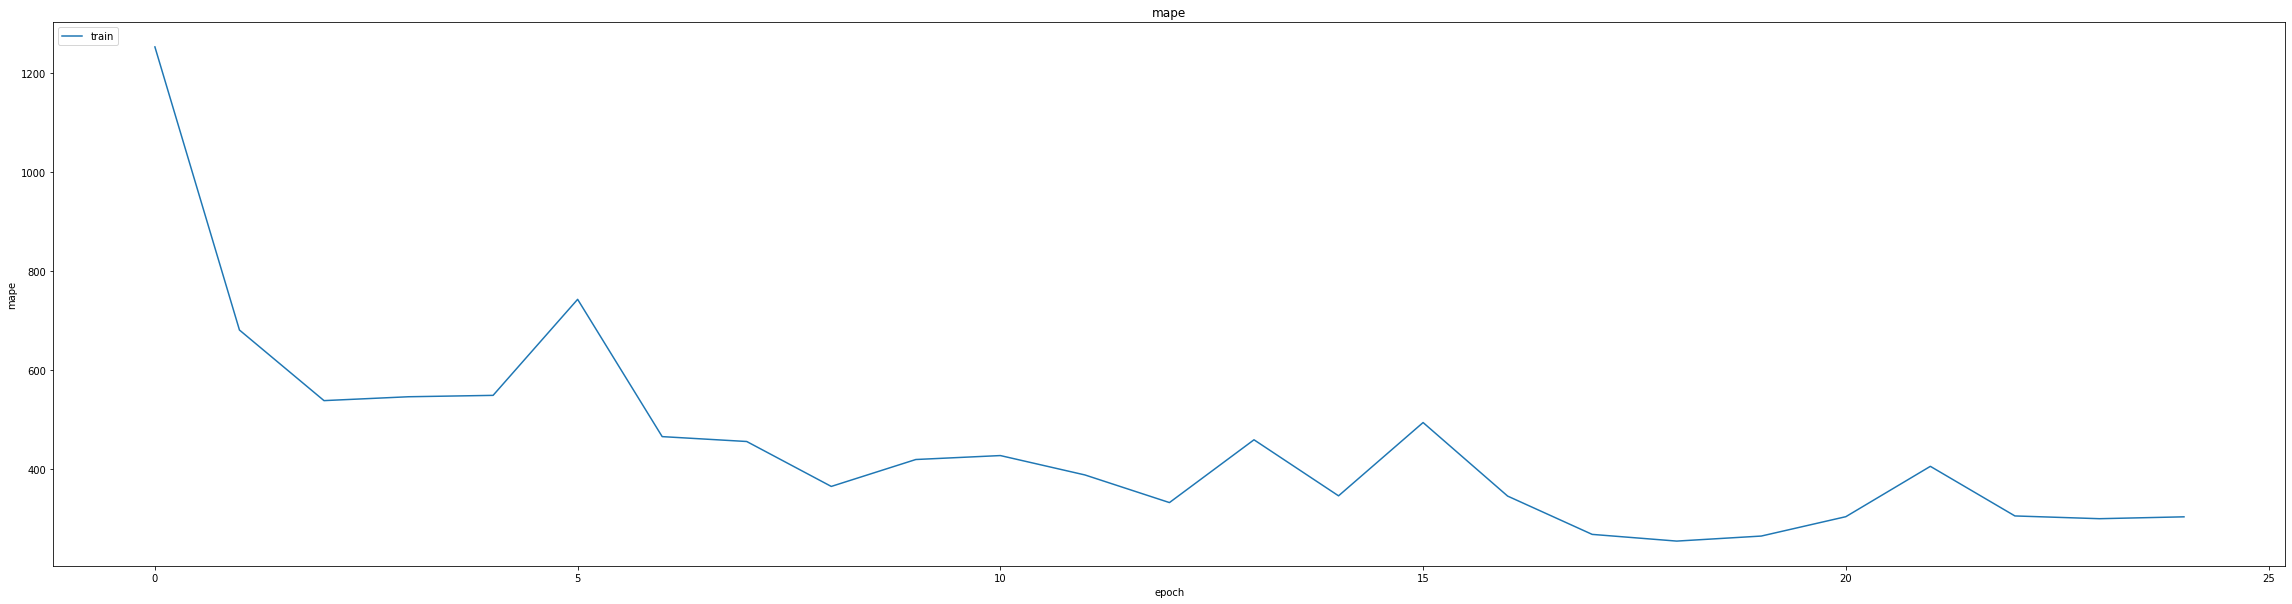

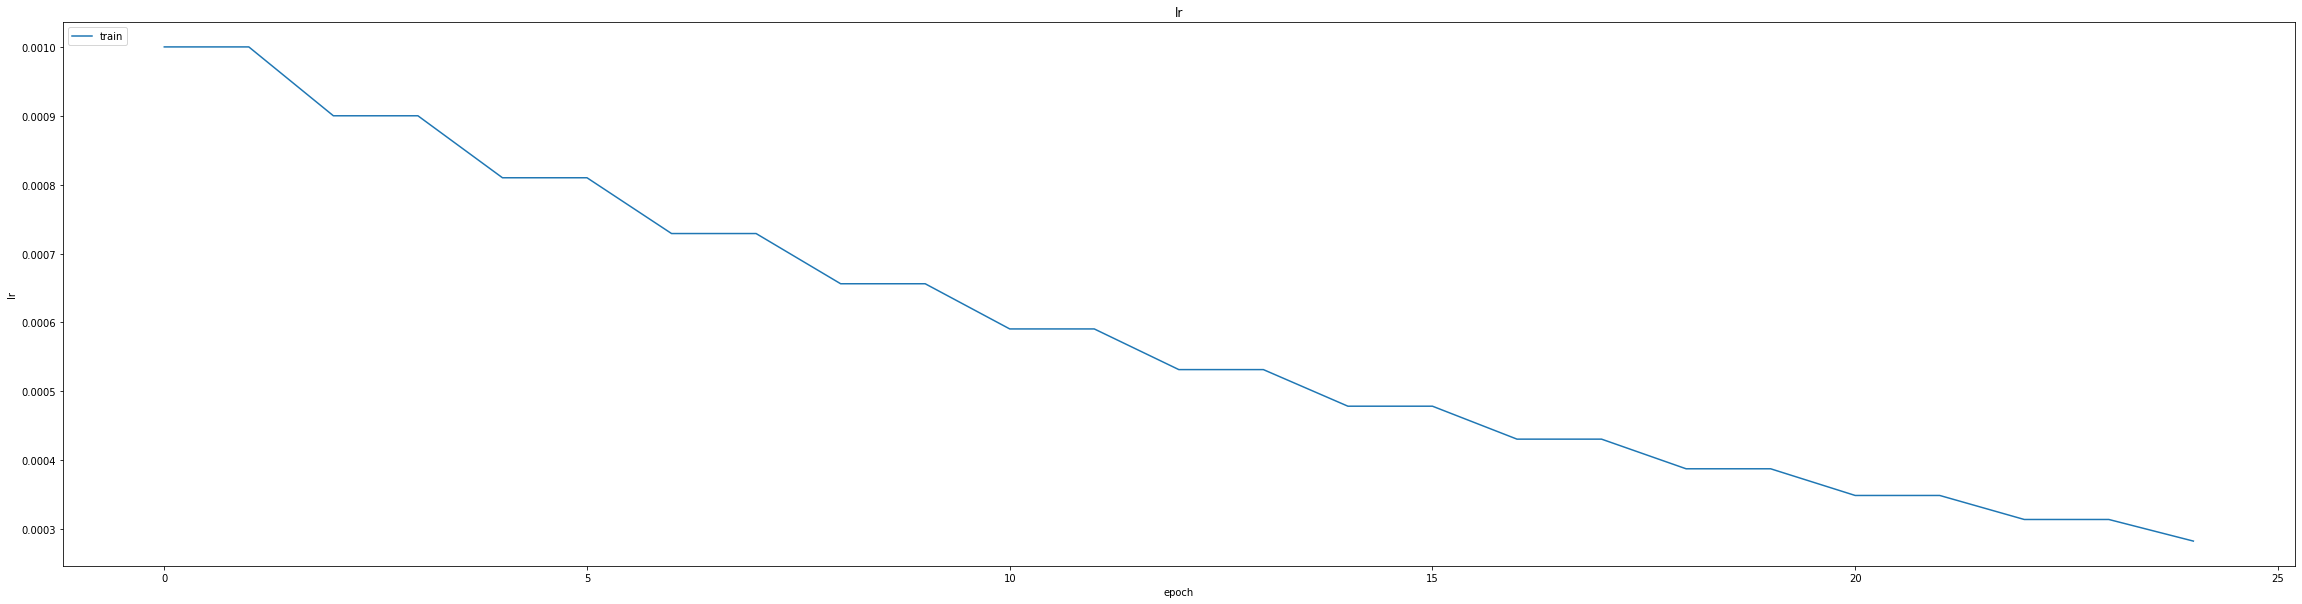

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.07160954922437668
0.07381142675876617
234/234 [==============================] - 10s 37ms/step
0.9208449318497919


234/234 [==============================] - 9s 38ms/step


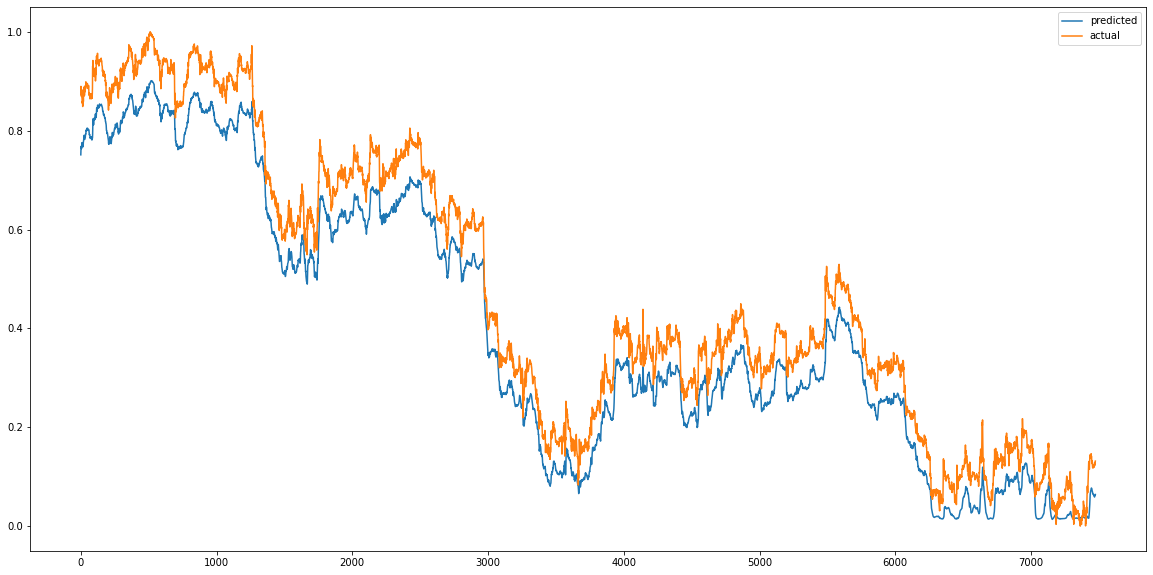

In [ ]:
model.load_weights("weights.best.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


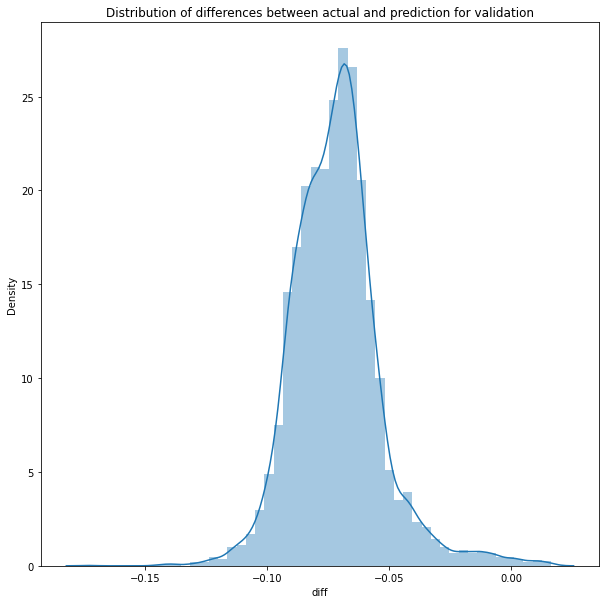

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

230/230 [==============================] - 9s 38ms/step


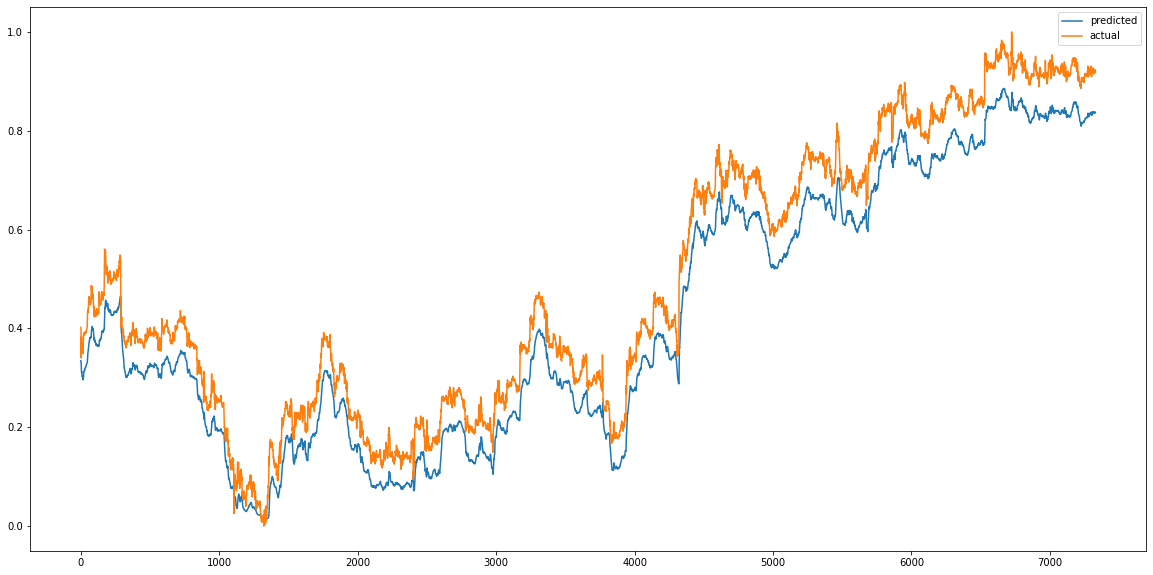

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


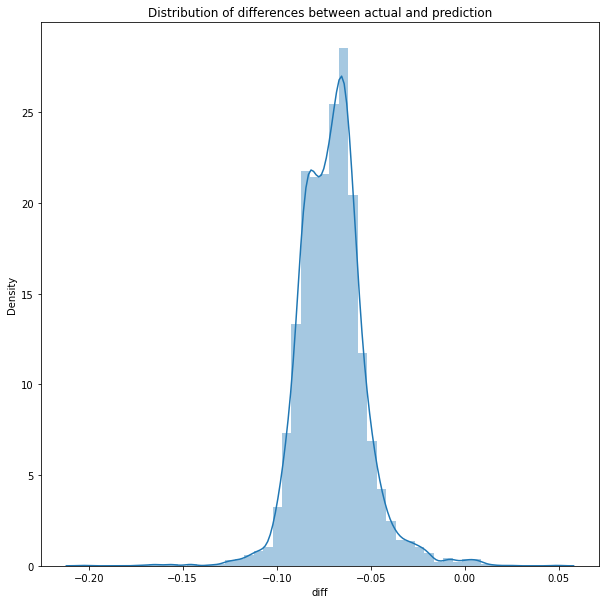

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.005275971994370695
MAE :  0.07061764505332335
RMSE  : 0.07263588640865268
230/230 [==============================] - 9s 38ms/step
R2_Score  : 0.9298581487978974


count    7329.000000
mean       -0.070555
std         0.017262
min        -0.203144
25%        -0.081949
50%        -0.070553
75%        -0.061333
max         0.049159
Name: diff, dtype: float64

In [ ]:
model= thesis.CNN_GRU_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 gru (GRU)                   (None, 24, 256)           247296    
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 gru_1 (GRU)                 (None, 64)                61824     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
464/464 [==============================] - ETA: 0s - loss: 112.7693 - mae: 1.4746 - mse: 112.7693 - root_mean_squared_error: 10.6193 - mape: 449.9821
Epoch 1: val_mse improved from inf to 0.29819, saving model to weights.best.hdf5
464/464 [==============================] - 133s 276ms/step - loss: 112.7693 - mae: 1.4746 - mse: 112.7693 - root_mean_squared_error: 10.6193 - mape: 449.9821 - val_loss: 0.2982 - val_mae: 0.4657 - val_mse: 0.2982 - val_root_mean_squared_error: 0.5461 - val_mape: 862.1766
Epoch 2/75
464/464 [==============================] - ETA: 0s - loss: 0.3906 - mae: 0.5799 - mse: 0.3906 - root_mean_squared_error: 0.6250 - mape: 244.5801
Epoch 2: val_mse improved from 0.29819 to 0.29590, saving model to weights.best.hdf5
464/464 [==============================] - 113s 244ms/step - loss: 0.3906 - mae: 0.5799 - mse: 0.3906 - root_mean_squared_error: 0.6250 - mape: 244.5801 - val_loss: 0.2959 - val_mae: 0.4633 - val_mse: 0.2959 - val_root_mean_squared_error: 0.5440

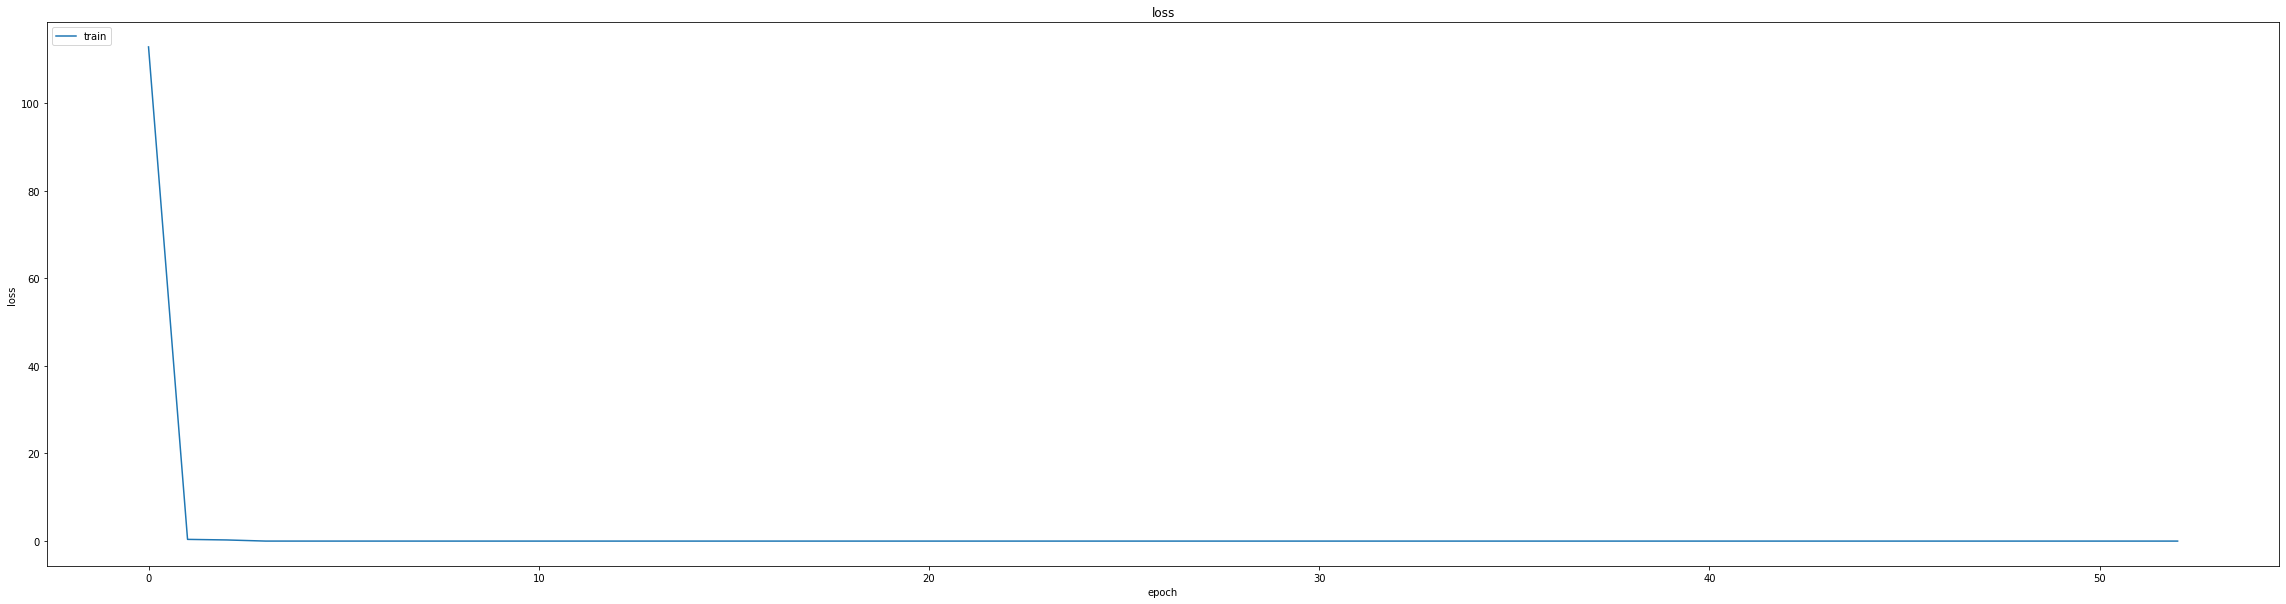

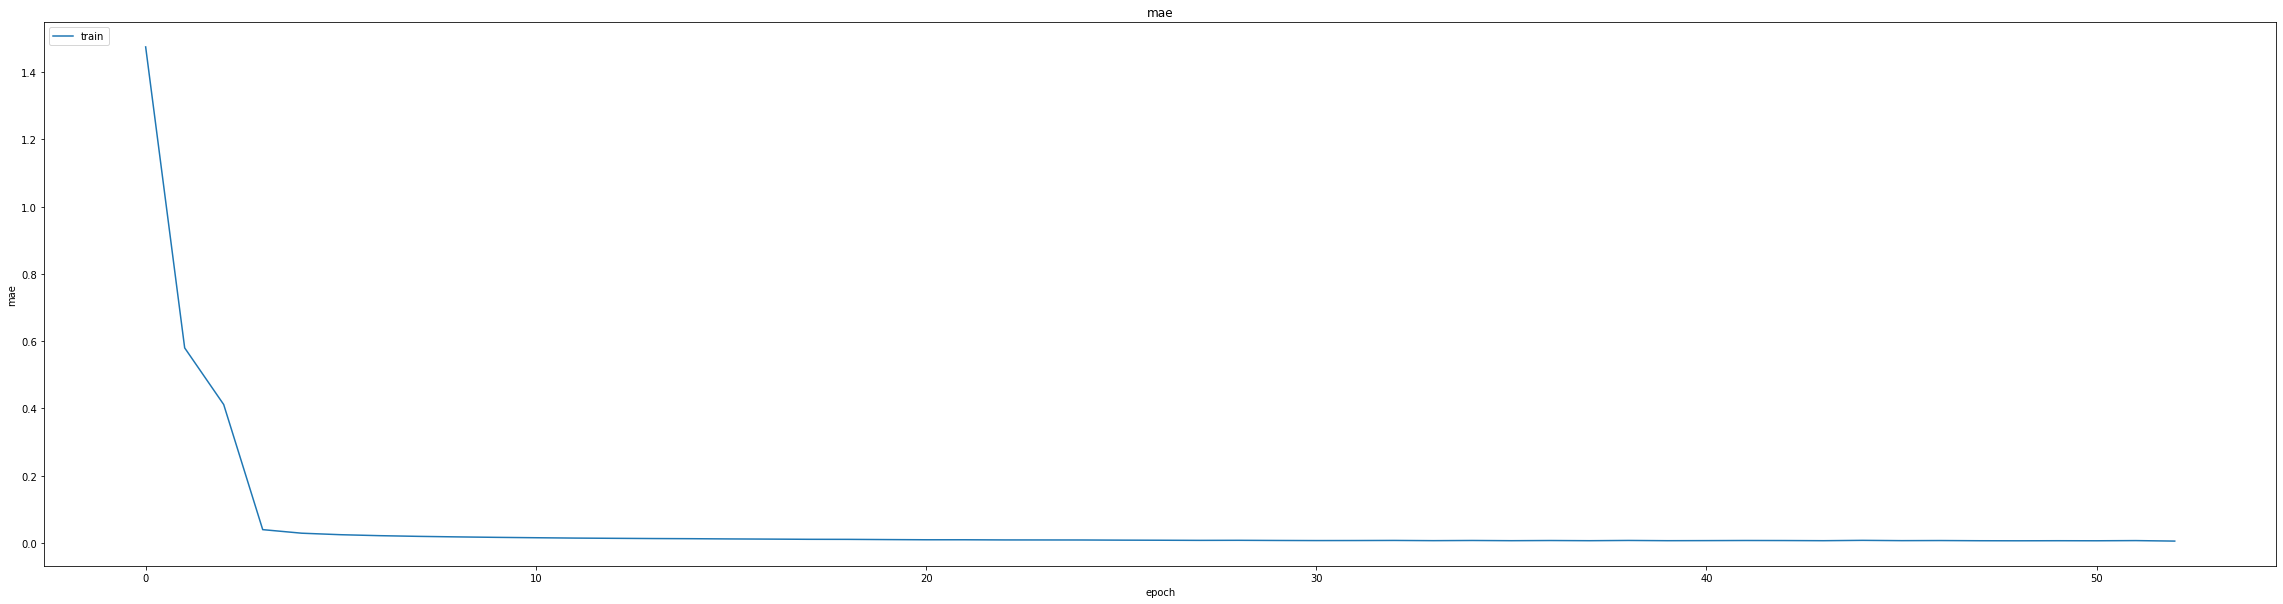

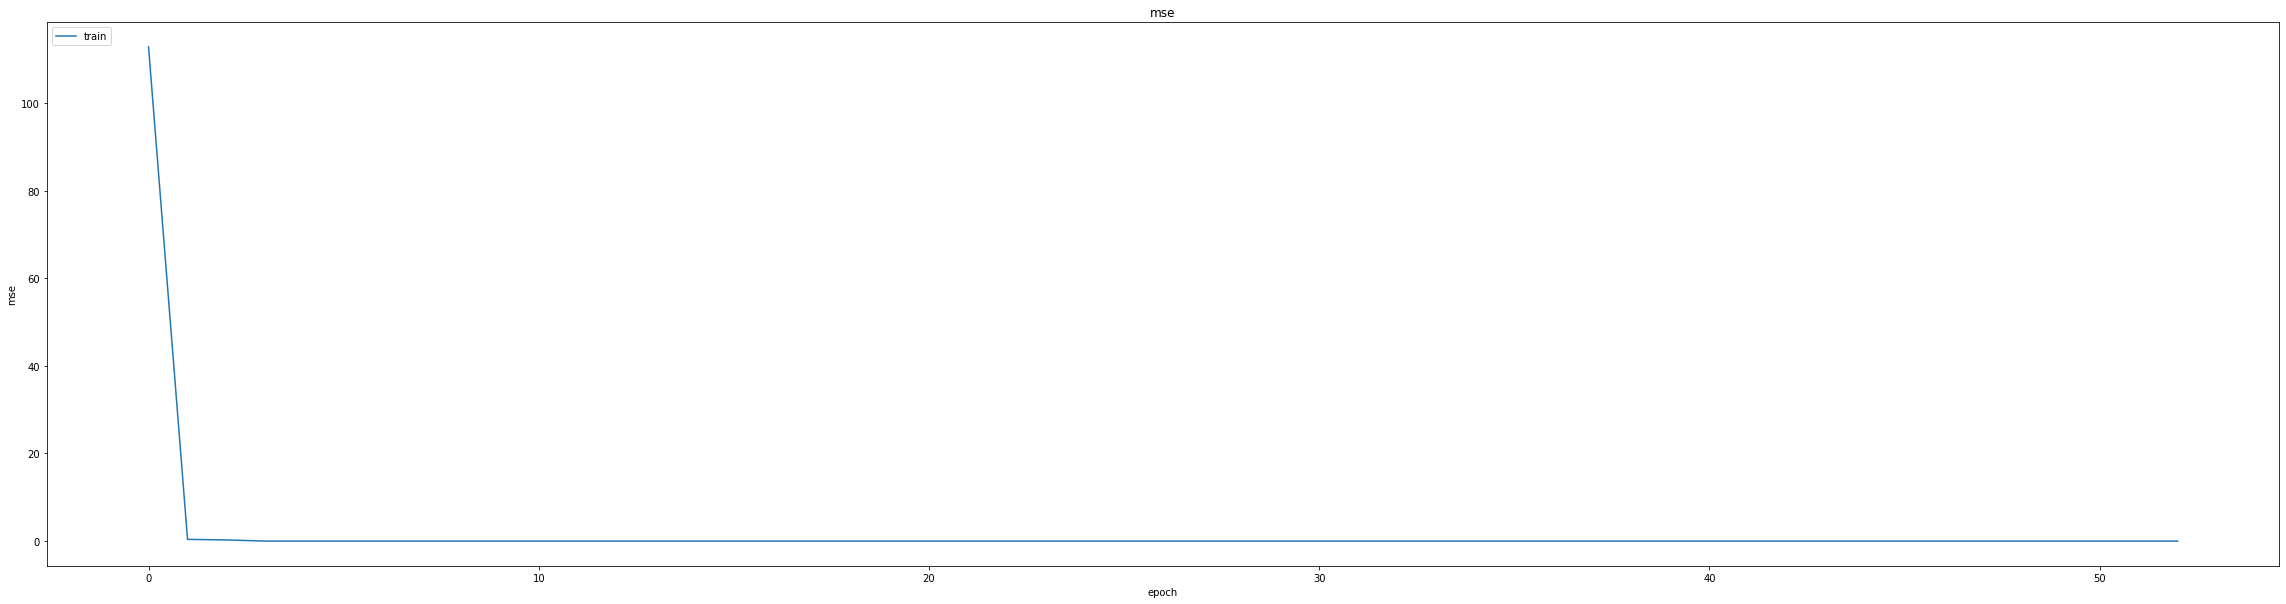

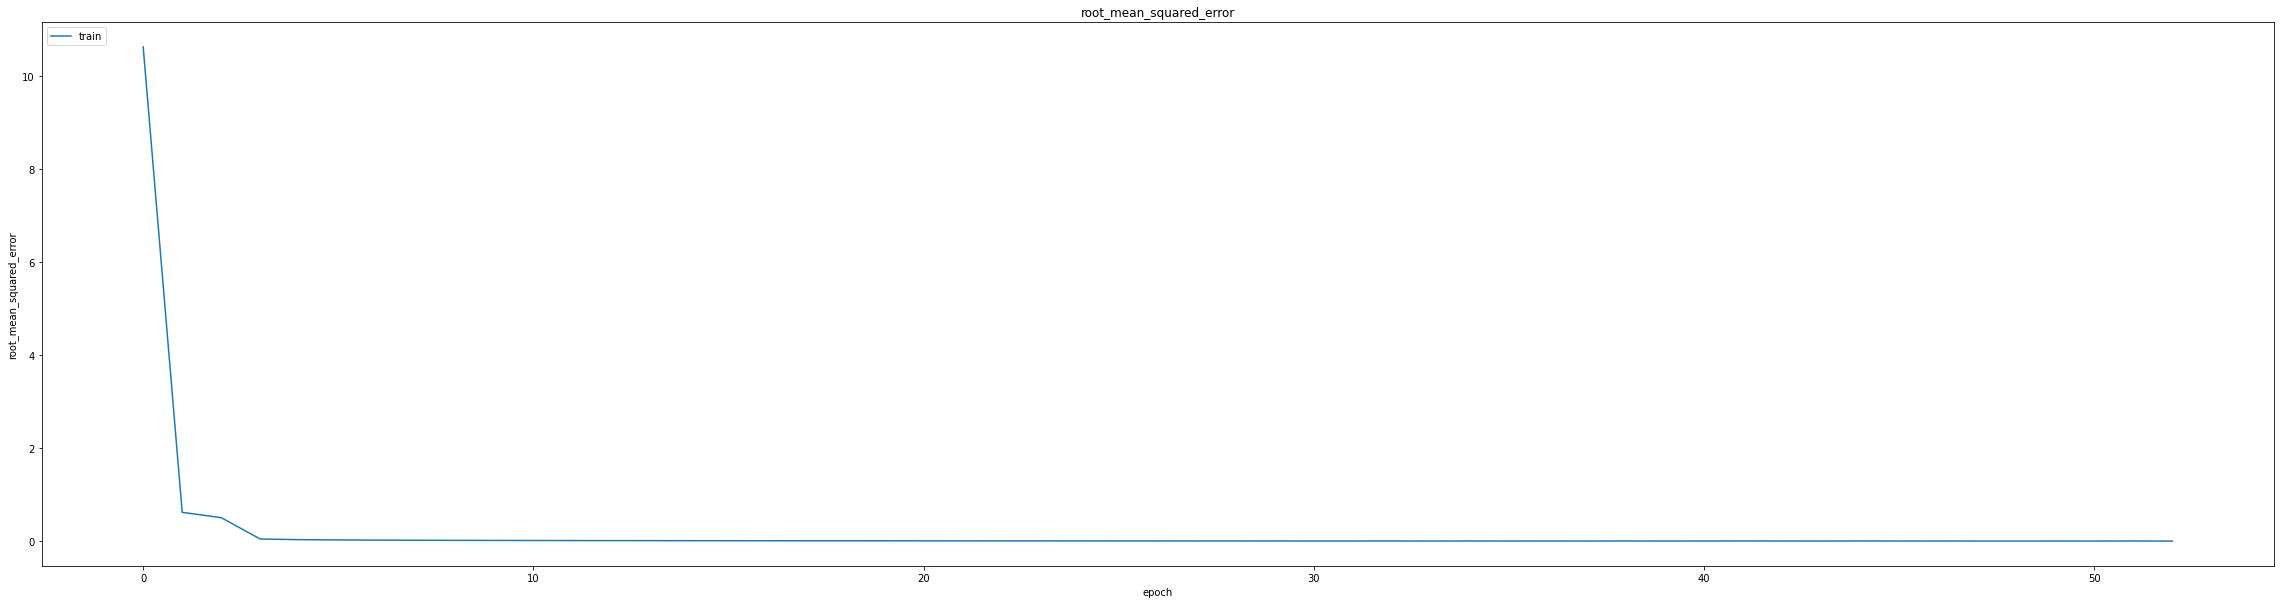

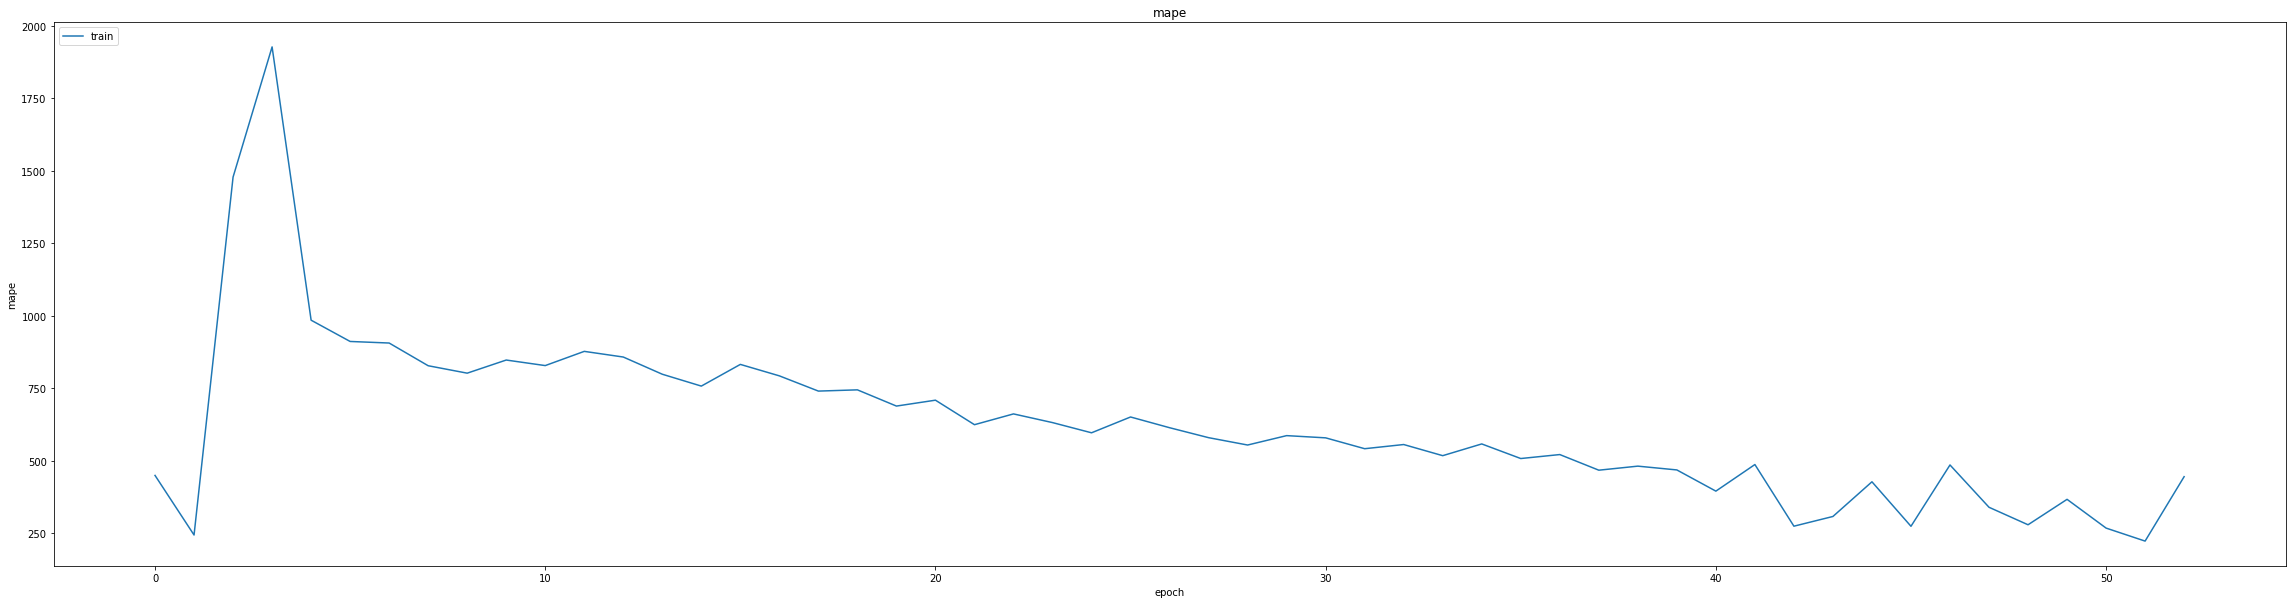

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.01857578195631504
0.024623122066259384
234/234 [==============================] - 8s 31ms/step
0.9705886462285033


In [ ]:
model.load_weights("weights.best.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=12)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
464/464 [==============================] - ETA: 0s - loss: 0.0019 - mae: 0.0196 - mse: 0.0019 - root_mean_squared_error: 0.0437 - mape: 501.0722
Epoch 1: val_mse improved from 0.00061 to 0.00061, saving model to weights.best.hdf5
464/464 [==============================] - 121s 252ms/step - loss: 0.0019 - mae: 0.0196 - mse: 0.0019 - root_mean_squared_error: 0.0437 - mape: 501.0722 - val_loss: 6.0590e-04 - val_mae: 0.0180 - val_mse: 6.0590e-04 - val_root_mean_squared_error: 0.0246 - val_mape: 5332.7407 - lr: 0.0010
Epoch 2/25
464/464 [==============================] - ETA: 0s - loss: 1.3617e-04 - mae: 0.0090 - mse: 1.3617e-04 - root_mean_squared_error: 0.0117 - mape: 562.2016
Epoch 2: val_mse improved from 0.00061 to 0.00053, saving model to weights.best.hdf5
464/464 [==============================] - 118s 255ms/step - loss: 1.3617e-04 - mae: 0.0090 - mse: 1.3617e-04 - root_mean_squared_error: 0.0117 - mape: 562.2016 - val_loss: 5.3272e-04 - val_mae: 0.0169 - val_mse: 5.3272e-

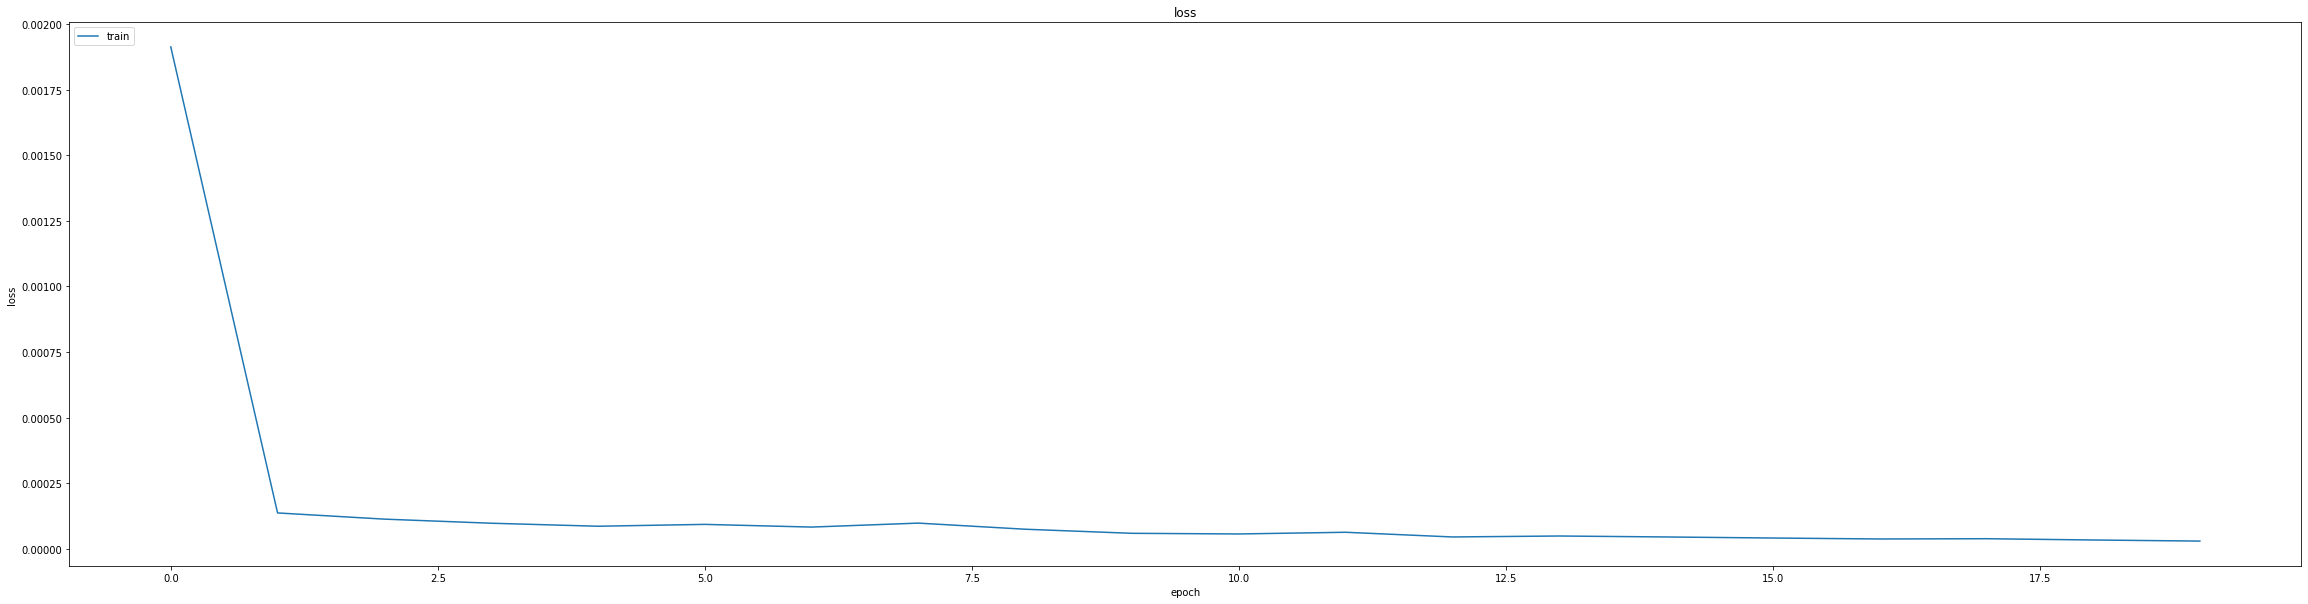

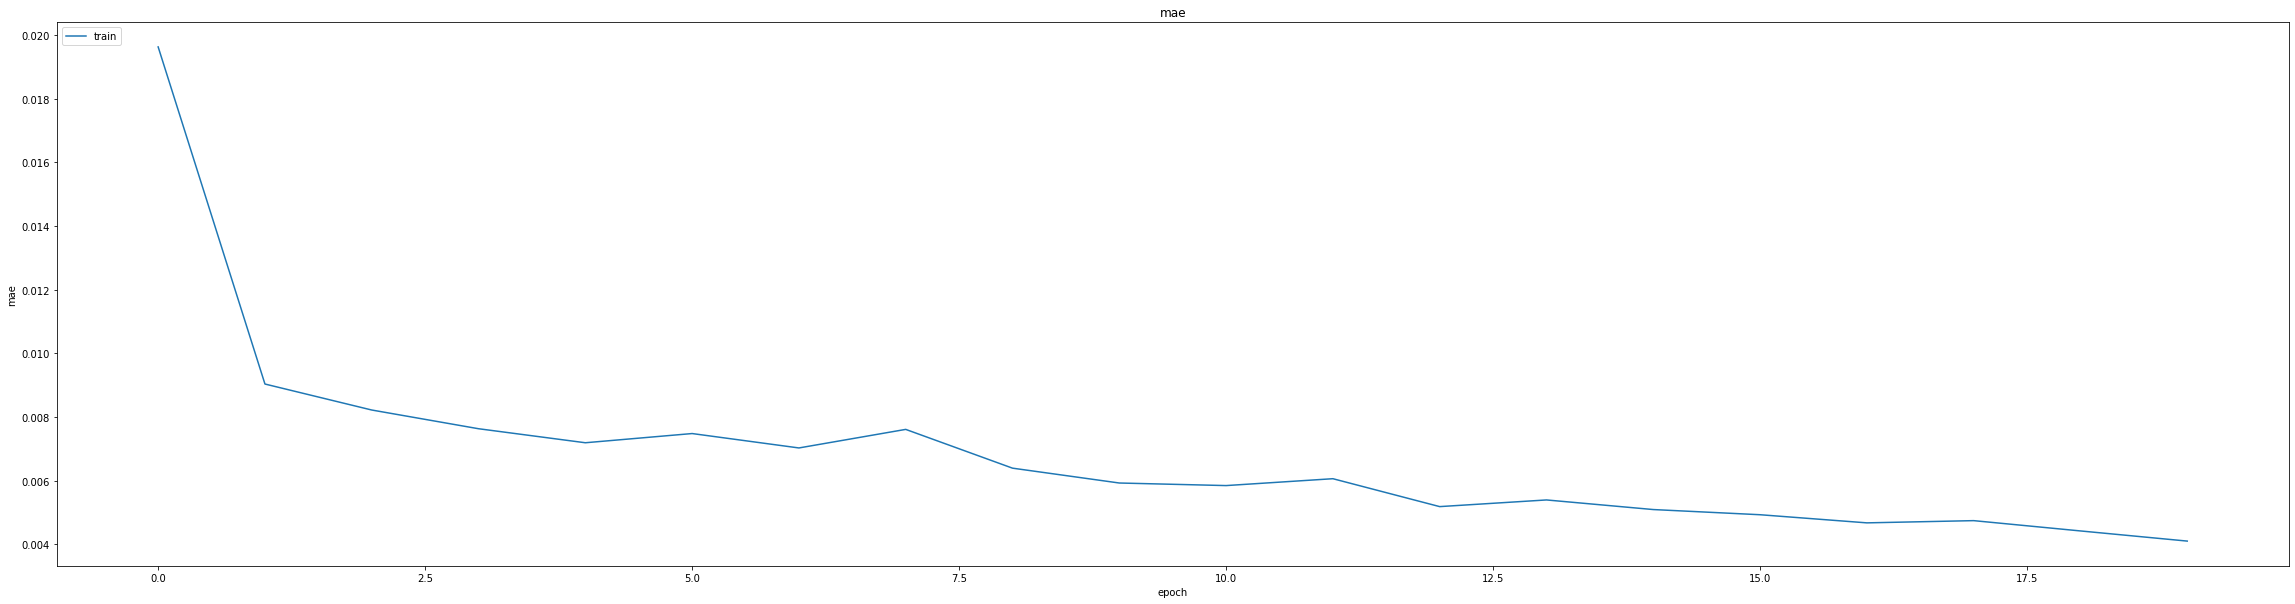

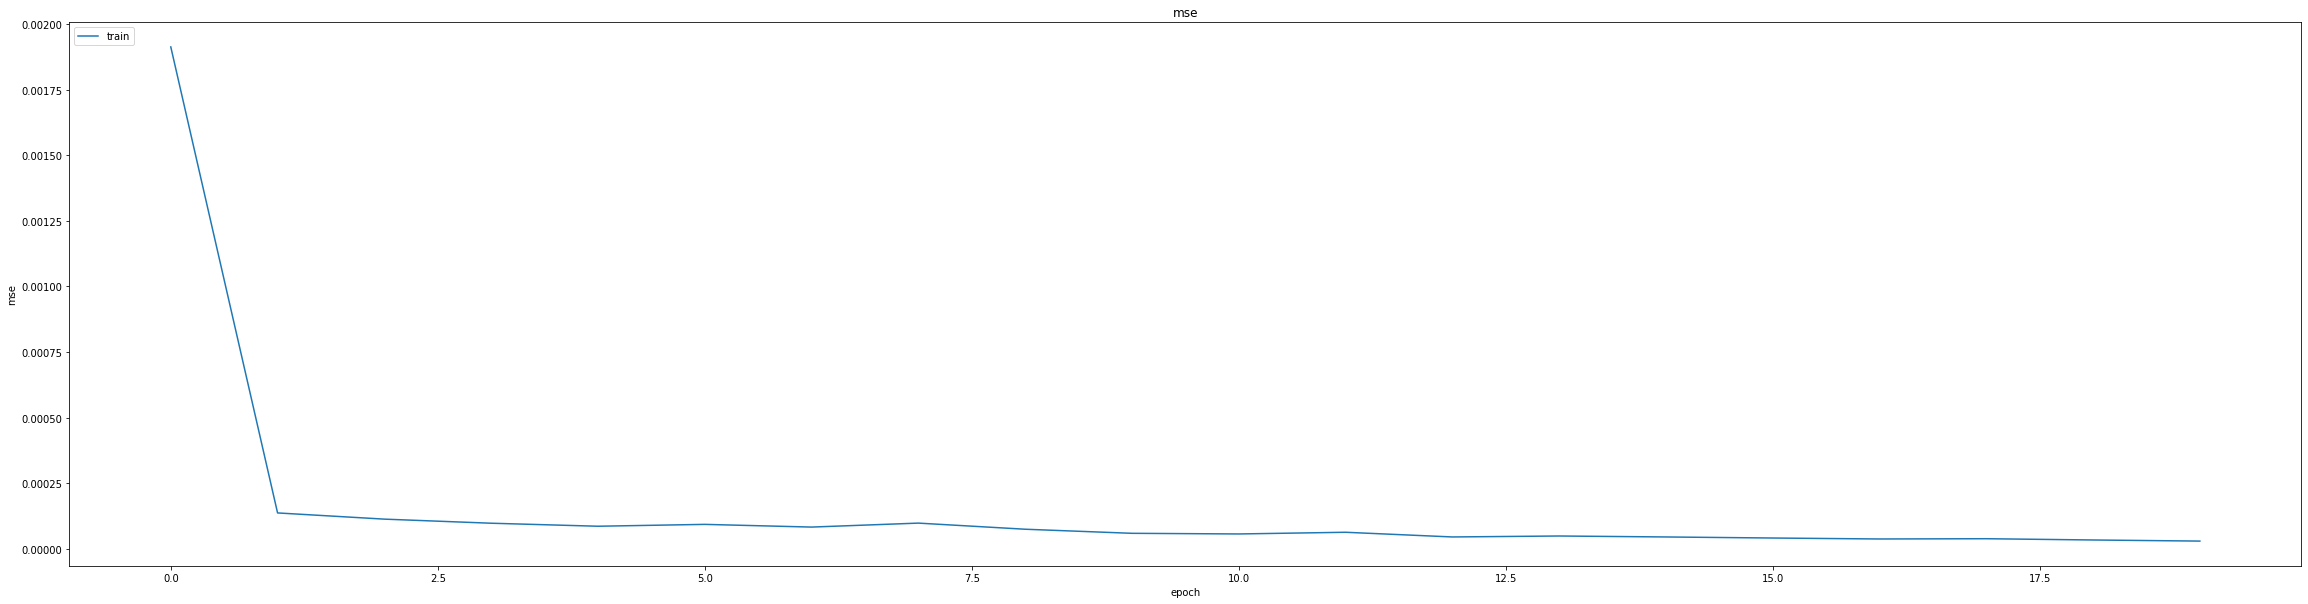

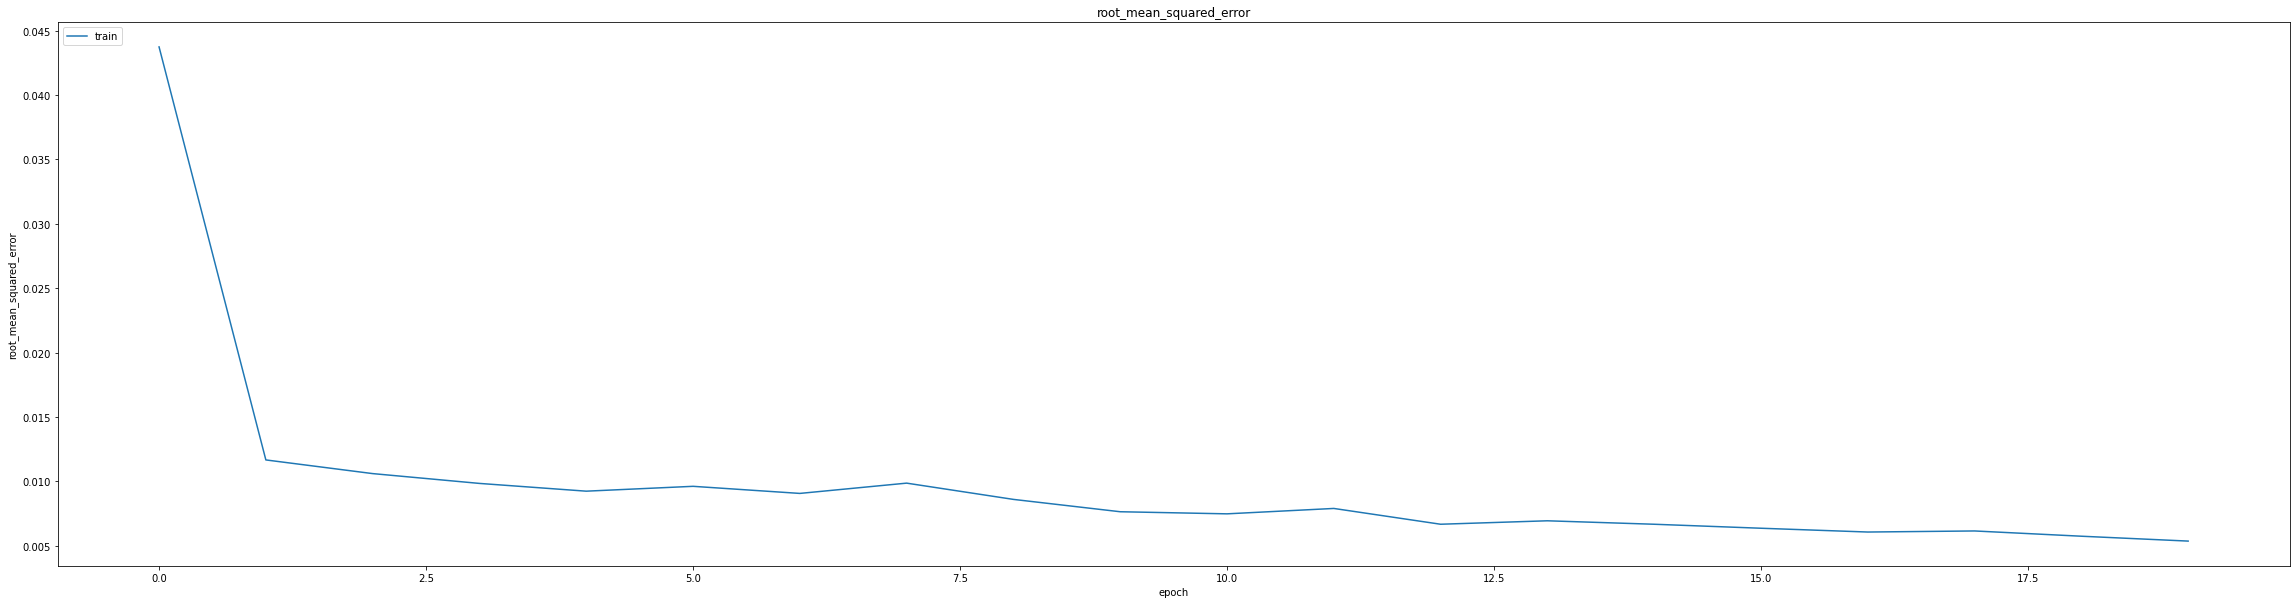

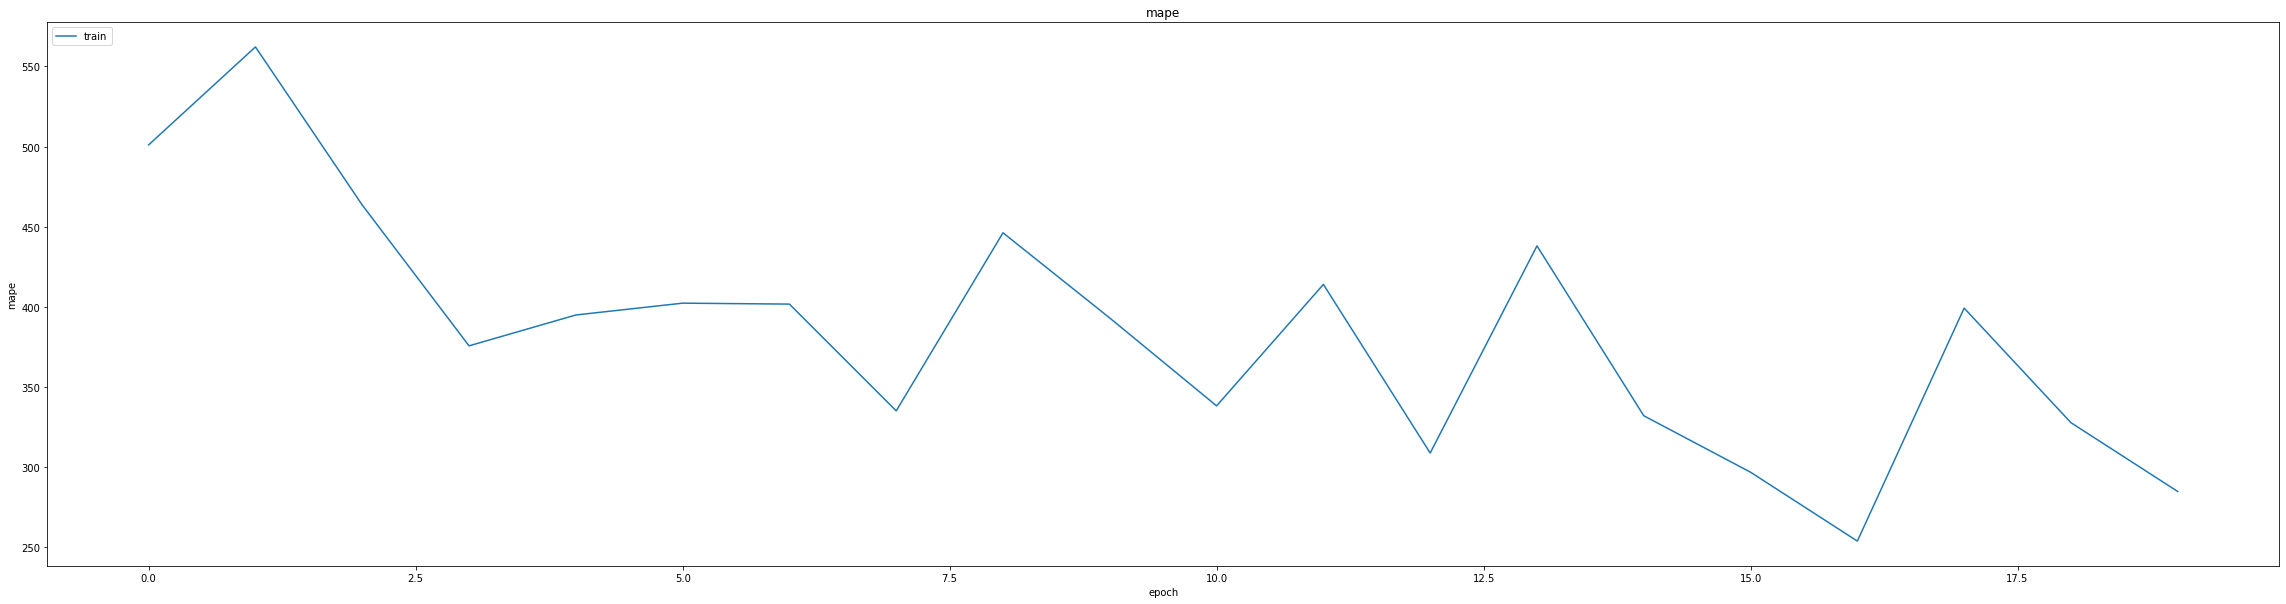

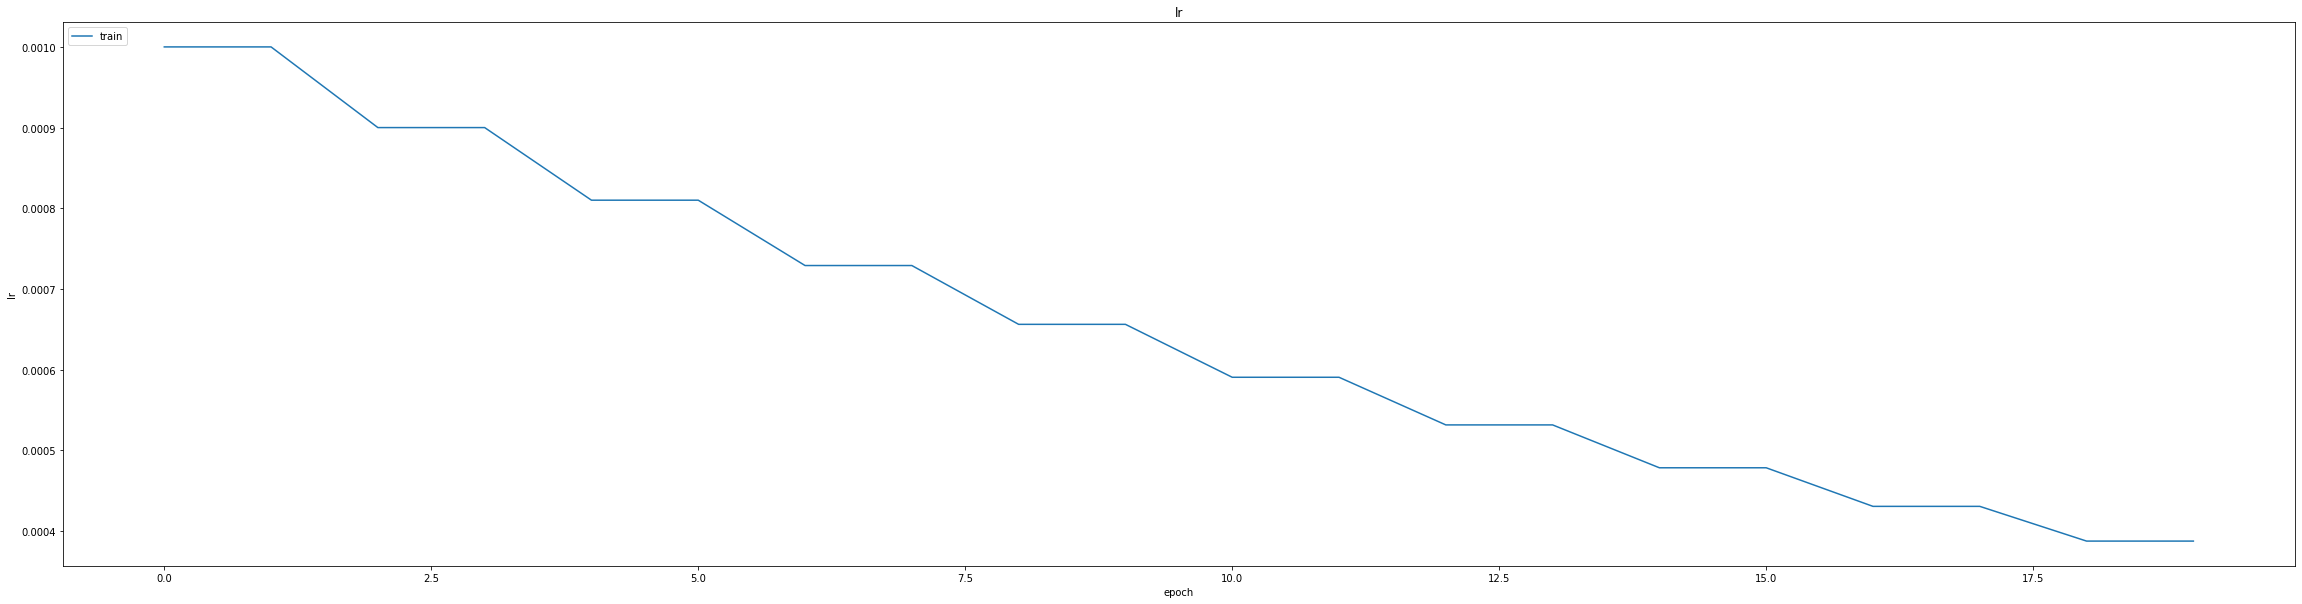

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.015049898065626621
0.019578801468014717
234/234 [==============================] - 7s 32ms/step
0.9737330788353995


234/234 [==============================] - 8s 33ms/step


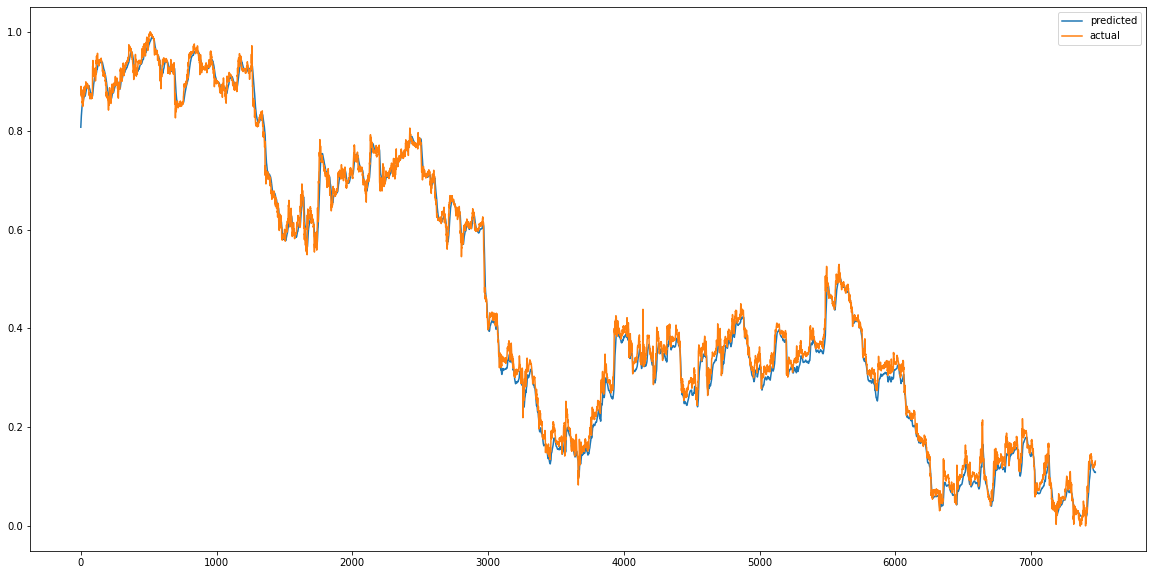

In [ ]:
model.load_weights("weights.best.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


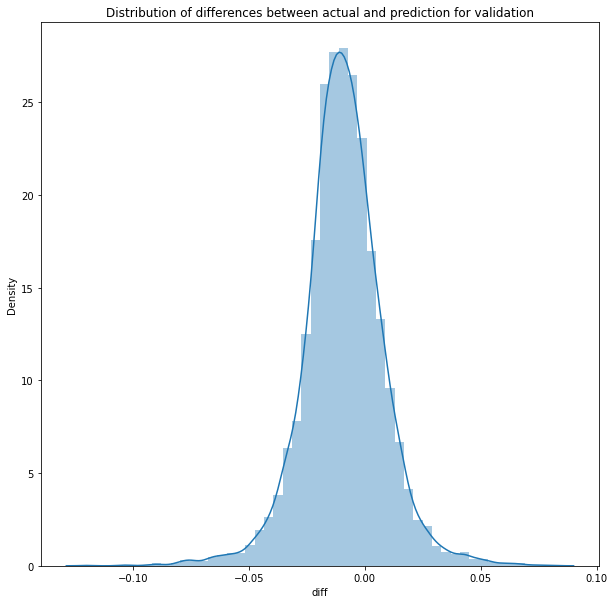

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

230/230 [==============================] - 8s 33ms/step


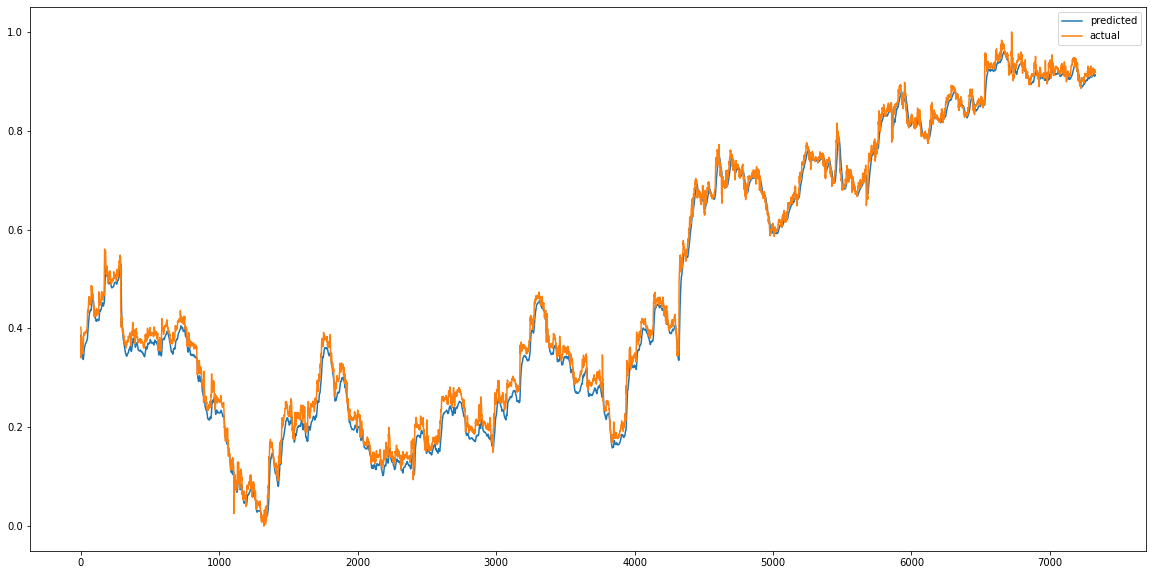

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


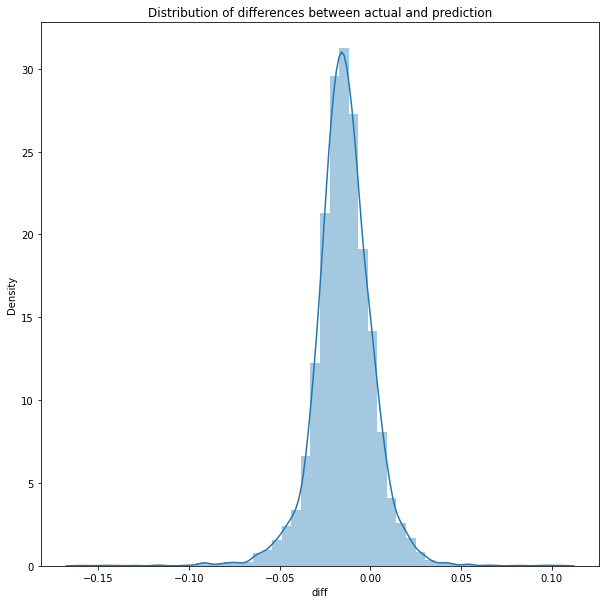

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.00047505094252413754
MAE :  0.017475174282745965
RMSE  : 0.02179566338802601
230/230 [==============================] - 7s 32ms/step
R2_Score  : 0.9936843954990121


count    7329.000000
mean       -0.014721
std         0.016074
min        -0.159491
25%        -0.023205
50%        -0.014794
75%        -0.005798
max         0.103869
Name: diff, dtype: float64

In [ ]:
model= thesis.CNN_LSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 lstm (LSTM)                 (None, 24, 256)           328704    
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                82176     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)


In [ ]:
from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

In [ ]:
Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
464/464 [==============================] - ETA: 0s - loss: 156.9305 - mae: 1.4775 - mse: 156.9305 - root_mean_squared_error: 12.5272 - mape: 5302.5225
Epoch 1: val_mse improved from inf to 0.02880, saving model to weights.best.hdf5
464/464 [==============================] - 125s 261ms/step - loss: 156.9305 - mae: 1.4775 - mse: 156.9305 - root_mean_squared_error: 12.5272 - mape: 5302.5225 - val_loss: 0.0288 - val_mae: 0.1412 - val_mse: 0.0288 - val_root_mean_squared_error: 0.1697 - val_mape: 41867.4961
Epoch 2/75
464/464 [==============================] - ETA: 0s - loss: 0.0102 - mae: 0.0792 - mse: 0.0102 - root_mean_squared_error: 0.1011 - mape: 5106.6519
Epoch 2: val_mse improved from 0.02880 to 0.01581, saving model to weights.best.hdf5
464/464 [==============================] - 131s 282ms/step - loss: 0.0102 - mae: 0.0792 - mse: 0.0102 - root_mean_squared_error: 0.1011 - mape: 5106.6519 - val_loss: 0.0158 - val_mae: 0.1106 - val_mse: 0.0158 - val_root_mean_squared_error: 

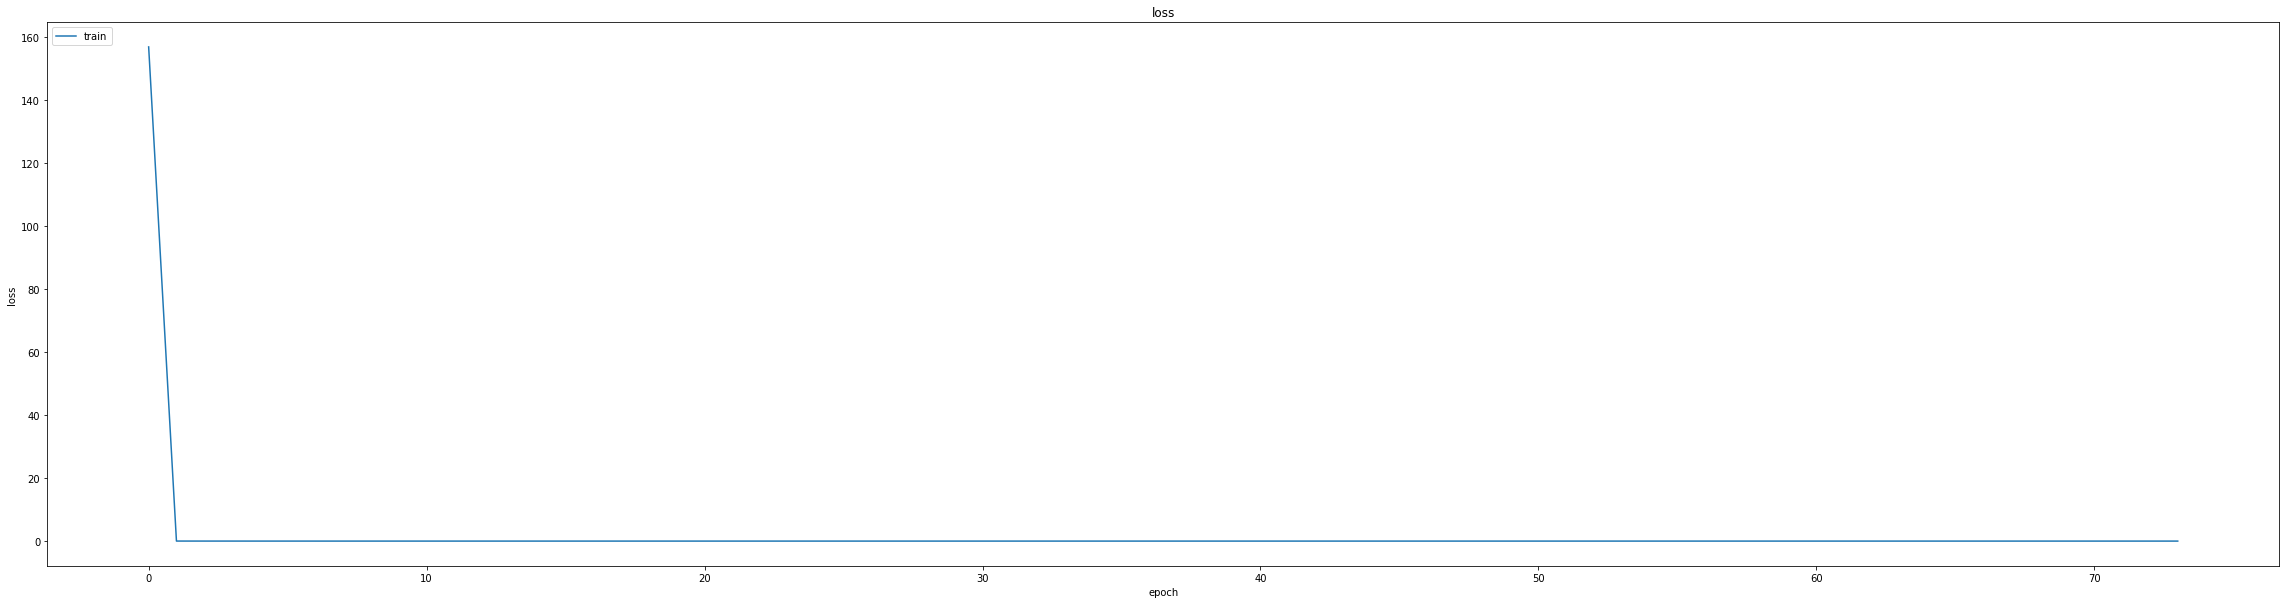

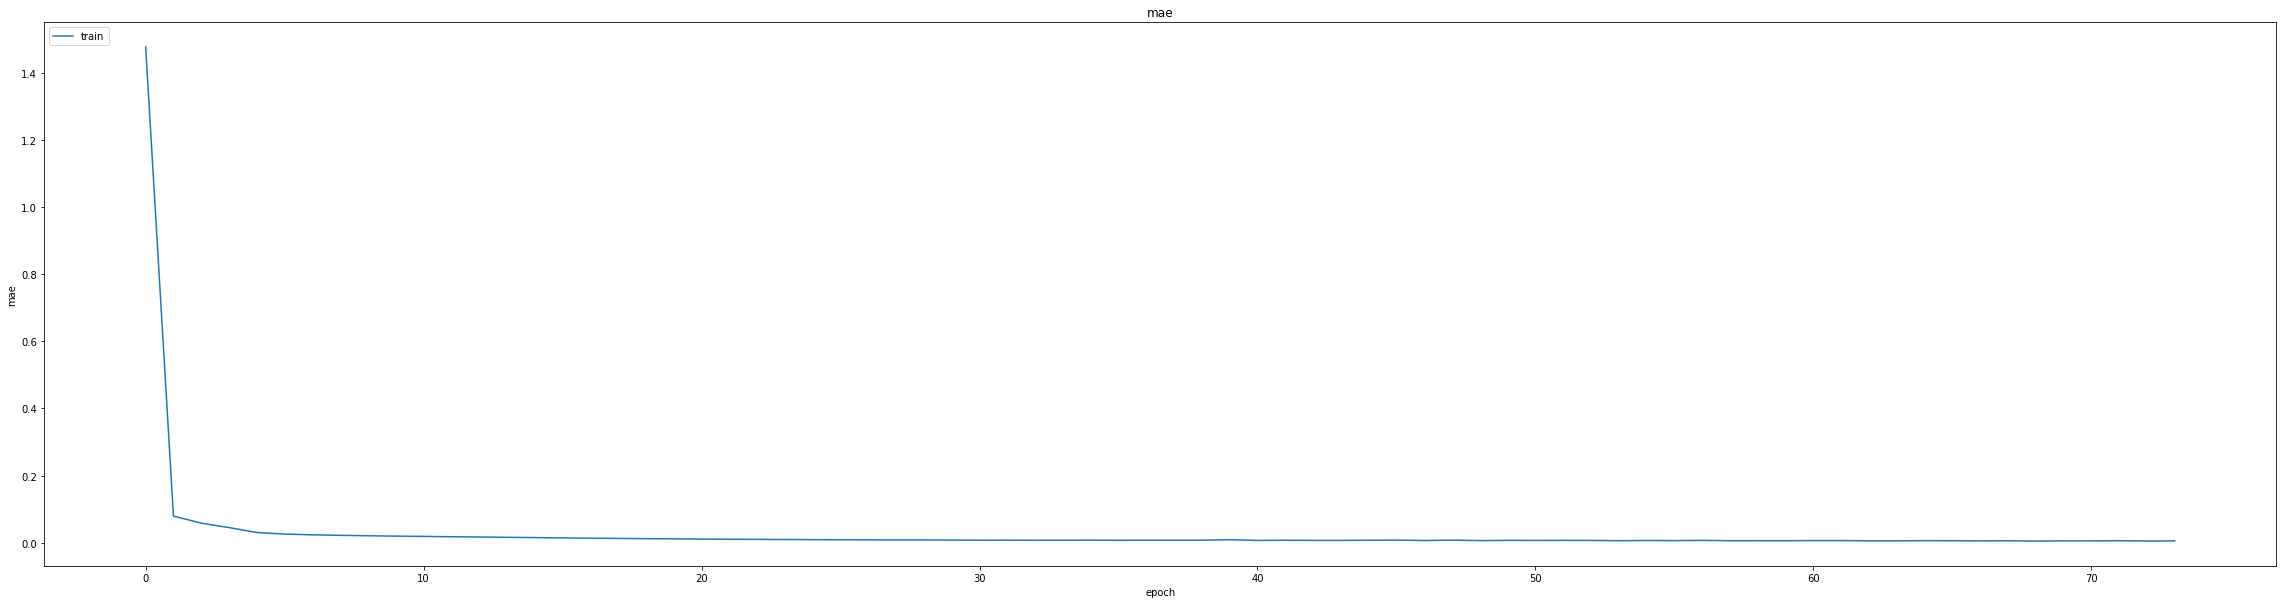

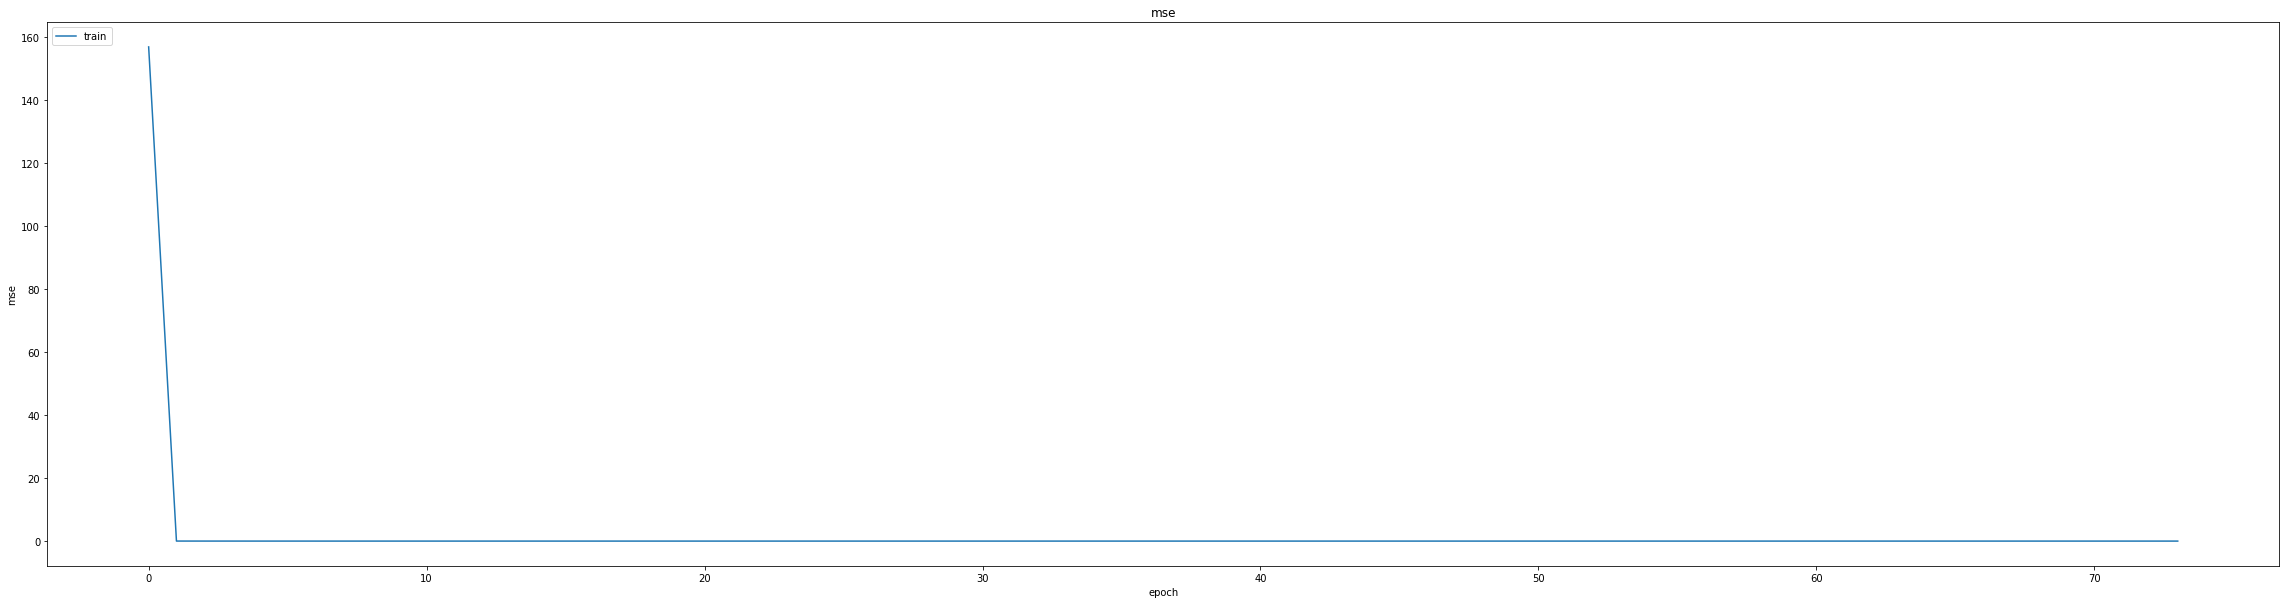

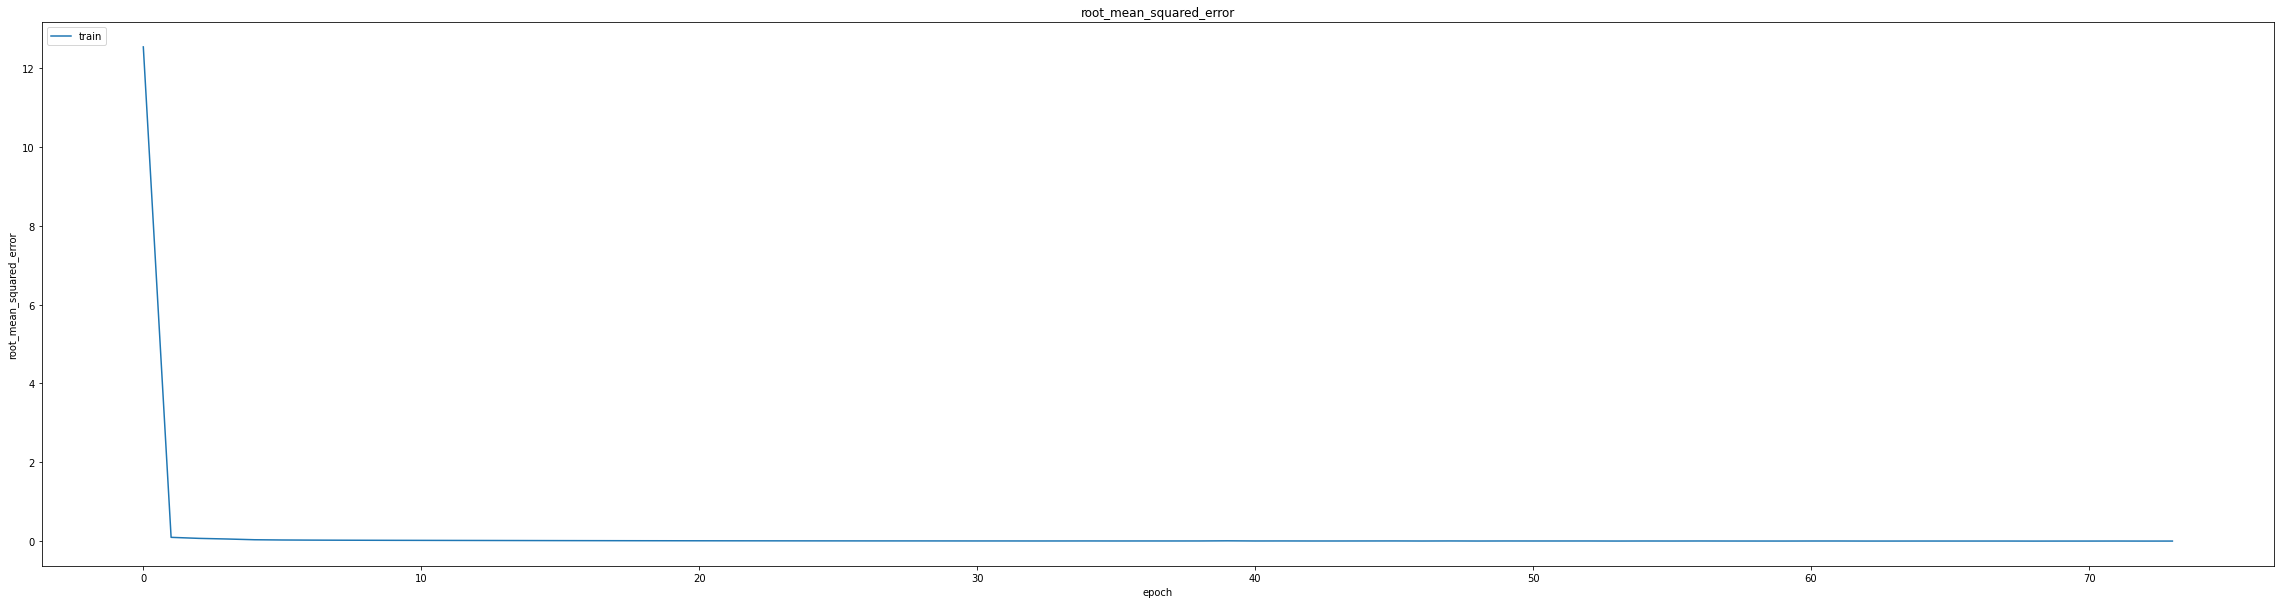

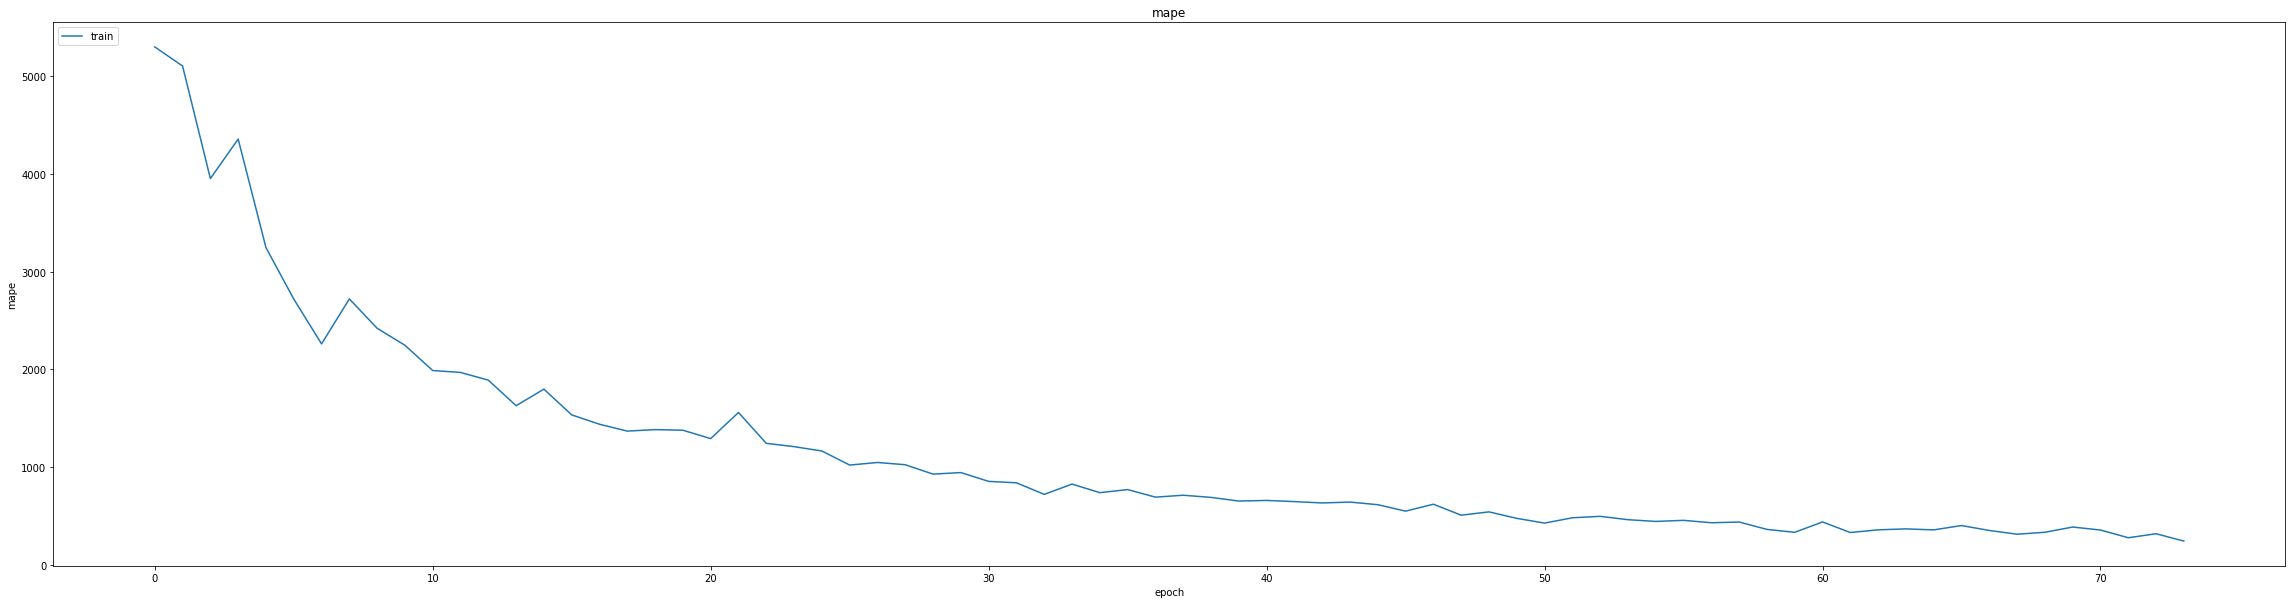

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.030620450153946877
0.03413980454206467
234/234 [==============================] - 8s 36ms/step
0.9715523818135127


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
model.load_weights("weights.best.hdf5")

In [ ]:
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

In [ ]:
Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
464/464 [==============================] - ETA: 0s - loss: 4.9099e-04 - mae: 0.0094 - mse: 4.9099e-04 - root_mean_squared_error: 0.0222 - mape: 457.6012
Epoch 1: val_mse did not improve from 0.00117
464/464 [==============================] - 131s 274ms/step - loss: 4.9099e-04 - mae: 0.0094 - mse: 4.9099e-04 - root_mean_squared_error: 0.0222 - mape: 457.6012 - val_loss: 0.0017 - val_mae: 0.0374 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0407 - val_mape: 3585.1492 - lr: 0.0010
Epoch 2/25
464/464 [==============================] - ETA: 0s - loss: 4.1551e-05 - mae: 0.0050 - mse: 4.1551e-05 - root_mean_squared_error: 0.0064 - mape: 515.7285
Epoch 2: val_mse did not improve from 0.00117
464/464 [==============================] - 121s 261ms/step - loss: 4.1551e-05 - mae: 0.0050 - mse: 4.1551e-05 - root_mean_squared_error: 0.0064 - mape: 515.7285 - val_loss: 0.0013 - val_mae: 0.0321 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0357 - val_mape: 4627.9604 - lr: 0.0010
lr

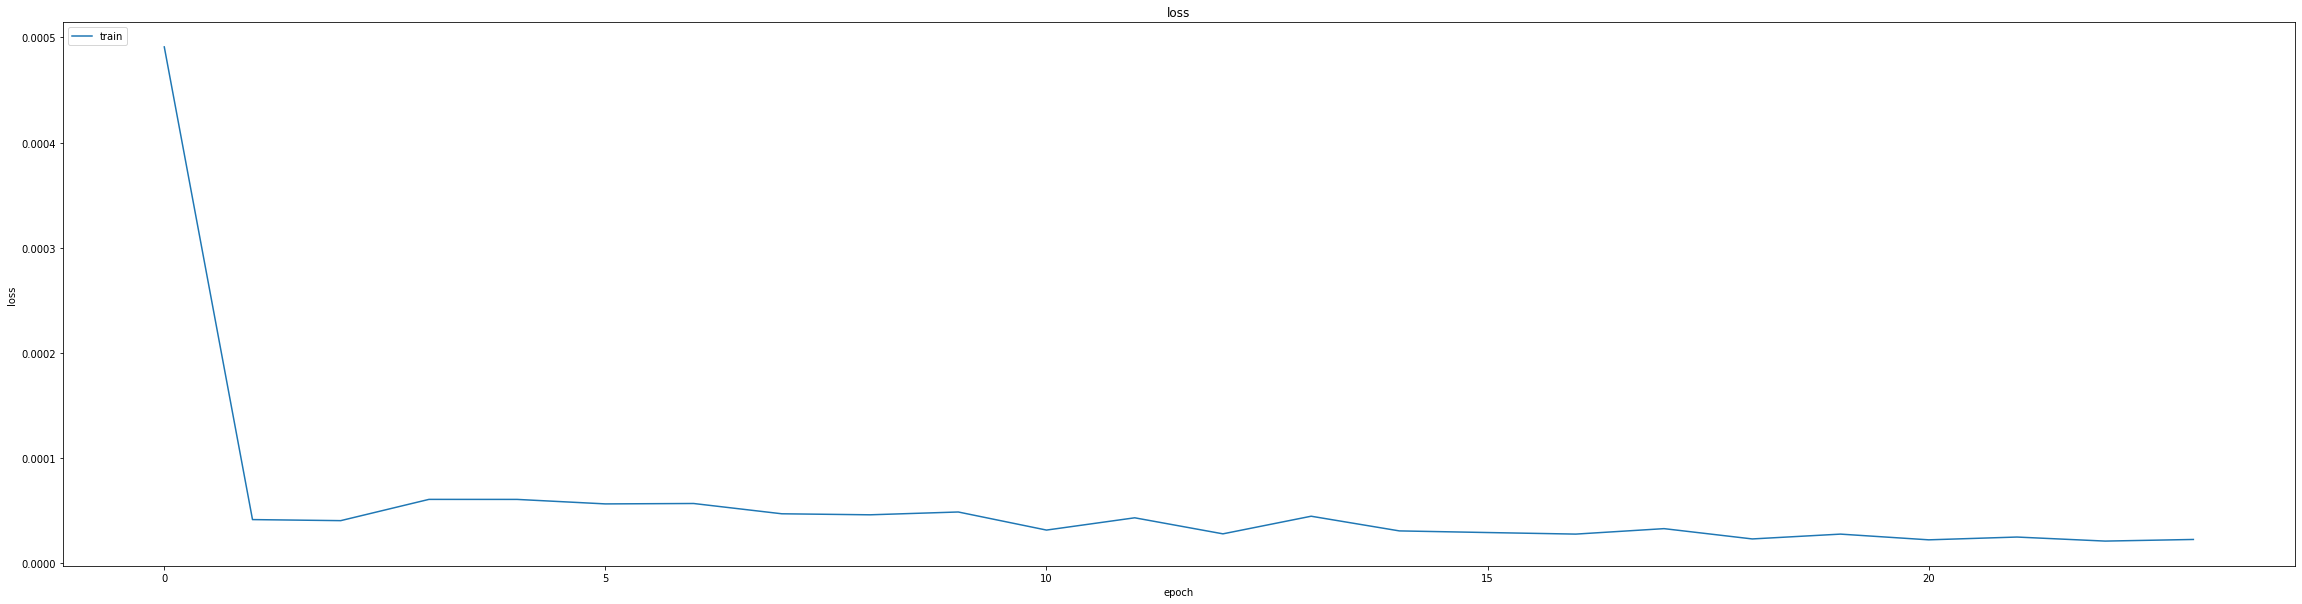

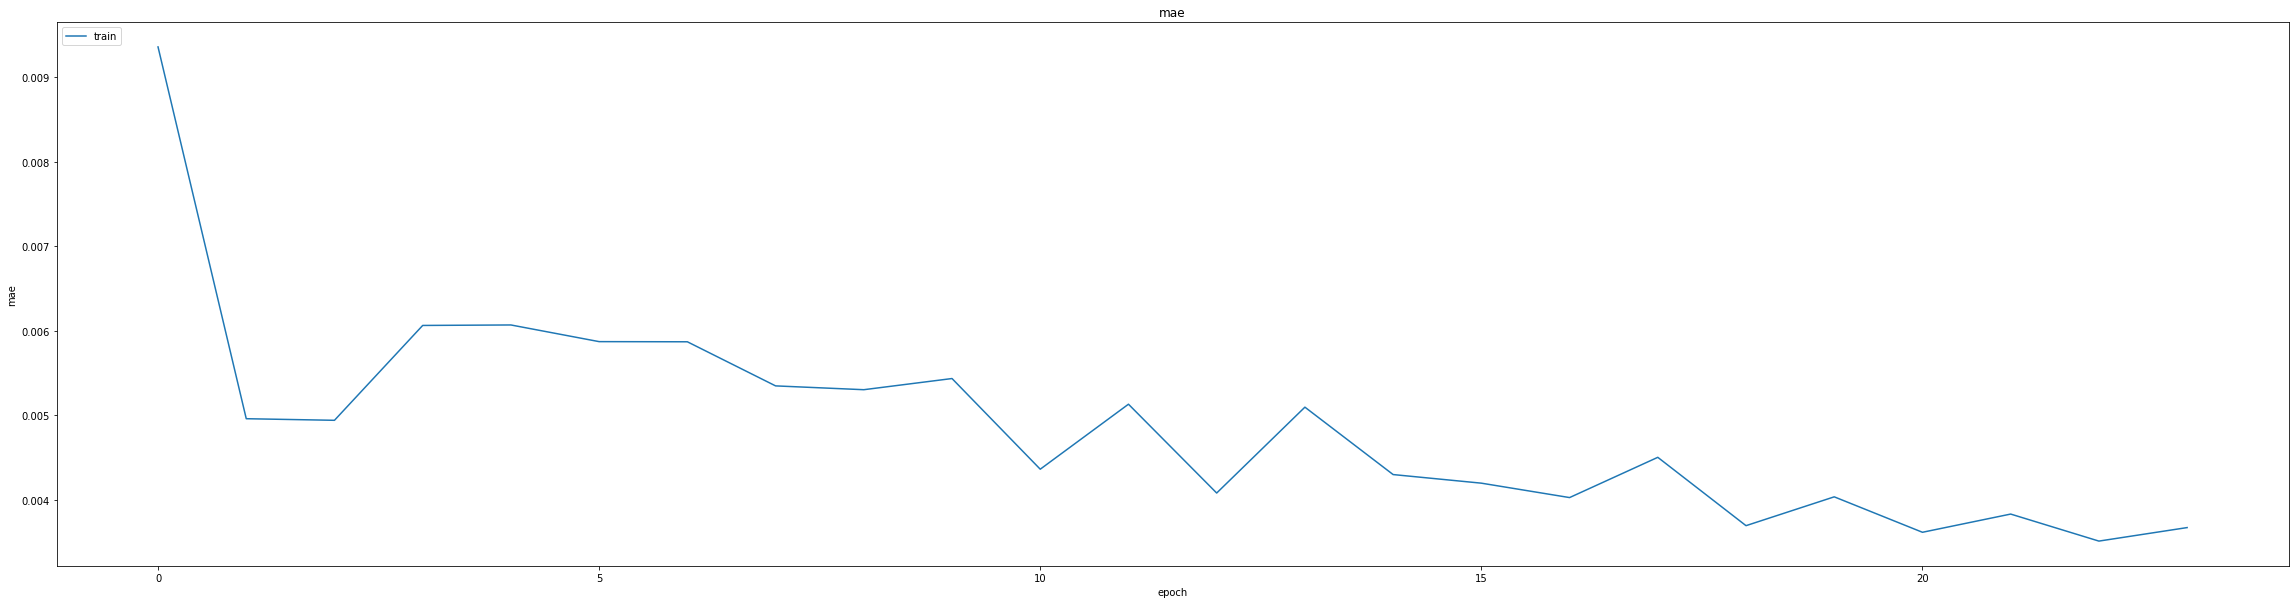

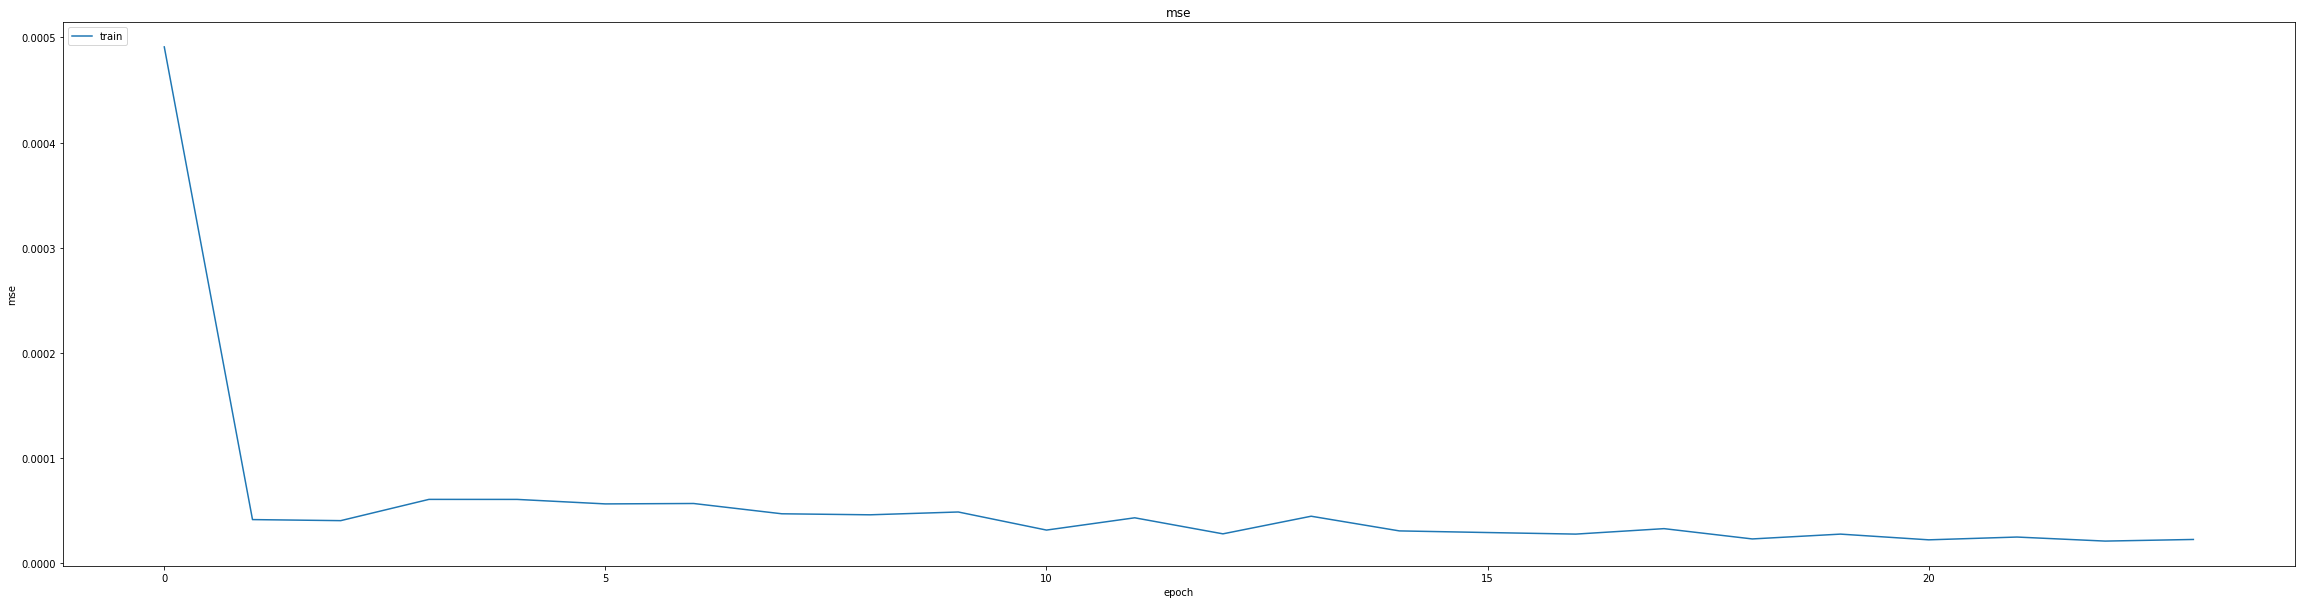

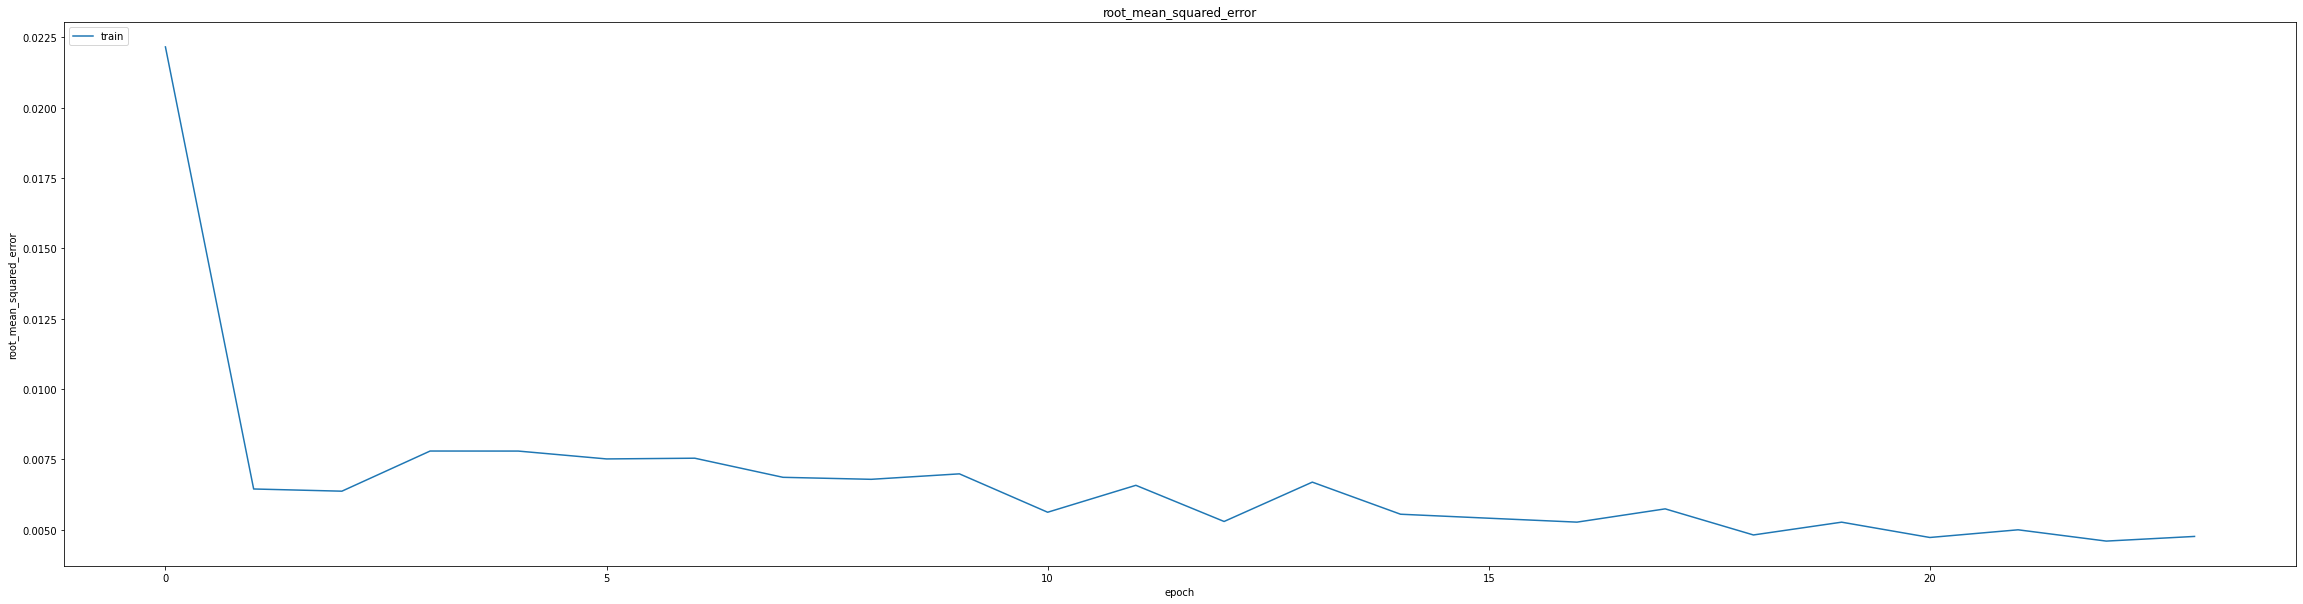

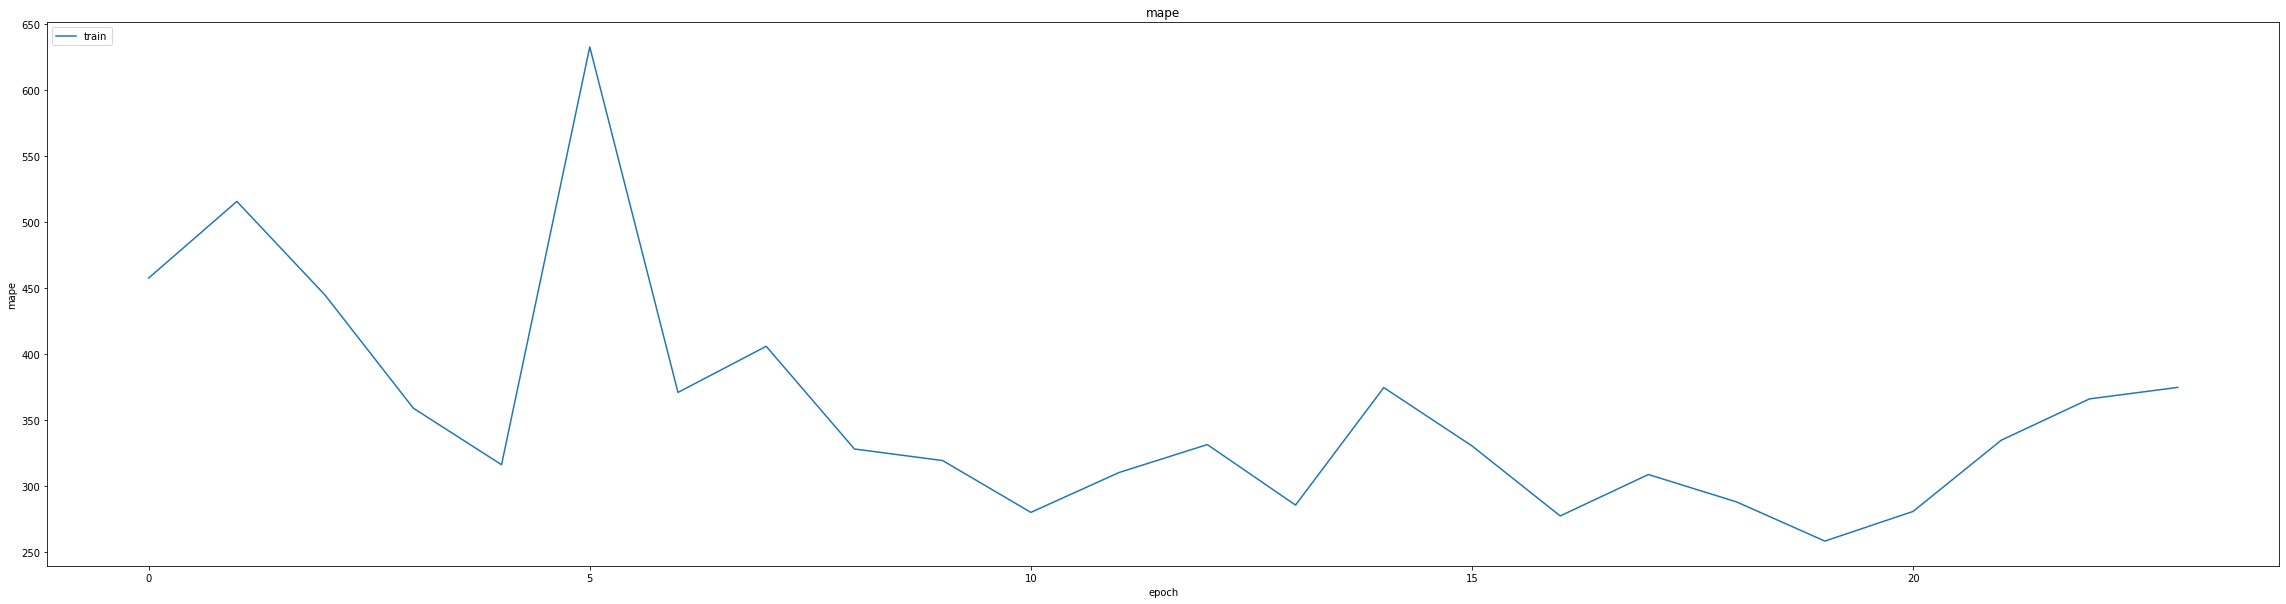

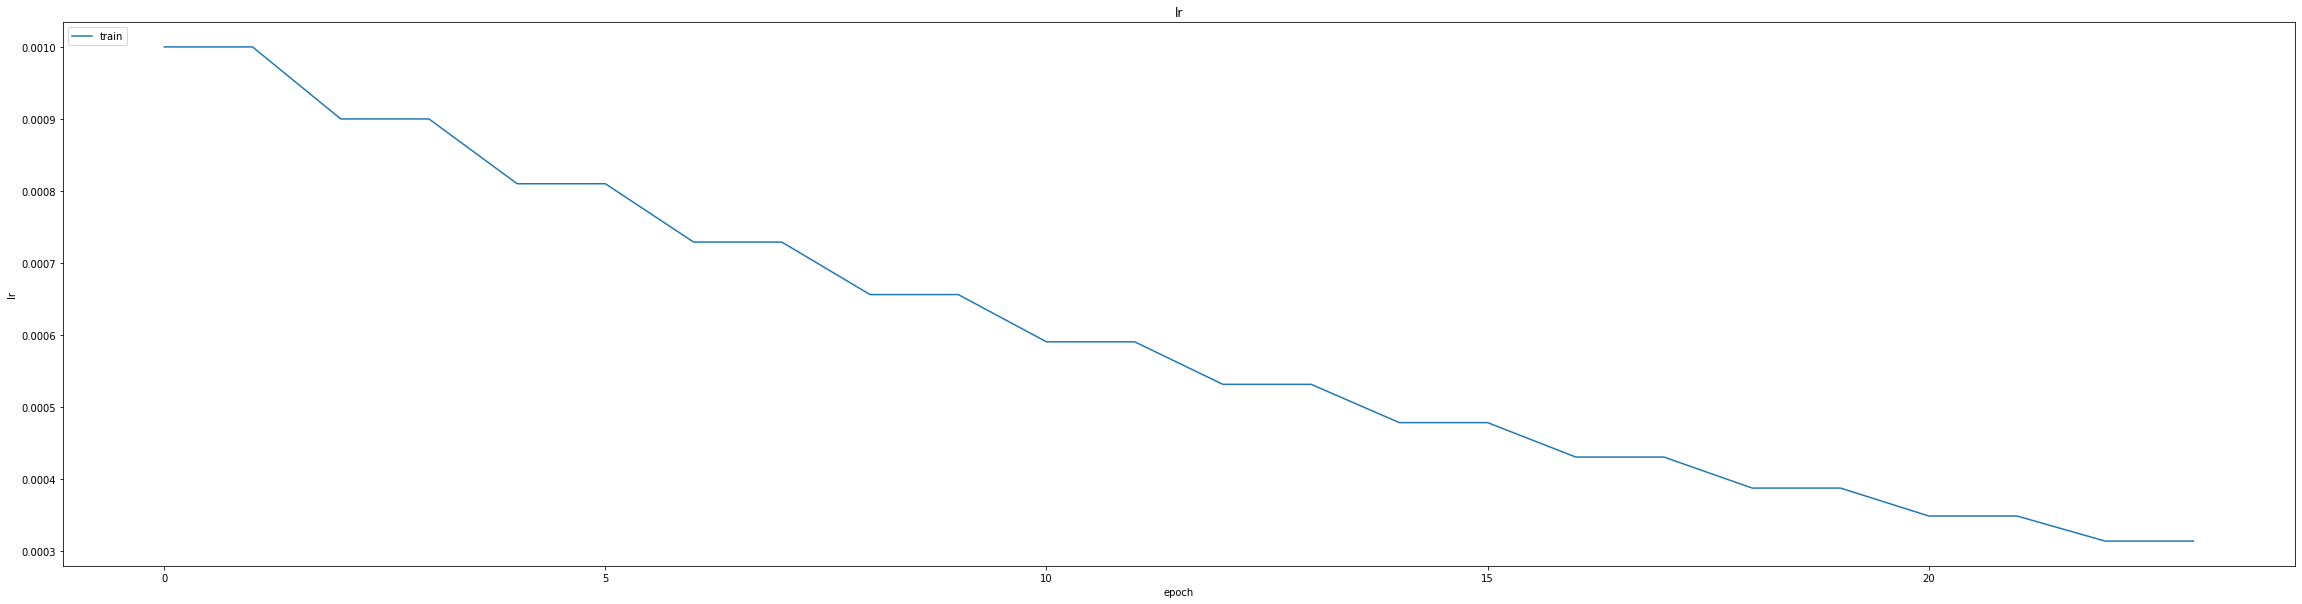

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['var_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.03061138652265072
0.03403574600815773
234/234 [==============================] - 9s 36ms/step
0.9732788064148692


In [ ]:
model.load_weights("weights.best.hdf5")

234/234 [==============================] - 9s 37ms/step


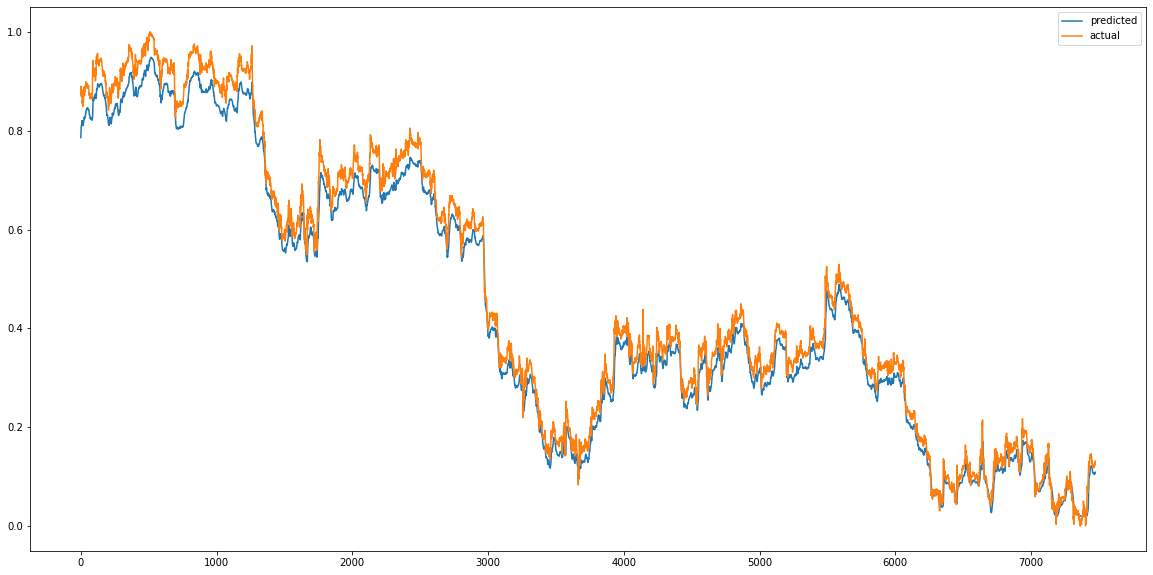

In [ ]:
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


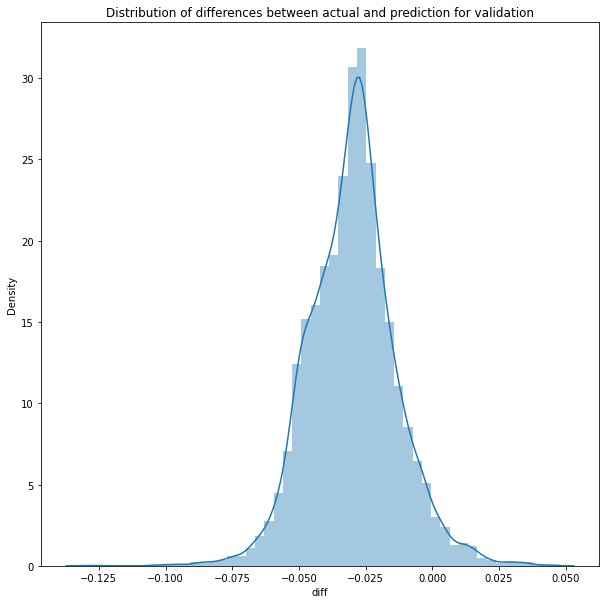

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

230/230 [==============================] - 8s 35ms/step


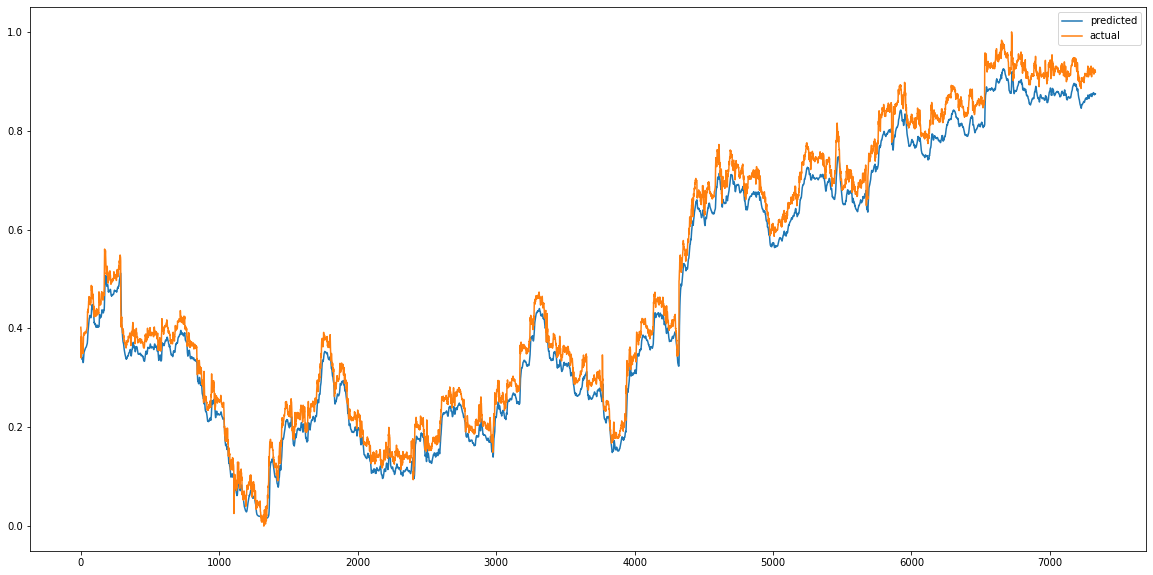

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


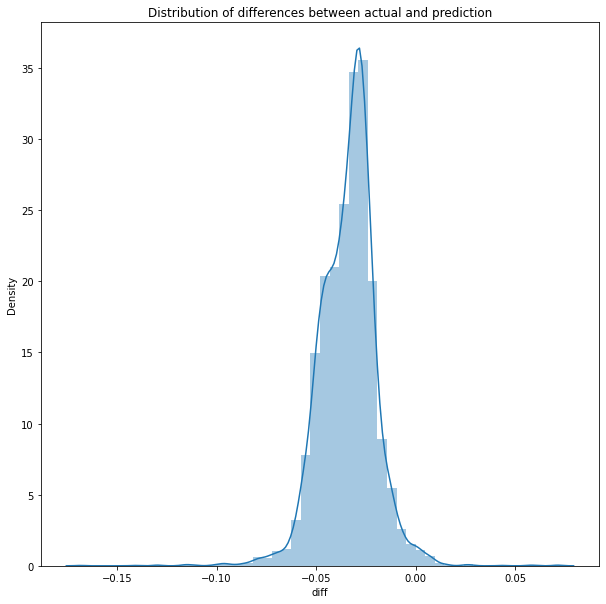

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print(test_r2_scr)

230/230 [==============================] - 9s 37ms/step
0.9819650367288221


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:

print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

predictions['diff'].describe()

MSE :  0.0013565647271503699
MAE :  0.03426604714132271


count    7329.000000
mean       -0.034055
std         0.014031
min        -0.168265
25%        -0.042923
50%        -0.032502
75%        -0.025803
max         0.072065
Name: diff, dtype: float64

In [ ]:
from math import sqrt
rmse=sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

print(rmse)

0.0368315724229956
